# DISCO DUO - Capstone Project 

* Student name: Vi Bui
* Student pace: Part-Time
* Scheduled project review date/time: Mon. 05/02/22
* Instructor name: Claude Fried
* Blog post URL: https://datasciish.com/

Disco Duo Logo Prototypes
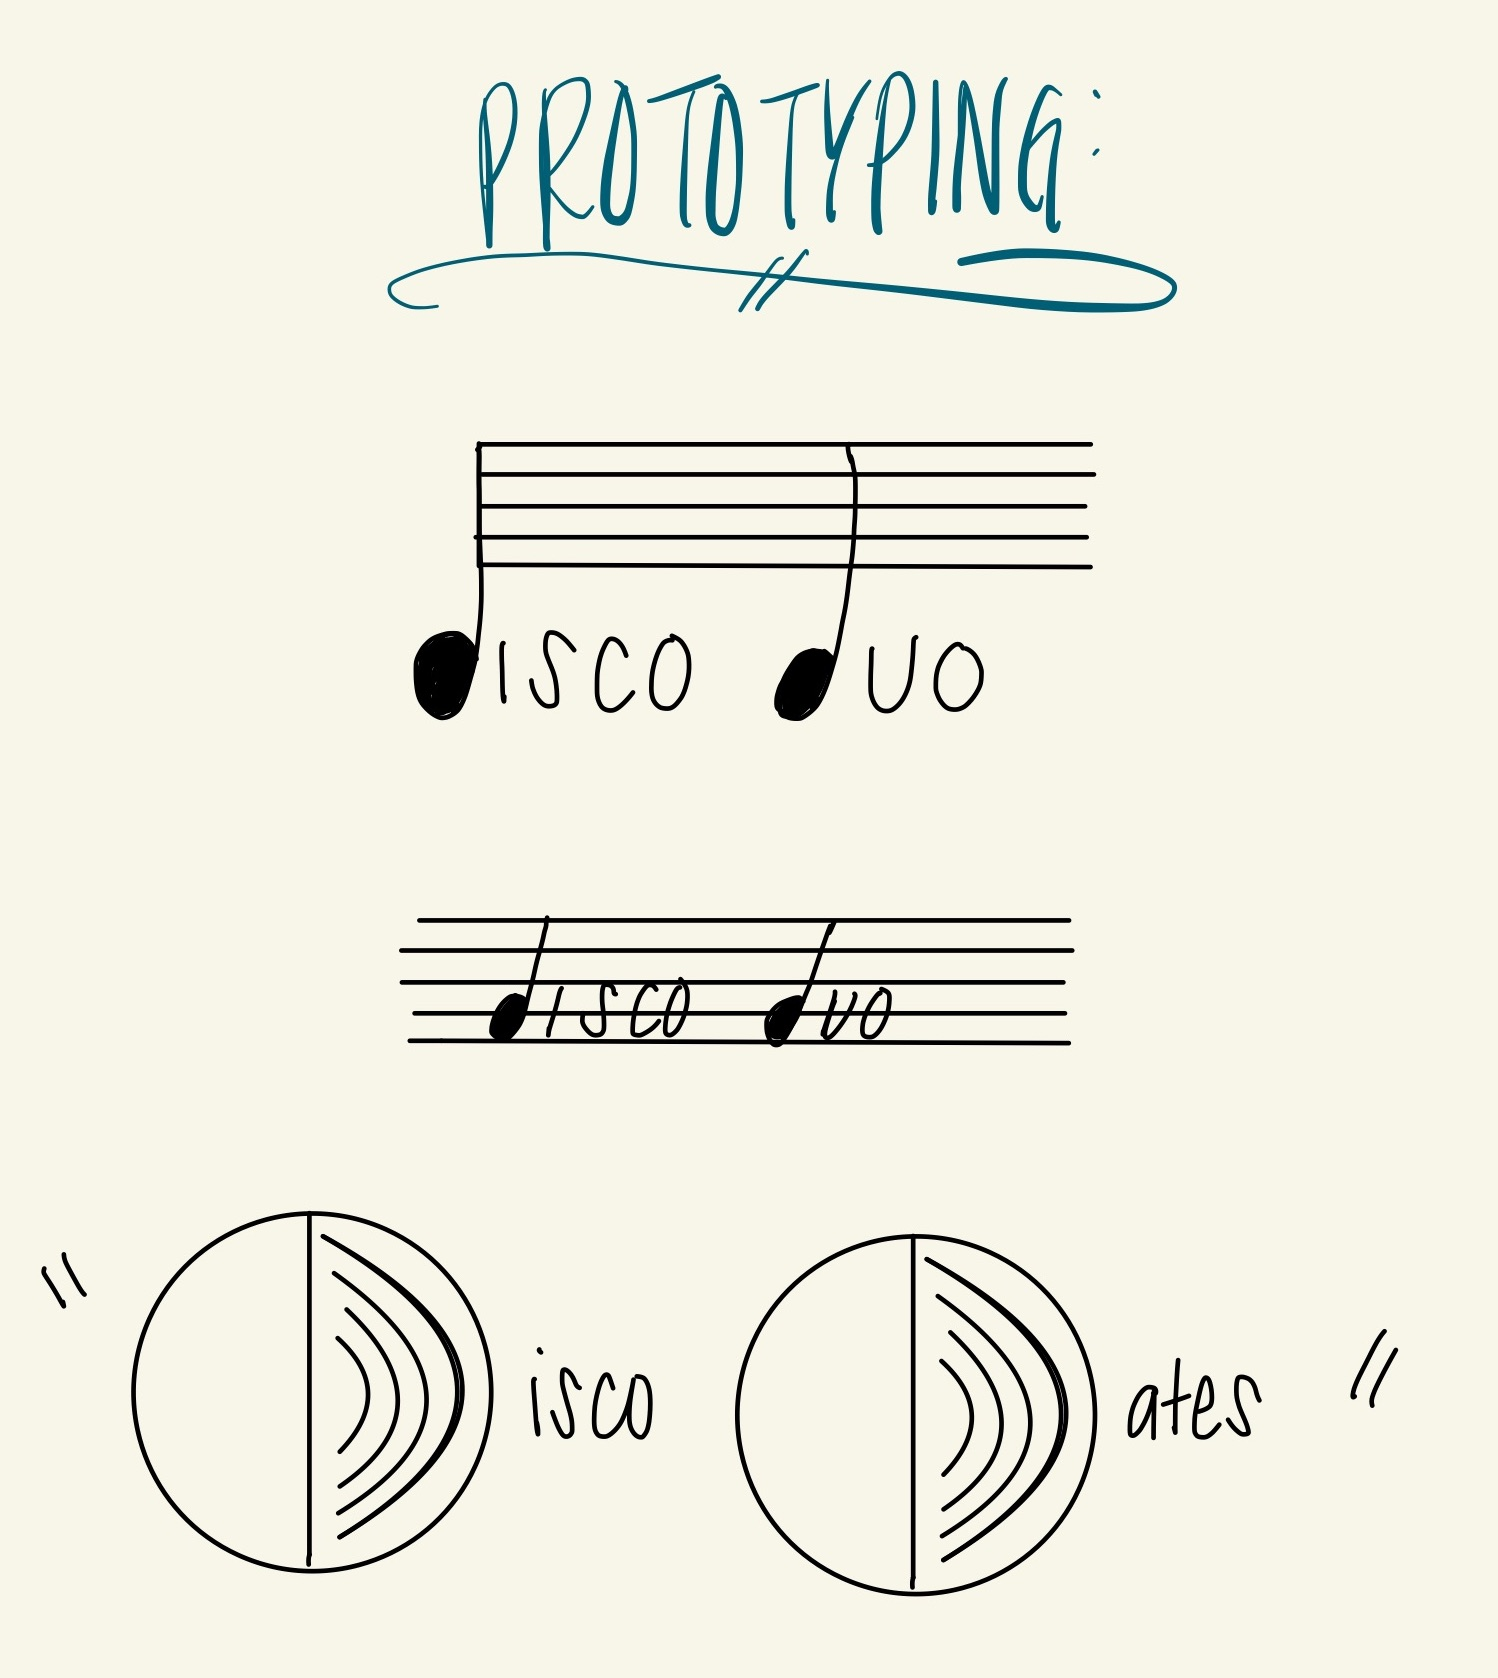

## Overview

**Client:** Existing or new music streaming services. Existing: Spotify, Pandora, Amazon Music, etc. New: companies interested in building new platforms to connect people through music. 

**Objective:** Create a platform where listeners of the same song are connected and able to discover new songs through their “connector song” by requesting another song based on a musical metric such as: danceability, loudness, acousticness, valence, etc.
 
**Data, Methodology, and Models** <br/> 

**Data source**: Spotify 
1. Spotify Song Data - https://www.kaggle.com/akiboy96/spotify-dataset
2. Spotify Genre Data - https://www.kaggle.com/code/akiboy96/spotify-song-popularity-genre-exploration/data?select=genre_music.csv

**Methodology:** Pull sample from data; create spectrogram images for songs; train model to predict danceability 

**Models:** Sequential Models 
1. Layers
2. Stochastic 
3. Add layers 

# Data Exploration, Cleansing, and Visualization

**Data Exploration** <br>
Explore Spotify dataset

**Data Cleansing** <br>
Check for duplicates; drop duplicate and NaN (missing) values; continuously clean data as necessary 

**Data Visualization** <br>
Use visualizations to explore the data and determine how to further refine the dataset in order to prepare for modeling 

**Data Preparation** <br>
Prepare the data for modeling 

## Data Exploration and Cleansing
Import data and all packages needed for data exploration and modeling 

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import pydub 
from pydub import AudioSegment

import librosa
import librosa.display

import tensorflow as tf
import tensorflow_io as tfio
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

from keras.models import Sequential

# Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import os 
import warnings

In [2]:
# Import song data

songs = pd.read_csv('spotify_data.csv',index_col=0)

In [3]:
# View song dataframe

songs.head()

artist                                   uri  \
track                                                                           
Jealous Kind Of Fella     Garland Green  spotify:track:1dtKN6wwlolkM8XZy2y9C1   
Initials B.B.          Serge Gainsbourg  spotify:track:5hjsmSnUefdUqzsDogisiX   
Melody Twist                Lord Melody  spotify:track:6uk8tI6pwxxdVTNlNOJeJh   
Mi Bomba Sonó                Celia Cruz  spotify:track:7aNjMJ05FvUXACPWZ7yJmv   
Uravu Solla                 P. Susheela  spotify:track:1rQ0clvgkzWr001POOPJWx   

                       danceability  energy  key  loudness  mode  speechiness  \
track                                                                           
Jealous Kind Of Fella         0.417   0.620    3    -7.727     1       0.0403   
Initials B.B.                 0.498   0.505    3   -12.475     1       0.0337   
Melody Twist                  0.657   0.649    5   -13.392     1       0.0380   
Mi Bomba Sonó                 0.590   0.545    7   -12.058     0       0.1040   
Uravu Solla                   0.515   0.765   11    -3.515     0       0.1240   

                       acousticness  instrumentalness  liveness  valence  \
track                                                                      
Jealous Kind Of Fella         0.490          0.000000    0.0779    0.845   
Initials B.B.                 0.018          0.107000    0.1760    0.797   
Melody Twist                  0.846          0.000004    0.1190    0.908   
Mi Bomba Sonó                 0.706          0.024600    0.0610    0.967   
Uravu Solla                   0.857          0.000872    0.2130    0.906   

                         tempo  duration_ms  time_signature  chorus_hit  \
track                                                                     
Jealous Kind Of Fella  185.655       173533               3    32.94975   
Initials B.B.          101.801       213613               4    48.82510   
Melody Twist           115.940       223960               4    37.22663   
Mi Bomba Sonó          105.592       157907               4    24.75484   
Uravu Solla            114.617       245600               4    21.79874   

                       sections  popularity decade  
track                                               
Jealous Kind Of Fella         9           1    60s  
Initials B.B.                10           0    60s  
Melody Twist                 12           0    60s  
Mi Bomba Sonó                 8           0    60s  
Uravu Solla                  14           0    60s

In [4]:
# Import genre data

genres = pd.read_csv('genre_data.csv',index_col=0)

In [5]:
# View genre dataframe

genres.head()

artist  danceability  energy  key  loudness  \
track                                                                          
Jealous Kind Of Fella     Garland Green         0.417   0.620    3    -7.727   
Initials B.B.          Serge Gainsbourg         0.498   0.505    3   -12.475   
Melody Twist                Lord Melody         0.657   0.649    5   -13.392   
Mi Bomba Sonó                Celia Cruz         0.590   0.545    7   -12.058   
Uravu Solla                 P. Susheela         0.515   0.765   11    -3.515   

                       mode  speechiness  acousticness  instrumentalness  \
track                                                                      
Jealous Kind Of Fella     1       0.0403         0.490          0.000000   
Initials B.B.             1       0.0337         0.018          0.107000   
Melody Twist              1       0.0380         0.846          0.000004   
Mi Bomba Sonó             0       0.1040         0.706          0.024600   
Uravu Solla               0       0.1240         0.857          0.000872   

                       liveness  valence    tempo  duration_s  time_signature  \
track                                                                           
Jealous Kind Of Fella    0.0779    0.845  185.655     173.533               3   
Initials B.B.            0.1760    0.797  101.801     213.613               4   
Melody Twist             0.1190    0.908  115.940     223.960               4   
Mi Bomba Sonó            0.0610    0.967  105.592     157.907               4   
Uravu Solla              0.2130    0.906  114.617     245.600               4   

                       chorus_hit  sections  popularity decade genre  
track                                                                 
Jealous Kind Of Fella    32.94975         9           1    60s   edm  
Initials B.B.            48.82510        10           0    60s   pop  
Melody Twist             37.22663        12           0    60s   pop  
Mi Bomba Sonó            24.75484         8           0    60s   pop  
Uravu Solla              21.79874        14           0    60s   r&b

In [6]:
# Merge Song and Genre datasets

df2 = pd.merge(left=songs, right=genres, on='track')

In [7]:
# Explore new dataset 

df2.head()

artist_x                                   uri  \
track                                                                           
Jealous Kind Of Fella     Garland Green  spotify:track:1dtKN6wwlolkM8XZy2y9C1   
Initials B.B.          Serge Gainsbourg  spotify:track:5hjsmSnUefdUqzsDogisiX   
Melody Twist                Lord Melody  spotify:track:6uk8tI6pwxxdVTNlNOJeJh   
Mi Bomba Sonó                Celia Cruz  spotify:track:7aNjMJ05FvUXACPWZ7yJmv   
Uravu Solla                 P. Susheela  spotify:track:1rQ0clvgkzWr001POOPJWx   

                       danceability_x  energy_x  key_x  loudness_x  mode_x  \
track                                                                        
Jealous Kind Of Fella           0.417     0.620      3      -7.727       1   
Initials B.B.                   0.498     0.505      3     -12.475       1   
Melody Twist                    0.657     0.649      5     -13.392       1   
Mi Bomba Sonó                   0.590     0.545      7     -12.058       0   
Uravu Solla                     0.515     0.765     11      -3.515       0   

                       speechiness_x  acousticness_x  instrumentalness_x  ...  \
track                                                                     ...   
Jealous Kind Of Fella         0.0403           0.490            0.000000  ...   
Initials B.B.                 0.0337           0.018            0.107000  ...   
Melody Twist                  0.0380           0.846            0.000004  ...   
Mi Bomba Sonó                 0.1040           0.706            0.024600  ...   
Uravu Solla                   0.1240           0.857            0.000872  ...   

                       liveness_y  valence_y  tempo_y  duration_s  \
track                                                               
Jealous Kind Of Fella      0.0779      0.845  185.655     173.533   
Initials B.B.              0.1760      0.797  101.801     213.613   
Melody Twist               0.1190      0.908  115.940     223.960   
Mi Bomba Sonó              0.0610      0.967  105.592     157.907   
Uravu Solla                0.2130      0.906  114.617     245.600   

                       time_signature_y  chorus_hit_y  sections_y  \
track                                                               
Jealous Kind Of Fella                 3      32.94975           9   
Initials B.B.                         4      48.82510          10   
Melody Twist                          4      37.22663          12   
Mi Bomba Sonó                         4      24.75484           8   
Uravu Solla                           4      21.79874          14   

                       popularity_y decade_y genre  
track                                               
Jealous Kind Of Fella             1      60s   edm  
Initials B.B.                     0      60s   pop  
Melody Twist                      0      60s   pop  
Mi Bomba Sonó                     0      60s   pop  
Uravu Solla                       0      60s   r&b  

[5 rows x 38 columns]

Note: Dataframe does not reflect desired output; create new dataframe with just 'track' and 'genre'

In [8]:
# Create new dataframe with just 'track' and 'genre'
# genres[['track','genre']] did not work; use filter method 

new_genre = genres.filter(['track','genre'])

In [9]:
# View new_genre dataframe

new_genre.head()

genre
track                      
Jealous Kind Of Fella   edm
Initials B.B.           pop
Melody Twist            pop
Mi Bomba Sonó           pop
Uravu Solla             r&b

In [10]:
# Merge genre dataframe with song dataframe 

df = pd.merge(left=songs, right=new_genre, on='track')

In [11]:
# View new dataframe 

df.head()

artist                                   uri  \
track                                                                           
Jealous Kind Of Fella     Garland Green  spotify:track:1dtKN6wwlolkM8XZy2y9C1   
Initials B.B.          Serge Gainsbourg  spotify:track:5hjsmSnUefdUqzsDogisiX   
Melody Twist                Lord Melody  spotify:track:6uk8tI6pwxxdVTNlNOJeJh   
Mi Bomba Sonó                Celia Cruz  spotify:track:7aNjMJ05FvUXACPWZ7yJmv   
Uravu Solla                 P. Susheela  spotify:track:1rQ0clvgkzWr001POOPJWx   

                       danceability  energy  key  loudness  mode  speechiness  \
track                                                                           
Jealous Kind Of Fella         0.417   0.620    3    -7.727     1       0.0403   
Initials B.B.                 0.498   0.505    3   -12.475     1       0.0337   
Melody Twist                  0.657   0.649    5   -13.392     1       0.0380   
Mi Bomba Sonó                 0.590   0.545    7   -12.058     0       0.1040   
Uravu Solla                   0.515   0.765   11    -3.515     0       0.1240   

                       acousticness  instrumentalness  liveness  valence  \
track                                                                      
Jealous Kind Of Fella         0.490          0.000000    0.0779    0.845   
Initials B.B.                 0.018          0.107000    0.1760    0.797   
Melody Twist                  0.846          0.000004    0.1190    0.908   
Mi Bomba Sonó                 0.706          0.024600    0.0610    0.967   
Uravu Solla                   0.857          0.000872    0.2130    0.906   

                         tempo  duration_ms  time_signature  chorus_hit  \
track                                                                     
Jealous Kind Of Fella  185.655       173533               3    32.94975   
Initials B.B.          101.801       213613               4    48.82510   
Melody Twist           115.940       223960               4    37.22663   
Mi Bomba Sonó          105.592       157907               4    24.75484   
Uravu Solla            114.617       245600               4    21.79874   

                       sections  popularity decade genre  
track                                                     
Jealous Kind Of Fella         9           1    60s   edm  
Initials B.B.                10           0    60s   pop  
Melody Twist                 12           0    60s   pop  
Mi Bomba Sonó                 8           0    60s   pop  
Uravu Solla                  14           0    60s   r&b

In [12]:
# View info for dataframe 

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58472 entries, Jealous Kind Of Fella to Calling My Spirit
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            58472 non-null  object 
 1   uri               58472 non-null  object 
 2   danceability      58472 non-null  float64
 3   energy            58472 non-null  float64
 4   key               58472 non-null  int64  
 5   loudness          58472 non-null  float64
 6   mode              58472 non-null  int64  
 7   speechiness       58472 non-null  float64
 8   acousticness      58472 non-null  float64
 9   instrumentalness  58472 non-null  float64
 10  liveness          58472 non-null  float64
 11  valence           58472 non-null  float64
 12  tempo             58472 non-null  float64
 13  duration_ms       58472 non-null  int64  
 14  time_signature    58472 non-null  int64  
 15  chorus_hit        58472 non-null  float64
 16  sections     

### Feature Description Definitions

There are 58,472 rows in the merged dataframe

**Features**<br>
**Source:** https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features
<br>
*** used for current model 
<br> 
single asterisk - will be used for future models 
<br>
1. **danceability** *** <br>
A value of 0.0 is least danceable and 1.0 is most danceable. Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
<br>

2. **energy** * <br>
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
<br>

3. **key** <br>
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. (>= -1, <= 11).
<br>

4. **loudness** <br>
Values typically range between -60 and 0 db. The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).
<br>

5. **mode** <br>
Major is represented by 1 and minor is 0. Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.
<br>
6. **speechiness** * <br>
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
<br>

7. **acousticness** * <br>
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. (>= 0, <= 1).
<br>

8. **instrumentalness** * <br>
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
<br>

9. **liveness** * <br>
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
<br>

10. **valence** * <br>
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).(>= 0, <= 1)
<br>

11. **tempo** <br>
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
<br>

12. **duration_ms** <br>
The duration of the track in milliseconds.
<br>

13. **time_signature** <br>
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". (>= 3, <= 7).
<br>

14. **id** <br>
The Spotify ID for the track.
<br>

15. **uri** <br>
The Spotify URI for the track.

### Clean Data

In [13]:
# Check for duplicates

df.duplicated().sum()

10656

In [14]:
# Drop duplicates

df = df.drop_duplicates()

In [15]:
# Check there are no duplicates remaining

df.duplicated().sum()

0

In [16]:
# Check sum of Missing (NaN) values 

df.isna().sum()

artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
popularity          0
decade              0
genre               0
dtype: int64

In [17]:
# Create formula to observe percentages of the values missing 

df_missing = df.isna().sum()
df_missing/len(df)

artist              0.0
uri                 0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
time_signature      0.0
chorus_hit          0.0
sections            0.0
popularity          0.0
decade              0.0
genre               0.0
dtype: float64

In [18]:
# Check data types in latest dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47816 entries, Jealous Kind Of Fella to Calling My Spirit
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            47816 non-null  object 
 1   uri               47816 non-null  object 
 2   danceability      47816 non-null  float64
 3   energy            47816 non-null  float64
 4   key               47816 non-null  int64  
 5   loudness          47816 non-null  float64
 6   mode              47816 non-null  int64  
 7   speechiness       47816 non-null  float64
 8   acousticness      47816 non-null  float64
 9   instrumentalness  47816 non-null  float64
 10  liveness          47816 non-null  float64
 11  valence           47816 non-null  float64
 12  tempo             47816 non-null  float64
 13  duration_ms       47816 non-null  int64  
 14  time_signature    47816 non-null  int64  
 15  chorus_hit        47816 non-null  float64
 16  sections     

In [19]:
# Explore "Artist" column 

df['artist'].value_counts()

Traditional             215
Harry Belafonte         147
Antônio Carlos Jobim    130
P. Susheela             129
Ennio Morricone         124
                       ... 
Tijuana No!               1
ASMR Glow                 1
Prince Buster             1
Sandy Rivera              1
Le Réparateur             1
Name: artist, Length: 11847, dtype: int64

In [20]:
# Percentages of Artists' counts 

df['artist'].value_counts(normalize=True)

Traditional             0.004496
Harry Belafonte         0.003074
Antônio Carlos Jobim    0.002719
P. Susheela             0.002698
Ennio Morricone         0.002593
                          ...   
Tijuana No!             0.000021
ASMR Glow               0.000021
Prince Buster           0.000021
Sandy Rivera            0.000021
Le Réparateur           0.000021
Name: artist, Length: 11847, dtype: float64

In [21]:
# Explore the value counts of each feature

for col in df.columns:
    print(df[col].value_counts())

Traditional             215
Harry Belafonte         147
Antônio Carlos Jobim    130
P. Susheela             129
Ennio Morricone         124
                       ... 
Tijuana No!               1
ASMR Glow                 1
Prince Buster             1
Sandy Rivera              1
Le Réparateur             1
Name: artist, Length: 11847, dtype: int64
spotify:track:0jsANwwkkHyyeNyuTFq2XO    8
spotify:track:756YOXmKh2iUnx33nAdfPf    8
spotify:track:6HSqyfGnsHYw9MmIpa9zlZ    8
spotify:track:3y4LxiYMgDl4RethdzpmNe    8
spotify:track:22ML0MuFKfw16WejbxsLOy    8
                                       ..
spotify:track:6r93mEbFXJ1KmGuGCawRmR    1
spotify:track:1GLD9d3xA0TQ4E6ZyWroOR    1
spotify:track:5NeBrSvZxKTLpy5VqqmYg2    1
spotify:track:1GESMbuEZlYThRwKIANXtR    1
spotify:track:1VxfKxXwvPY8G8wBe7ngEt    1
Name: uri, Length: 40160, dtype: int64
0.6200    142
0.6520    133
0.5830    129
0.6570    128
0.6000    128
         ... 
0.0983      1
0.0651      1
0.0597      1
0.0991      1
0.0882   

### Data Visualization 

#### Correlation Matrix of all metrics - Full Dataset (47,816 songs)

<AxesSubplot:>

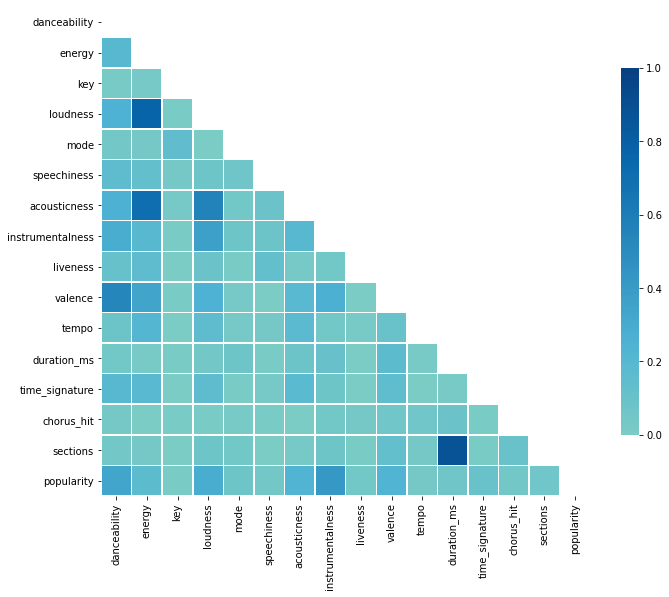

In [22]:
# Create a correlation matrix
corr = df.corr().abs()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio 
# GnBu is your color preference 
sns.heatmap(corr, mask=mask, cmap="GnBu", vmin=0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

#### Genre Countplot - Full Dataset (47,816 songs)

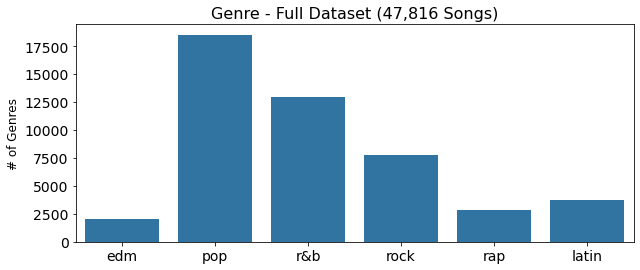

<Figure size 432x288 with 0 Axes>

In [23]:
fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='genre',data=df, color='tab:blue');
ax.grid(False)

plt.xlabel(None)
plt.ylabel("# of Genres", fontsize=12)
plt.title("Genre - Full Dataset (47,816 Songs)",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()

#### HOLD for more visualizations 

In [24]:
#for col in df.columns:
#    fig,ax=plt.subplots(figsize=(8,4))
#    if col!='artist' or 'track':
#        sns.countplot(x=col,data=df,ax=ax,color='tab:blue')
#    else:
#        sns.histplot(x=col,data=df,ax=ax,color='tab:blue')
#    ax.set(title=col.title())
#    plt.show()

In [25]:
# for col in df.columns:
#    fig,ax=plt.subplots(figsize=(8,4))
#    sns.countplot(x=col,data=df,ax=ax,color='tab:blue')
#    ax.set(title=col.title())
#    plt.show()

In [26]:
# for col in df.columns:
#    plt.figure(figsize=(12,8))
#    sns.displot(df[col],bins=20)
#    plt.title(col)
#    plt.show();

In [27]:
# for col in df.columns:
#     fig,ax=plt.subplots(figsize=(8,4))
#     if col!='uri' or 'artist':
#         sns.countplot(x=col,data=df,ax=ax,color='tab:blue')
#     #else:
#     #    sns.histplot(x=col,data=df,ax=ax,color='tab:blue')
#     ax.set(title=col.title())
#     plt.show()

# Preprocessing // Data Preparation for Modeling 

## Create Sample of Data 

In [28]:
# Create sample of 1000 songs from 47,816 songs 

sample = df.sample(n=1000,replace=False, random_state=11).reset_index()

In [29]:
# View sample dataframe

sample.head()

track              artist  \
0    Rock And Roll Dreams Come Through        Jim Steinman   
1  Peace Will Come (According To Plan)             Melanie   
2                        Let It Happen            Vangelis   
3                 Keeps Gettin' Better  Christina Aguilera   
4                               Aubrey               Bread   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:5Y7JlzuX1CtyEl8qf58qeU         0.628  0.6370    0   -13.175   
1  spotify:track:1lMhE01kAot77D8M17ac3m         0.370  0.2950    8    -7.307   
2  spotify:track:59HzNVTc331SYrI6vQEJJQ         0.349  0.4920    2   -13.886   
3  spotify:track:0j0n5CUS1g3QSwDWg8r5qq         0.645  0.6970    5    -4.733   
4  spotify:track:3his1UkcI0rwrniPDR9kTj         0.326  0.0902    7   -20.588   

   mode  speechiness  acousticness  ...  liveness  valence    tempo  \
0     1       0.0294        0.1510  ...     0.262    0.755  110.447   
1     1       0.0278        0.5670  ...     0.146    0.269  132.453   
2     0       0.0465        0.6990  ...     0.434    0.503  106.053   
3     0       0.0285        0.0739  ...     0.575    0.250  130.001   
4     1       0.0344        0.6470  ...     0.198    0.218  137.611   

   duration_ms  time_signature  chorus_hit  sections  popularity  decade genre  
0       387267               4    42.02340        18           1     80s   r&b  
1       199027               4    43.80021         9           1     70s   pop  
2       260400               4    69.23568         9           0     70s  rock  
3       181947               4    22.84639        10           1     00s   pop  
4       219493               4    37.19366        11           1     70s  rock  

[5 rows x 21 columns]

In [30]:
# Explore sample data (count, datatypes)

sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             1000 non-null   object 
 1   artist            1000 non-null   object 
 2   uri               1000 non-null   object 
 3   danceability      1000 non-null   float64
 4   energy            1000 non-null   float64
 5   key               1000 non-null   int64  
 6   loudness          1000 non-null   float64
 7   mode              1000 non-null   int64  
 8   speechiness       1000 non-null   float64
 9   acousticness      1000 non-null   float64
 10  instrumentalness  1000 non-null   float64
 11  liveness          1000 non-null   float64
 12  valence           1000 non-null   float64
 13  tempo             1000 non-null   float64
 14  duration_ms       1000 non-null   int64  
 15  time_signature    1000 non-null   int64  
 16  chorus_hit        1000 non-null   float64
 

### Convert Sample Dataframe into a csv file for Modeling - run once in intial build 
* keep code for reference 

In [31]:
# Code used to convert Sample dataframe into a csv file for modeling 

# sample.to_csv(r'Sample.csv')

### Create "url" Column from "uri" Column to Retrieve Songs from Spotify

In [32]:
# Create "url" column from "uri" column 

sample['url'] = sample['uri'].map(lambda x: x.lstrip('spotify:track:'))

In [33]:
# Check new "url" column 

sample.head()

track              artist  \
0    Rock And Roll Dreams Come Through        Jim Steinman   
1  Peace Will Come (According To Plan)             Melanie   
2                        Let It Happen            Vangelis   
3                 Keeps Gettin' Better  Christina Aguilera   
4                               Aubrey               Bread   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:5Y7JlzuX1CtyEl8qf58qeU         0.628  0.6370    0   -13.175   
1  spotify:track:1lMhE01kAot77D8M17ac3m         0.370  0.2950    8    -7.307   
2  spotify:track:59HzNVTc331SYrI6vQEJJQ         0.349  0.4920    2   -13.886   
3  spotify:track:0j0n5CUS1g3QSwDWg8r5qq         0.645  0.6970    5    -4.733   
4  spotify:track:3his1UkcI0rwrniPDR9kTj         0.326  0.0902    7   -20.588   

   mode  speechiness  acousticness  ...  valence    tempo  duration_ms  \
0     1       0.0294        0.1510  ...    0.755  110.447       387267   
1     1       0.0278        0.5670  ...    0.269  132.453       199027   
2     0       0.0465        0.6990  ...    0.503  106.053       260400   
3     0       0.0285        0.0739  ...    0.250  130.001       181947   
4     1       0.0344        0.6470  ...    0.218  137.611       219493   

   time_signature  chorus_hit  sections  popularity  decade  genre  \
0               4    42.02340        18           1     80s    r&b   
1               4    43.80021         9           1     70s    pop   
2               4    69.23568         9           0     70s   rock   
3               4    22.84639        10           1     00s    pop   
4               4    37.19366        11           1     70s   rock   

                      url  
0  5Y7JlzuX1CtyEl8qf58qeU  
1  1lMhE01kAot77D8M17ac3m  
2  59HzNVTc331SYrI6vQEJJQ  
3  0j0n5CUS1g3QSwDWg8r5qq  
4  3his1UkcI0rwrniPDR9kTj  

[5 rows x 22 columns]

In [34]:
# Create "url" column with 'https://open.spotify.com/track/' to retreive songs from Spotify

sample['url'] = 'https://open.spotify.com/track/' + sample['url']

In [35]:
# View dataframe with "url" column 

sample.head()

track              artist  \
0    Rock And Roll Dreams Come Through        Jim Steinman   
1  Peace Will Come (According To Plan)             Melanie   
2                        Let It Happen            Vangelis   
3                 Keeps Gettin' Better  Christina Aguilera   
4                               Aubrey               Bread   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:5Y7JlzuX1CtyEl8qf58qeU         0.628  0.6370    0   -13.175   
1  spotify:track:1lMhE01kAot77D8M17ac3m         0.370  0.2950    8    -7.307   
2  spotify:track:59HzNVTc331SYrI6vQEJJQ         0.349  0.4920    2   -13.886   
3  spotify:track:0j0n5CUS1g3QSwDWg8r5qq         0.645  0.6970    5    -4.733   
4  spotify:track:3his1UkcI0rwrniPDR9kTj         0.326  0.0902    7   -20.588   

   mode  speechiness  acousticness  ...  valence    tempo  duration_ms  \
0     1       0.0294        0.1510  ...    0.755  110.447       387267   
1     1       0.0278        0.5670  ...    0.269  132.453       199027   
2     0       0.0465        0.6990  ...    0.503  106.053       260400   
3     0       0.0285        0.0739  ...    0.250  130.001       181947   
4     1       0.0344        0.6470  ...    0.218  137.611       219493   

   time_signature  chorus_hit  sections  popularity  decade  genre  \
0               4    42.02340        18           1     80s    r&b   
1               4    43.80021         9           1     70s    pop   
2               4    69.23568         9           0     70s   rock   
3               4    22.84639        10           1     00s    pop   
4               4    37.19366        11           1     70s   rock   

                                                 url  
0  https://open.spotify.com/track/5Y7JlzuX1CtyEl8...  
1  https://open.spotify.com/track/1lMhE01kAot77D8...  
2  https://open.spotify.com/track/59HzNVTc331SYrI...  
3  https://open.spotify.com/track/0j0n5CUS1g3QSwD...  
4  https://open.spotify.com/track/3his1UkcI0rwrni...  

[5 rows x 22 columns]

### BUILD CHECKLIST & CLEAN DATA TO CREATE USABLE DATASET
There are 652 songs in final dataset to be used for model (653 minus ".ds store" file)

In [36]:
# Create a "checklist" column from "track" and "artist" columns to cross-check data alignment 

sample['checklist'] = sample['artist'] + " - " + sample['track'] + ".mp3"
sample.head()

track              artist  \
0    Rock And Roll Dreams Come Through        Jim Steinman   
1  Peace Will Come (According To Plan)             Melanie   
2                        Let It Happen            Vangelis   
3                 Keeps Gettin' Better  Christina Aguilera   
4                               Aubrey               Bread   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:5Y7JlzuX1CtyEl8qf58qeU         0.628  0.6370    0   -13.175   
1  spotify:track:1lMhE01kAot77D8M17ac3m         0.370  0.2950    8    -7.307   
2  spotify:track:59HzNVTc331SYrI6vQEJJQ         0.349  0.4920    2   -13.886   
3  spotify:track:0j0n5CUS1g3QSwDWg8r5qq         0.645  0.6970    5    -4.733   
4  spotify:track:3his1UkcI0rwrniPDR9kTj         0.326  0.0902    7   -20.588   

   mode  speechiness  acousticness  ...    tempo  duration_ms  time_signature  \
0     1       0.0294        0.1510  ...  110.447       387267               4   
1     1       0.0278        0.5670  ...  132.453       199027               4   
2     0       0.0465        0.6990  ...  106.053       260400               4   
3     0       0.0285        0.0739  ...  130.001       181947               4   
4     1       0.0344        0.6470  ...  137.611       219493               4   

   chorus_hit  sections  popularity  decade  genre  \
0    42.02340        18           1     80s    r&b   
1    43.80021         9           1     70s    pop   
2    69.23568         9           0     70s   rock   
3    22.84639        10           1     00s    pop   
4    37.19366        11           1     70s   rock   

                                                 url  \
0  https://open.spotify.com/track/5Y7JlzuX1CtyEl8...   
1  https://open.spotify.com/track/1lMhE01kAot77D8...   
2  https://open.spotify.com/track/59HzNVTc331SYrI...   
3  https://open.spotify.com/track/0j0n5CUS1g3QSwD...   
4  https://open.spotify.com/track/3his1UkcI0rwrni...   

                                           checklist  
0  Jim Steinman - Rock And Roll Dreams Come Throu...  
1  Melanie - Peace Will Come (According To Plan).mp3  
2                       Vangelis - Let It Happen.mp3  
3      Christina Aguilera - Keeps Gettin' Better.mp3  
4                                 Bread - Aubrey.mp3  

[5 rows x 23 columns]

In [37]:
# Check 

sample[sample['artist'] == 'Johnny Sea']['checklist'].values

array(['Johnny Sea - Day For Decision.mp3'], dtype=object)

In [38]:
# Check for tracks not in "checklist" column 

counter = 0
for track_name in os.listdir('Song_Data'):
    if track_name == '.DS_Store':
        continue
    if track_name not in sample['checklist'].values:
        print(track_name)
        artist, title = track_name.split('.mp3')[0].split('-')[:2]
        artist, title = artist.strip(), title.strip()
        
        print(f'Artist: {artist}\tTitle: {title}')
        display(sample[sample['artist'] == artist])
        print('-'*40)
        counter += 1
        print(counter)

The Supremes - Where Did Our Love Go.mp3
Artist: The Supremes	Title: Where Did Our Love Go


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
1
Frédéric Chopin, Arthur Rubinstein - Nocturnes, Op. 15 -  No. 2 in F-Sharp Major.mp3
Artist: Frédéric Chopin, Arthur Rubinstein	Title: Nocturnes, Op. 15


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
2
Johnny Sea - Day for Decision.mp3
Artist: Johnny Sea	Title: Day for Decision


track      artist                                   uri  \
950  Day For Decision  Johnny Sea  spotify:track:774FgCxWI5rdmLbjJn2lfj   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
950         0.373    0.37    7   -12.613     0       0.0716         0.858   

     ...   tempo  duration_ms  time_signature  chorus_hit  sections  \
950  ...  74.618       344533               4     31.6487        13   

     popularity  decade  genre  \
950           1     60s    r&b   

                                                   url  \
950  https://open.spotify.com/track/774FgCxWI5rdmLb...   

                             checklist  
950  Johnny Sea - Day For Decision.mp3  

[1 rows x 23 columns]

----------------------------------------
3
Vladimir Cosma, Michel Roques, Guy Pedersen - Je suis timide... Mais je me soigne - Final.mp3
Artist: Vladimir Cosma, Michel Roques, Guy Pedersen	Title: Je suis timide... Mais je me soigne


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
4
Santana, Michelle Branch - The Game of Love (feat. Michelle Branch) - Main  Radio Mix.mp3
Artist: Santana, Michelle Branch	Title: The Game of Love (feat. Michelle Branch)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
5
Huey Lewis & The News - The Heart Of Rock And Roll.mp3
Artist: Huey Lewis & The News	Title: The Heart Of Rock And Roll


track                 artist  \
35  The Heart Of Rock & Roll  Huey Lewis & The News   

                                     uri  danceability  energy  key  loudness  \
35  spotify:track:715sEYWkafd4xvl87dwZgu         0.594   0.756   10     -8.82   

    mode  speechiness  acousticness  ...    tempo  duration_ms  \
35     1       0.0379        0.0316  ...  143.298       304920   

    time_signature  chorus_hit  sections  popularity  decade  genre  \
35               4    21.27341        11           1     80s    r&b   

                                                  url  \
35  https://open.spotify.com/track/715sEYWkafd4xvl...   

                                            checklist  
35  Huey Lewis & The News - The Heart Of Rock & Ro...  

[1 rows x 23 columns]

----------------------------------------
6
The Motels - Only The Lonely - Remastered 1999.mp3
Artist: The Motels	Title: Only The Lonely


track      artist                                   uri  \
642  Only The Lonely  The Motels  spotify:track:1BZMMt9H0TheQGWQy44KmO   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
642         0.649   0.313    8   -16.631     1       0.0339        0.0503   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
642  ...  115.493       196200               4    26.02442         8   

     popularity  decade  genre  \
642           1     80s    pop   

                                                   url  \
642  https://open.spotify.com/track/1BZMMt9H0TheQGW...   

                            checklist  
642  The Motels - Only The Lonely.mp3  

[1 rows x 23 columns]

----------------------------------------
7
Buzzcocks - What Do I Get - 2001 Remastered Version.mp3
Artist: Buzzcocks	Title: What Do I Get


track     artist  \
249  You Say You Don't Love Me - 2001 Remastered Ve...  Buzzcocks   
367                               Why Can't I Touch It  Buzzcocks   
387           What Do I Get? - 2001 Remastered Version  Buzzcocks   

                                      uri  danceability  energy  key  \
249  spotify:track:4j1uZo4Fl9RfCfQMZiZN2D         0.312   0.880    5   
367  spotify:track:243FMSOdtcE6pOnqvYh28h         0.336   0.793    2   
387  spotify:track:0caQ80s7fyh8xJzD8Sq6Ir         0.234   0.947    0   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
249    -7.531     1       0.0535       0.00194  ...  163.917       174960   
367    -8.135     1       0.0387       0.00668  ...  175.403       227760   
387    -7.293     1       0.1170       0.01080  ...  176.279       175973   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
249               4    63.94337         8           0     70s   rock   
367               4    43.78914        11           0     90s   rock   
387               4    29.18363        11           0     70s   rock   

                                                   url  \
249  https://open.spotify.com/track/4j1uZo4Fl9RfCfQ...   
367  https://open.spotify.com/track/243FMSOdtcE6pOn...   
387  https://open.spotify.com/track/0caQ80s7fyh8xJz...   

                                             checklist  
249  Buzzcocks - You Say You Don't Love Me - 2001 R...  
367               Buzzcocks - Why Can't I Touch It.mp3  
387  Buzzcocks - What Do I Get? - 2001 Remastered V...  

[3 rows x 23 columns]

----------------------------------------
8
The Bubble Puppy - Hot Smoke & Sasafrass (Live Version).mp3
Artist: The Bubble Puppy	Title: Hot Smoke & Sasafrass (Live Version)


track            artist  \
320  Hot Smoke & Sasafrass  The Bubble Puppy   

                                      uri  danceability  energy  key  \
320  spotify:track:01AxKIwrI7bCLOZ0nmw41I         0.558   0.738    0   

     loudness  mode  speechiness  acousticness  ...   tempo  duration_ms  \
320    -14.27     1       0.0668          0.75  ...  82.556       155840   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
320               4    27.82633         9           1     60s    pop   

                                                   url  \
320  https://open.spotify.com/track/01AxKIwrI7bCLOZ...   

                                        checklist  
320  The Bubble Puppy - Hot Smoke & Sasafrass.mp3  

[1 rows x 23 columns]

----------------------------------------
9
Trans-Siberian Orchestra - Christmas Eve  Sarajevo 1224 - Instrumental.mp3
Artist: Trans	Title: Siberian Orchestra


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
10
Billy Joel, Ray Charles - Baby Grand (with Ray Charles).mp3
Artist: Billy Joel, Ray Charles	Title: Baby Grand (with Ray Charles)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
11
David Banner, Lil' Flip - Like A Pimp.mp3
Artist: David Banner, Lil' Flip	Title: Like A Pimp


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
12
Jeff Lewis, Mitchell Hope, Disney - Did I Mention.mp3
Artist: Jeff Lewis, Mitchell Hope, Disney	Title: Did I Mention


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
13
Eric Burdon & the Animals - See See Rider.mp3
Artist: Eric Burdon & the Animals	Title: See See Rider


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
14
Gaetano Donizetti, Mirella Freni, Francesco Molinari-Pradelli, Orchestra Del Teatro Dell'Opera Di Roma - L'Elisir d'amore, 'Elixir of Love' (1988 Digital Remaster), Act I -  Che vuol dire codesta suonata.mp3
Artist: Gaetano Donizetti, Mirella Freni, Francesco Molinari	Title: Pradelli, Orchestra Del Teatro Dell'Opera Di Roma


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
15
A$AP Rocky, Moby - A$AP Forever (feat. Moby).mp3
Artist: A$AP Rocky, Moby	Title: A$AP Forever (feat. Moby)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
16
Savoy Brown - I'm Tired - Where Am I.mp3
Artist: Savoy Brown	Title: I'm Tired


track       artist                                   uri  \
321  I'm Tired  Savoy Brown  spotify:track:6f8jpTDZ0uekP9RxuAvo8T   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
321         0.627   0.257    2   -16.129     1        0.043         0.725   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
321  ...  109.334       305200               4    19.18091        19   

     popularity  decade  genre  \
321           1     60s    r&b   

                                                   url  \
321  https://open.spotify.com/track/6f8jpTDZ0uekP9R...   

                       checklist  
321  Savoy Brown - I'm Tired.mp3  

[1 rows x 23 columns]

----------------------------------------
17
Ronnie Dove - One Kiss for Old Times' Sake.mp3
Artist: Ronnie Dove	Title: One Kiss for Old Times' Sake


track       artist  \
408  One Kiss For Old Times' Sake  Ronnie Dove   

                                      uri  danceability  energy  key  \
408  spotify:track:70EUOJoFKWuzPCyHl6l6nL         0.289   0.446    4   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
408    -8.118     1       0.0343         0.742  ...  116.378       181680   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
408               3    24.36891        10           1     60s   rock   

                                                   url  \
408  https://open.spotify.com/track/70EUOJoFKWuzPCy...   

                                          checklist  
408  Ronnie Dove - One Kiss For Old Times' Sake.mp3  

[1 rows x 23 columns]

----------------------------------------
18
The Beach Boys - Fun, Fun, Fun (Mono).mp3
Artist: The Beach Boys	Title: Fun, Fun, Fun (Mono)


track          artist  \
218  Bluebirds Over The Mountain  The Beach Boys   
372                Fun, Fun, Fun  The Beach Boys   
585                      Friends  The Beach Boys   

                                      uri  danceability  energy  key  \
218  spotify:track:3qlVEv0Qtd6jVVjXQCKPZv         0.665   0.704    2   
372  spotify:track:5L0L3RyON6g8avnI20uubN         0.517   0.796    3   
585  spotify:track:0vKTQKH82qOthIyP4L9Tk9         0.544   0.362    2   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
218    -7.268     1       0.0333         0.155  ...  127.477       173733   
372    -6.313     1       0.0341         0.195  ...  155.532       138907   
585    -9.885     1       0.0276         0.310  ...  125.737       153027   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
218               4    53.87448         8           1     60s    pop   
372               4    20.68211         9           1     60s    pop   
585               3    46.14951         9           1     60s  latin   

                                                   url  \
218  https://open.spotify.com/track/3qlVEv0Qtd6jVVj...   
372  https://open.spotify.com/track/5L0L3RyON6g8avn...   
585  https://open.spotify.com/track/0vKTQKH82qOthIy...   

                                            checklist  
218  The Beach Boys - Bluebirds Over The Mountain.mp3  
372                The Beach Boys - Fun, Fun, Fun.mp3  
585                      The Beach Boys - Friends.mp3  

[3 rows x 23 columns]

----------------------------------------
19
The Rolling Stones - 19th Nervous Breakdown - Mono Version.mp3
Artist: The Rolling Stones	Title: 19th Nervous Breakdown


track              artist  \
911  19th Nervous Breakdown  The Rolling Stones   

                                      uri  danceability  energy  key  \
911  spotify:track:21ElXnithj4MX8E4rg5lh8         0.477   0.842    4   

     loudness  mode  speechiness  acousticness  ...   tempo  duration_ms  \
911    -7.356     1       0.0371        0.0142  ...  96.457       236400   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
911               4    86.48069        10           1     60s    pop   

                                                   url  \
911  https://open.spotify.com/track/21ElXnithj4MX8E...   

                                           checklist  
911  The Rolling Stones - 19th Nervous Breakdown.mp3  

[1 rows x 23 columns]

----------------------------------------
20
Brigitte Bardot, Serge Gainsbourg - Bonnie And Clyde.mp3
Artist: Brigitte Bardot, Serge Gainsbourg	Title: Bonnie And Clyde


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
21
Gilberto Gil - Coça Coça Lacerdinha.mp3
Artist: Gilberto Gil	Title: Coça Coça Lacerdinha


track        artist                                   uri  \
481  Noite Dos Mascarados  Gilberto Gil  spotify:track:4XWGoXFjNUpYeHFcSI1T94   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
481          0.49   0.302   11    -9.991     0       0.0354         0.478   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
481  ...  109.171       149293               4    33.41204         4   

     popularity  decade  genre  \
481           0     60s    pop   

                                                   url  \
481  https://open.spotify.com/track/4XWGoXFjNUpYeHF...   

                                   checklist  
481  Gilberto Gil - Noite Dos Mascarados.mp3  

[1 rows x 23 columns]

----------------------------------------
22
2 LIVE CREW - Me So Horny.mp3
Artist: 2 LIVE CREW	Title: Me So Horny


track       artist                                   uri  \
199  Do Wah Diddy  2 LIVE CREW  spotify:track:57goBNSlWZOTn2bLDm1L0s   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
199         0.935   0.474    4   -12.911     0        0.115      0.000637   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
199  ...  124.751       241467               4    22.48638        12   

     popularity  decade  genre  \
199           0     80s    r&b   

                                                   url  \
199  https://open.spotify.com/track/57goBNSlWZOTn2b...   

                          checklist  
199  2 LIVE CREW - Do Wah Diddy.mp3  

[1 rows x 23 columns]

----------------------------------------
23
Gaetano Donizetti, Mirella Freni, Francesco Molinari-Pradelli, Orchestra Del Teatro Dell'Opera Di Roma - L'Elisir d'amore, 'Elixir of Love' (1988 Digital Remaster), Act II -  Eccola.mp3
Artist: Gaetano Donizetti, Mirella Freni, Francesco Molinari	Title: Pradelli, Orchestra Del Teatro Dell'Opera Di Roma


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
24
Sukhbir, Ikka - Oh Ho Ho Ho (Remix).mp3
Artist: Sukhbir, Ikka	Title: Oh Ho Ho Ho (Remix)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
25
Axwell, Sebastian Ingrosso, Steve Angello, Laidback Luke, Deborah Cox, Dimitri Vegas & Like Mike, Swedish House Mafia - Leave The World Behind - Dimitri Vegas & Like Mike vs. SHM Dark Forest Edit.mp3
Artist: Axwell, Sebastian Ingrosso, Steve Angello, Laidback Luke, Deborah Cox, Dimitri Vegas & Like Mike, Swedish House Mafia	Title: Leave The World Behind


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
26
Roberta Flack, Donny Hathaway - You've Lost That Lovin' Feelin'.mp3
Artist: Roberta Flack, Donny Hathaway	Title: You've Lost That Lovin' Feelin'


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
27
6ix9ine, Nicki Minaj, Murda Beatz - FEFE.mp3
Artist: 6ix9ine, Nicki Minaj, Murda Beatz	Title: FEFE


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
28
Usher - My Way.mp3
Artist: Usher	Title: My Way


track artist                                   uri  danceability  energy  \
792  Burn  Usher  spotify:track:7z3N2W7Xz1t2G2sAO8wFVH         0.796   0.477   

     key  loudness  mode  speechiness  acousticness  ...    tempo  \
792    1    -7.161     1        0.108         0.314  ...  119.928   

     duration_ms  time_signature  chorus_hit  sections  popularity  decade  \
792       231933               4    21.78233        11           1     00s   

     genre                                                url  \
792    pop  https://open.spotify.com/track/7z3N2W7Xz1t2G2s...   

            checklist  
792  Usher - Burn.mp3  

[1 rows x 23 columns]

----------------------------------------
29
Giuseppe Verdi, Staatskapelle Berlin, Heinrich Schlusnus, Erna Berger, Robert Heger - Rigoletto -  Act II -  'Mein Vater!'.mp3
Artist: Giuseppe Verdi, Staatskapelle Berlin, Heinrich Schlusnus, Erna Berger, Robert Heger	Title: Rigoletto


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
30
Atom And His Package - Head (She's Just a...) [Rock Version].mp3
Artist: Atom And His Package	Title: Head (She's Just a...) [Rock Version]


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
31
The Spinners - Cupid  I've Loved You for a Long Time.mp3
Artist: The Spinners	Title: Cupid  I've Loved You for a Long Time


track        artist  \
343  Cupid/I've Loved You For A Long Time  The Spinners   

                                      uri  danceability  energy  key  \
343  spotify:track:6zKFVGEDGLtf63Yxpz8kzJ         0.783   0.669    9   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
343    -9.438     1        0.043         0.355  ...  122.772       236693   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
343               4    47.20365        11           1     80s    pop   

                                                   url  \
343  https://open.spotify.com/track/6zKFVGEDGLtf63Y...   

                                             checklist  
343  The Spinners - Cupid/I've Loved You For A Long...  

[1 rows x 23 columns]

----------------------------------------
32
Santana, Rob Thomas - Smooth (feat. Rob Thomas).mp3
Artist: Santana, Rob Thomas	Title: Smooth (feat. Rob Thomas)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
33
Chance the Rapper, MadeinTYO, DaBaby - Hot Shower.mp3
Artist: Chance the Rapper, MadeinTYO, DaBaby	Title: Hot Shower


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
34
Future - Fck Up Some Commas.mp3
Artist: Future	Title: Fck Up Some Commas


track  artist                                   uri  danceability  \
142  Crushed Up  Future  spotify:track:7wcyO1rrH3Ru4t659IjG41         0.781   
260      Commas  Future  spotify:track:49zD0wr2S3d0lZPib0K4e1         0.874   

     energy  key  loudness  mode  speechiness  acousticness  ...    tempo  \
142   0.597   10    -6.794     0        0.230        0.0415  ...  158.043   
260   0.568   11    -5.896     0        0.224        0.0698  ...  139.995   

     duration_ms  time_signature  chorus_hit  sections  popularity  decade  \
142       149949               4    22.48979         7           1     10s   
260       237400               4    27.46727         9           1     10s   

     genre                                                url  \
142    rap  https://open.spotify.com/track/7wcyO1rrH3Ru4t6...   
260    rap  https://open.spotify.com/track/49zD0wr2S3d0lZP...   

                   checklist  
142  Future - Crushed Up.mp3  
260      Future - Commas.mp3  

[2 rows x 23 columns]

----------------------------------------
35
Paul Elstak, Dr Phunk, Joel Beukers - Groeien.mp3
Artist: Paul Elstak, Dr Phunk, Joel Beukers	Title: Groeien


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
36
Michael Jackson - Got To Be There - Single Version.mp3
Artist: Michael Jackson	Title: Got To Be There


track           artist  \
341            You Rock My World  Michael Jackson   
501              Got To Be There  Michael Jackson   
739  Wanna Be Startin' Somethin'  Michael Jackson   

                                      uri  danceability  energy  key  \
341  spotify:track:1Lhwn4PqeGpM4LTVUowW76         0.854   0.673    4   
501  spotify:track:08QvVJT8y6b0i2nH9mUeMj         0.349   0.569    1   
739  spotify:track:2kulOHR2XY6YDZCWXb38hn         0.846   0.922    6   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
341    -3.132     0       0.1850        0.0380  ...   95.000       337733   
501    -9.512     1       0.0434        0.1100  ...  171.354       204907   
739    -4.206     0       0.0438        0.0219  ...  122.195       362373   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
341               4    32.92256         9           1     00s    r&b   
501               4    18.03481        11           1     70s   rock   
739               4    65.30564        15           1     80s    r&b   

                                                   url  \
341  https://open.spotify.com/track/1Lhwn4PqeGpM4LT...   
501  https://open.spotify.com/track/08QvVJT8y6b0i2n...   
739  https://open.spotify.com/track/2kulOHR2XY6YDZC...   

                                             checklist  
341            Michael Jackson - You Rock My World.mp3  
501              Michael Jackson - Got To Be There.mp3  
739  Michael Jackson - Wanna Be Startin' Somethin'.mp3  

[3 rows x 23 columns]

----------------------------------------
37
Ariana Grande - into you - live.mp3
Artist: Ariana Grande	Title: into you


track         artist                                   uri  \
121        Into You  Ariana Grande  spotify:track:6rvHjRpnRhzQVeu8I5CqHp   
514  God Is A Woman  Ariana Grande  spotify:track:67kQ3UW7saqCFqB54BVKKI   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
121         0.590   0.871    6    -3.665     0       0.1130         0.073   
514         0.498   0.836   10    -5.224     0       0.0669         0.158   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
121  ...  109.869       179232               4    49.63602        10   
514  ...  144.882       213068               4    76.19257         9   

     popularity  decade  genre  \
121           1     10s  latin   
514           1     10s    pop   

                                                   url  \
121  https://open.spotify.com/track/6rvHjRpnRhzQVeu...   
514  https://open.spotify.com/track/67kQ3UW7saqCFqB...   

                              checklist  
121        Ariana Grande - Into You.mp3  
514  Ariana Grande - God Is A Woman.mp3  

[2 rows x 23 columns]

----------------------------------------
38
Malcolm Arnold, Henk De Graaf, Daniël Wayenberg - Sonatine for Clarinet and Piano -  II. Andantino.mp3
Artist: Malcolm Arnold, Henk De Graaf, Daniël Wayenberg	Title: Sonatine for Clarinet and Piano


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
39
Lil' Flip - Game Over.mp3
Artist: Lil' Flip	Title: Game Over


track     artist                                   uri  \
784  Game Over (Flip)  Lil' Flip  spotify:track:79lmvU7Qmc8QpXilbSk37z   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
784         0.813    0.59    8    -8.998     1        0.378       0.00106   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
784  ...  159.961       232467               4    38.94443         8   

     popularity  decade  genre  \
784           1     00s    rap   

                                                   url  \
784  https://open.spotify.com/track/79lmvU7Qmc8QpXi...   

                            checklist  
784  Lil' Flip - Game Over (Flip).mp3  

[1 rows x 23 columns]

----------------------------------------
40
Prince - Purple Rain.mp3
Artist: Prince	Title: Purple Rain


track  artist                                   uri  danceability  energy  \
317  1999  Prince  spotify:track:2H7PHVdQ3mXqEHXcvclTB0         0.866    0.73   

     key  loudness  mode  speechiness  acousticness  ...    tempo  \
317    5    -8.201     1       0.0767         0.137  ...  118.523   

     duration_ms  time_signature  chorus_hit  sections  popularity  decade  \
317       379267               4    35.29387        14           1     10s   

     genre                                                url  \
317    r&b  https://open.spotify.com/track/2H7PHVdQ3mXqEHX...   

             checklist  
317  Prince - 1999.mp3  

[1 rows x 23 columns]

----------------------------------------
41
Reality - Yolanda - Club Mix.mp3
Artist: Reality	Title: Yolanda


track   artist                                   uri  danceability  \
531  Yolanda  Reality  spotify:track:6auKJC7E0UN96e3kQuEaT1         0.763   

     energy  key  loudness  mode  speechiness  acousticness  ...    tempo  \
531   0.678    8     -9.25     0       0.0577       0.00049  ...  123.927   

     duration_ms  time_signature  chorus_hit  sections  popularity  decade  \
531       307049               4    30.25096        13           1     90s   

     genre                                                url  \
531    r&b  https://open.spotify.com/track/6auKJC7E0UN96e3...   

                 checklist  
531  Reality - Yolanda.mp3  

[1 rows x 23 columns]

----------------------------------------
42
Kevin Saunderson, Inner City, House Of Virus - Big Fun - House Of Virus Extended Remix.mp3
Artist: Kevin Saunderson, Inner City, House Of Virus	Title: Big Fun


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
43
The Five Americans - Zip Code (Rerecord).mp3
Artist: The Five Americans	Title: Zip Code (Rerecord)


track              artist                                   uri  \
452  Zip Code  The Five Americans  spotify:track:7hTW791CEdFSlw2wouCVYP   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
452         0.393   0.594    9    -5.986     1       0.0267        0.0394   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
452  ...  139.535       175040               4    40.89166         7   

     popularity  decade  genre  \
452           1     60s    pop   

                                                   url  \
452  https://open.spotify.com/track/7hTW791CEdFSlw2...   

                             checklist  
452  The Five Americans - Zip Code.mp3  

[1 rows x 23 columns]

----------------------------------------
44
Bone Thugs-N-Harmony - 1st of Tha Month.mp3
Artist: Bone Thugs	Title: N


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
45
Billie Eilish, Khalid - lovely (with Khalid).mp3
Artist: Billie Eilish, Khalid	Title: lovely (with Khalid)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
46
5 Seconds of Summer - Fly Away.mp3
Artist: 5 Seconds of Summer	Title: Fly Away


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
47
Elton John - Bite Your Lip (Get Up And Dance!).mp3
Artist: Elton John	Title: Bite Your Lip (Get Up And Dance!)


track      artist  \
108                        Nobody Wins  Elton John   
522  Bite Your Lip (Get up and dance!)  Elton John   

                                      uri  danceability  energy  key  \
108  spotify:track:2fnEJ2Lltacut4fcIwsOcj         0.639   0.688   10   
522  spotify:track:0guUn7StaYwajmI8ohihMA         0.567   0.956    5   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
108    -9.671     0       0.0542       0.07250  ...  118.158       219493   
522    -6.957     1       0.0855       0.00837  ...  142.455       402867   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
108               4    54.66983         8           1     80s    pop   
522               4    41.69543        17           1     70s    r&b   

                                                   url  \
108  https://open.spotify.com/track/2fnEJ2Lltacut4f...   
522  https://open.spotify.com/track/0guUn7StaYwajmI...   

                                             checklist  
108                       Elton John - Nobody Wins.mp3  
522  Elton John - Bite Your Lip (Get up and dance!)...  

[2 rows x 23 columns]

----------------------------------------
48
DJ Khaled, SZA - Just Us (feat. SZA).mp3
Artist: DJ Khaled, SZA	Title: Just Us (feat. SZA)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
49
Edo. G, Pete Rock - Boston.mp3
Artist: Edo. G, Pete Rock	Title: Boston


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
50
John Cafferty & the Beaver Brown Band - Small Town Girl.mp3
Artist: John Cafferty & the Beaver Brown Band	Title: Small Town Girl


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
51
Jay Black - The Part of Me That Needs You Most.mp3
Artist: Jay Black	Title: The Part of Me That Needs You Most


track     artist  \
433  The Part Of Me That Needs You Most  Jay Black   

                                      uri  danceability  energy  key  \
433  spotify:track:5A3CAM8Cz6wogsIv9hNhU9         0.609   0.798   10   

     loudness  mode  speechiness  acousticness  ...   tempo  duration_ms  \
433    -6.062     1       0.0549         0.406  ...  98.789       223655   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
433               4    38.18351        10           1     80s    pop   

                                                   url  \
433  https://open.spotify.com/track/5A3CAM8Cz6wogsI...   

                                             checklist  
433  Jay Black - The Part Of Me That Needs You Most...  

[1 rows x 23 columns]

----------------------------------------
52
ZZ Top - Arrested for Driving While Blind.mp3
Artist: ZZ Top	Title: Arrested for Driving While Blind


track  artist  \
743  Arrested For Driving While Blind  ZZ Top   

                                      uri  danceability  energy  key  \
743  spotify:track:5NR2RuQ5rQplGLaKS7ZwAu         0.553   0.672    2   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
743   -10.917     0       0.0438         0.215  ...  137.414       186587   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
743               4     50.7215         8           1     70s    pop   

                                                   url  \
743  https://open.spotify.com/track/5NR2RuQ5rQplGLa...   

                                         checklist  
743  ZZ Top - Arrested For Driving While Blind.mp3  

[1 rows x 23 columns]

----------------------------------------
53
Delinquent Habits - Tres Delinquentes - Radio Version.mp3
Artist: Delinquent Habits	Title: Tres Delinquentes


track             artist  \
927  Tres Delinquentes  Delinquent Habits   

                                      uri  danceability  energy  key  \
927  spotify:track:1dstLlsgEFPsaiccsUz2SP         0.826   0.698   11   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
927    -4.004     1        0.151        0.0177  ...  100.108       255693   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
927               4    53.16716        10           1     90s    r&b   

                                                   url  \
927  https://open.spotify.com/track/1dstLlsgEFPsaic...   

                                     checklist  
927  Delinquent Habits - Tres Delinquentes.mp3  

[1 rows x 23 columns]

----------------------------------------
54
Brian Bennett, Alan Hawkshaw - Name of the Game.mp3
Artist: Brian Bennett, Alan Hawkshaw	Title: Name of the Game


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
55
John Legend, Ludacris - Tonight (Best You Ever Had) (feat. Ludacris).mp3
Artist: John Legend, Ludacris	Title: Tonight (Best You Ever Had) (feat. Ludacris)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
56
Dr. Hook - Years From Now - Single Version.mp3
Artist: Dr. Hook	Title: Years From Now


track    artist                                   uri  \
596  Years From Now  Dr. Hook  spotify:track:3iGVtGwO32g758QDyqrErZ   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
596         0.405   0.467    8   -12.424     1       0.0366         0.783   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
596  ...  149.955       175000               3    29.47145        10   

     popularity  decade  genre  \
596           1     80s    pop   

                                                   url  \
596  https://open.spotify.com/track/3iGVtGwO32g758Q...   

                         checklist  
596  Dr. Hook - Years From Now.mp3  

[1 rows x 23 columns]

----------------------------------------
57
Jim Steinman - Rock and Roll Dreams Come Through.mp3
Artist: Jim Steinman	Title: Rock and Roll Dreams Come Through


track        artist  \
0  Rock And Roll Dreams Come Through  Jim Steinman   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:5Y7JlzuX1CtyEl8qf58qeU         0.628   0.637    0   -13.175   

   mode  speechiness  acousticness  ...    tempo  duration_ms  time_signature  \
0     1       0.0294         0.151  ...  110.447       387267               4   

   chorus_hit  sections  popularity  decade  genre  \
0     42.0234        18           1     80s    r&b   

                                                 url  \
0  https://open.spotify.com/track/5Y7JlzuX1CtyEl8...   

                                           checklist  
0  Jim Steinman - Rock And Roll Dreams Come Throu...  

[1 rows x 23 columns]

----------------------------------------
58
Lionel Richie - Angel - Metro Mix Radio Edit.mp3
Artist: Lionel Richie	Title: Angel


track         artist  \
274                   Angel  Lionel Richie   
460             Do It To Me  Lionel Richie   
462   Love Will Conquer All  Lionel Richie   
817  Running With The Night  Lionel Richie   

                                      uri  danceability  energy  key  \
274  spotify:track:55oovDrYcI8EzQxg7mHVrD         0.725   0.822    9   
460  spotify:track:1tKxrKBYIIykuLvipSWfgy         0.686   0.536    0   
462  spotify:track:6nbi2AJ9hAi2SE8jH6mRKV         0.790   0.443    2   
817  spotify:track:3dciOkDSHPrhvriovMdw8N         0.766   0.598    9   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
274   -10.059     1       0.0402        0.0111  ...  127.969       223040   
460    -9.908     1       0.0274        0.1610  ...   91.503       363333   
462   -10.078     0       0.0260        0.1690  ...   98.043       340987   
817    -9.720     0       0.0355        0.0258  ...  120.190       249347   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
274               4    32.05269        11           1     00s    edm   
460               4    19.99232        15           1     90s    r&b   
462               4    85.62603         9           1     80s    r&b   
817               4    31.60088        14           1     80s    r&b   

                                                   url  \
274  https://open.spotify.com/track/55oovDrYcI8EzQx...   
460  https://open.spotify.com/track/1tKxrKBYIIykuLv...   
462  https://open.spotify.com/track/6nbi2AJ9hAi2SE8...   
817  https://open.spotify.com/track/3dciOkDSHPrhvri...   

                                      checklist  
274                   Lionel Richie - Angel.mp3  
460             Lionel Richie - Do It To Me.mp3  
462   Lionel Richie - Love Will Conquer All.mp3  
817  Lionel Richie - Running With The Night.mp3  

[4 rows x 23 columns]

----------------------------------------
59
Miri Ben-Ari, Anthony Hamilton, Algebra Blessett - She Was Just A Friend.mp3
Artist: Miri Ben	Title: Ari, Anthony Hamilton, Algebra Blessett


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
60
Tito Puente - Babarabatiri.mp3
Artist: Tito Puente	Title: Babarabatiri


track       artist  \
791  Babarabatiri - Live In Puerto Rico / 1963  Tito Puente   

                                      uri  danceability  energy  key  \
791  spotify:track:0zrktwkID2FyITcV7k2l0O         0.632   0.925    0   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
791    -5.148     1       0.0751         0.733  ...  100.875       224726   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
791               4    29.94239        12           0     60s  latin   

                                                   url  \
791  https://open.spotify.com/track/0zrktwkID2FyITc...   

                                             checklist  
791  Tito Puente - Babarabatiri - Live In Puerto Ri...  

[1 rows x 23 columns]

----------------------------------------
61
Marshmello, Lil Peep - Spotlight.mp3
Artist: Marshmello, Lil Peep	Title: Spotlight


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
62
Ariana Grande - god is a woman - live.mp3
Artist: Ariana Grande	Title: god is a woman


track         artist                                   uri  \
121        Into You  Ariana Grande  spotify:track:6rvHjRpnRhzQVeu8I5CqHp   
514  God Is A Woman  Ariana Grande  spotify:track:67kQ3UW7saqCFqB54BVKKI   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
121         0.590   0.871    6    -3.665     0       0.1130         0.073   
514         0.498   0.836   10    -5.224     0       0.0669         0.158   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
121  ...  109.869       179232               4    49.63602        10   
514  ...  144.882       213068               4    76.19257         9   

     popularity  decade  genre  \
121           1     10s  latin   
514           1     10s    pop   

                                                   url  \
121  https://open.spotify.com/track/6rvHjRpnRhzQVeu...   
514  https://open.spotify.com/track/67kQ3UW7saqCFqB...   

                              checklist  
121        Ariana Grande - Into You.mp3  
514  Ariana Grande - God Is A Woman.mp3  

[2 rows x 23 columns]

----------------------------------------
63
Chicago - Hard to Say I'm Sorry  Get Away - 2006 Remaster.mp3
Artist: Chicago	Title: Hard to Say I'm Sorry  Get Away


track   artist                                   uri  \
572  Hard To Say I'm Sorry  Chicago  spotify:track:07TnWCHrFkvF61GzJuLVt0   
663           25 Or 6 To 4  Chicago  spotify:track:7GqIDx2QVGOpd4r1fZaUUW   
864         Stay The Night  Chicago  spotify:track:0siySPc0ooo4rNTdwaoXM1   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
572         0.398   0.570    4    -7.068     1       0.0340         0.056   
663         0.604   0.905    4    -7.059     0       0.0578         0.309   
864         0.686   0.662    0    -5.310     1       0.0317         0.110   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
572  ...  140.974       304213               4    40.18855         8   
663  ...  147.448       289800               4    28.54216        16   
864  ...   84.225       229693               4    30.79333         8   

     popularity  decade  genre  \
572           1     80s    r&b   
663           1     80s    r&b   
864           1     80s    pop   

                                                   url  \
572  https://open.spotify.com/track/07TnWCHrFkvF61G...   
663  https://open.spotify.com/track/7GqIDx2QVGOpd4r...   
864  https://open.spotify.com/track/0siySPc0ooo4rNT...   

                               checklist  
572  Chicago - Hard To Say I'm Sorry.mp3  
663           Chicago - 25 Or 6 To 4.mp3  
864         Chicago - Stay The Night.mp3  

[3 rows x 23 columns]

----------------------------------------
64
Ski Mask The Slump God, Juice WRLD - Nuketown (feat. Juice WRLD).mp3
Artist: Ski Mask The Slump God, Juice WRLD	Title: Nuketown (feat. Juice WRLD)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
65
Lionel Richie - Running With The Night - Single Version.mp3
Artist: Lionel Richie	Title: Running With The Night


track         artist  \
274                   Angel  Lionel Richie   
460             Do It To Me  Lionel Richie   
462   Love Will Conquer All  Lionel Richie   
817  Running With The Night  Lionel Richie   

                                      uri  danceability  energy  key  \
274  spotify:track:55oovDrYcI8EzQxg7mHVrD         0.725   0.822    9   
460  spotify:track:1tKxrKBYIIykuLvipSWfgy         0.686   0.536    0   
462  spotify:track:6nbi2AJ9hAi2SE8jH6mRKV         0.790   0.443    2   
817  spotify:track:3dciOkDSHPrhvriovMdw8N         0.766   0.598    9   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
274   -10.059     1       0.0402        0.0111  ...  127.969       223040   
460    -9.908     1       0.0274        0.1610  ...   91.503       363333   
462   -10.078     0       0.0260        0.1690  ...   98.043       340987   
817    -9.720     0       0.0355        0.0258  ...  120.190       249347   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
274               4    32.05269        11           1     00s    edm   
460               4    19.99232        15           1     90s    r&b   
462               4    85.62603         9           1     80s    r&b   
817               4    31.60088        14           1     80s    r&b   

                                                   url  \
274  https://open.spotify.com/track/55oovDrYcI8EzQx...   
460  https://open.spotify.com/track/1tKxrKBYIIykuLv...   
462  https://open.spotify.com/track/6nbi2AJ9hAi2SE8...   
817  https://open.spotify.com/track/3dciOkDSHPrhvri...   

                                      checklist  
274                   Lionel Richie - Angel.mp3  
460             Lionel Richie - Do It To Me.mp3  
462   Lionel Richie - Love Will Conquer All.mp3  
817  Lionel Richie - Running With The Night.mp3  

[4 rows x 23 columns]

----------------------------------------
66
'In The Heights' Original Broadway Company, Mandy Gonzalez - Breathe.mp3
Artist: 'In The Heights' Original Broadway Company, Mandy Gonzalez	Title: Breathe


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
67
Michael Bolton - (Sittin' On) The Dock of the Bay.mp3
Artist: Michael Bolton	Title: (Sittin' On) The Dock of the Bay


track          artist  \
583                        Completely  Michael Bolton   
666  (Sittin' On) The Dock Of The Bay  Michael Bolton   

                                      uri  danceability  energy  key  \
583  spotify:track:1ZnwFwzQoFno1T2aYzVDmr         0.332   0.351    7   
666  spotify:track:0tvKT0EdO4Gm1nw7rgiHHa         0.464   0.525    2   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
583    -8.593     1       0.0320         0.620  ...  113.158       264907   
666   -13.806     1       0.0566         0.192  ...  178.352       231240   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
583               4    36.93524        11           1     90s   rock   
666               4    32.25597        12           1     80s    edm   

                                                   url  \
583  https://open.spotify.com/track/1ZnwFwzQoFno1T2...   
666  https://open.spotify.com/track/0tvKT0EdO4Gm1nw...   

                                             checklist  
583                    Michael Bolton - Completely.mp3  
666  Michael Bolton - (Sittin' On) The Dock Of The ...  

[2 rows x 23 columns]

----------------------------------------
68
The Band Perry - Don’t Let Me Be Lonely.mp3
Artist: The Band Perry	Title: Don’t Let Me Be Lonely


track          artist  \
394  Don't Let Me Be Lonely  The Band Perry   

                                      uri  danceability  energy  key  \
394  spotify:track:1vjx9wZEyhhM1VRmIoDiRk         0.597   0.682    1   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
394    -4.573     1       0.0283         0.124  ...  111.022       251227   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
394               4    22.90087        10           1     10s    r&b   

                                                   url  \
394  https://open.spotify.com/track/1vjx9wZEyhhM1VR...   

                                       checklist  
394  The Band Perry - Don't Let Me Be Lonely.mp3  

[1 rows x 23 columns]

----------------------------------------
69
Kylie Minogue - Love at First Sight.mp3
Artist: Kylie Minogue	Title: Love at First Sight


track         artist                                   uri  \
617  Love At First Sight  Kylie Minogue  spotify:track:6ua8mbyHXTHpAmGyGpFAS2   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
617         0.603   0.774    3    -6.066     0       0.0428        0.0288   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
617  ...  124.994       238267               4    39.01804        10   

     popularity  decade  genre  \
617           1     00s    r&b   

                                                   url  \
617  https://open.spotify.com/track/6ua8mbyHXTHpAmG...   

                                   checklist  
617  Kylie Minogue - Love At First Sight.mp3  

[1 rows x 23 columns]

----------------------------------------
70
The Isley Brothers, Ronald Isley - What Would You Do.mp3
Artist: The Isley Brothers, Ronald Isley	Title: What Would You Do


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
71
Glee Cast, Jonathan Groff - Run Joey Run (Glee Cast Version) (feat. Jonathan Groff).mp3
Artist: Glee Cast, Jonathan Groff	Title: Run Joey Run (Glee Cast Version) (feat. Jonathan Groff)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
72
Charlie Rich - I Don't See Me in Your Eyes Anymore.mp3
Artist: Charlie Rich	Title: I Don't See Me in Your Eyes Anymore


track        artist  \
872  I Don't See Me In Your Eyes Anymore  Charlie Rich   

                                      uri  danceability  energy  key  \
872  spotify:track:2xckVMo7e4bJdfR8ynX01i         0.325   0.252    3   

     loudness  mode  speechiness  acousticness  ...   tempo  duration_ms  \
872   -12.332     1       0.0281         0.928  ...  81.536       133280   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
872               4    54.47882         6           1     70s   rock   

                                                   url  \
872  https://open.spotify.com/track/2xckVMo7e4bJdfR...   

                                             checklist  
872  Charlie Rich - I Don't See Me In Your Eyes Any...  

[1 rows x 23 columns]

----------------------------------------
73
INOJ - Time After Time.mp3
Artist: INOJ	Title: Time After Time


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
74
Ruth Crawford Seeger, Schönberg Ensemble, Oliver Knussen - Rissolty Rossolty.mp3
Artist: Ruth Crawford Seeger, Schönberg Ensemble, Oliver Knussen	Title: Rissolty Rossolty


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
75
Gotye, Kimbra - Somebody That I Used To Know.mp3
Artist: Gotye, Kimbra	Title: Somebody That I Used To Know


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
76
Christopher Max - Serious Kinda Girl - Extended Mix.mp3
Artist: Christopher Max	Title: Serious Kinda Girl


track           artist  \
363  Serious Kinda Girl  Christopher Max   

                                      uri  danceability  energy  key  \
363  spotify:track:2Y3299bX3dNCgtsXv2DZ67          0.77   0.596    7   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
363   -12.194     1       0.0527        0.0122  ...  112.107       281800   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
363               4    26.62103        11           1     90s    r&b   

                                                   url  \
363  https://open.spotify.com/track/2Y3299bX3dNCgts...   

                                    checklist  
363  Christopher Max - Serious Kinda Girl.mp3  

[1 rows x 23 columns]

----------------------------------------
77
Lisa Stansfield - Change - Edit.mp3
Artist: Lisa Stansfield	Title: Change


track           artist                                   uri  \
957  Change  Lisa Stansfield  spotify:track:1GrCYvkH2DeuXTptRKUFw6   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
957         0.677   0.845    2     -8.27     0       0.0379        0.0253   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
957  ...  105.893       274747               4    75.30457        12   

     popularity  decade  genre  \
957           1     90s    r&b   

                                                   url  \
957  https://open.spotify.com/track/1GrCYvkH2DeuXTp...   

                        checklist  
957  Lisa Stansfield - Change.mp3  

[1 rows x 23 columns]

----------------------------------------
78
Chris Brown, Usher, Gucci Mane - Party (feat. Usher & Gucci Mane).mp3
Artist: Chris Brown, Usher, Gucci Mane	Title: Party (feat. Usher & Gucci Mane)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
79
Wings - Getting Closer - Remastered 1993.mp3
Artist: Wings	Title: Getting Closer


track artist                                   uri  danceability  \
20  Getting Closer  Wings  spotify:track:76sm9bJYSXVFyPWycv6TwV         0.546   

    energy  key  loudness  mode  speechiness  acousticness  ...    tempo  \
20   0.835    9    -9.446     1       0.0538       0.00179  ...  131.809   

    duration_ms  time_signature  chorus_hit  sections  popularity  decade  \
20       201933               4     43.7115         8           1     70s   

    genre                                                url  \
20    r&b  https://open.spotify.com/track/76sm9bJYSXVFyPW...   

                     checklist  
20  Wings - Getting Closer.mp3  

[1 rows x 23 columns]

----------------------------------------
80
Mike Seeger, Peggy Seeger - I'm Going To Join The Army.mp3
Artist: Mike Seeger, Peggy Seeger	Title: I'm Going To Join The Army


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
81
Elton John - Nobody Wins - Remastered 2003.mp3
Artist: Elton John	Title: Nobody Wins


track      artist  \
108                        Nobody Wins  Elton John   
522  Bite Your Lip (Get up and dance!)  Elton John   

                                      uri  danceability  energy  key  \
108  spotify:track:2fnEJ2Lltacut4fcIwsOcj         0.639   0.688   10   
522  spotify:track:0guUn7StaYwajmI8ohihMA         0.567   0.956    5   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
108    -9.671     0       0.0542       0.07250  ...  118.158       219493   
522    -6.957     1       0.0855       0.00837  ...  142.455       402867   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
108               4    54.66983         8           1     80s    pop   
522               4    41.69543        17           1     70s    r&b   

                                                   url  \
108  https://open.spotify.com/track/2fnEJ2Lltacut4f...   
522  https://open.spotify.com/track/0guUn7StaYwajmI...   

                                             checklist  
108                       Elton John - Nobody Wins.mp3  
522  Elton John - Bite Your Lip (Get up and dance!)...  

[2 rows x 23 columns]

----------------------------------------
82
Eric Clapton - Blues Power.mp3
Artist: Eric Clapton	Title: Blues Power


track        artist  \
237  I've Got A Rock N' Roll Heart  Eric Clapton   

                                      uri  danceability  energy  key  \
237  spotify:track:0pEu81PfEP0L9u4iTY5zvI         0.725    0.73    9   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
237    -6.514     1       0.0299         0.312  ...  100.021       193387   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
237               4   103.06483         8           1     80s    pop   

                                                   url  \
237  https://open.spotify.com/track/0pEu81PfEP0L9u4...   

                                            checklist  
237  Eric Clapton - I've Got A Rock N' Roll Heart.mp3  

[1 rows x 23 columns]

----------------------------------------
83
Carole King - Been to Canaan.mp3
Artist: Carole King	Title: Been to Canaan


track       artist                                   uri  \
41     One Fine Day  Carole King  spotify:track:0yFNDhDfpUudsjtpwokyx0   
322  Been To Canaan  Carole King  spotify:track:2zqZT1bhvu7Bdpq2RcL6jj   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
41          0.397   0.809    5    -6.557     1       0.0348        0.0133   
322         0.536   0.479    3   -11.301     1       0.0312        0.9060   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
41   ...  180.804       150200               4    26.53317         7   
322  ...  127.647       217973               4    29.37231         9   

     popularity  decade  genre  \
41            1     80s    r&b   
322           1     70s    pop   

                                                   url  \
41   https://open.spotify.com/track/0yFNDhDfpUudsjt...   
322  https://open.spotify.com/track/2zqZT1bhvu7Bdpq...   

                            checklist  
41     Carole King - One Fine Day.mp3  
322  Carole King - Been To Canaan.mp3  

[2 rows x 23 columns]

----------------------------------------
84
Ali Farka Touré, Ry Cooder - Lasidan (with Ry Cooder).mp3
Artist: Ali Farka Touré, Ry Cooder	Title: Lasidan (with Ry Cooder)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
85
The Game, Jeremih - All Eyez (feat. Jeremih) [Bonus Track].mp3
Artist: The Game, Jeremih	Title: All Eyez (feat. Jeremih) [Bonus Track]


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
86
Plastic Bertrand - Ca plane pour moi.mp3
Artist: Plastic Bertrand	Title: Ca plane pour moi


track            artist  \
360  Ca Plane Pour Moi  Plastic Bertrand   

                                      uri  danceability  energy  key  \
360  spotify:track:71yCMlsD6qbD7NmNUEoVNR         0.422   0.943   10   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
360    -4.365     1       0.0954         0.074  ...  165.764       182133   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
360               4    35.67506        10           1     70s  latin   

                                                   url  \
360  https://open.spotify.com/track/71yCMlsD6qbD7Nm...   

                                    checklist  
360  Plastic Bertrand - Ca Plane Pour Moi.mp3  

[1 rows x 23 columns]

----------------------------------------
87
Drake, Future - Live From The Gutter.mp3
Artist: Drake, Future	Title: Live From The Gutter


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
88
DaBaby - Suge.mp3
Artist: DaBaby	Title: Suge


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
89
Hues Corporation - Rock the Boat.mp3
Artist: Hues Corporation	Title: Rock the Boat


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
90
Kishore Kumar - Dil Aaj Shair Hai - Gambler  Soundtrack Version.mp3
Artist: Kishore Kumar	Title: Dil Aaj Shair Hai


track         artist  \
398  Dil Aaj Shair Hai - Gambler / Soundtrack Version  Kishore Kumar   

                                      uri  danceability  energy  key  \
398  spotify:track:6TPYkamBSab53ze4R6Mvll         0.427    0.55    4   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
398    -5.114     0       0.0415         0.902  ...  141.003       207120   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
398               3    35.09319        10           0     00s    pop   

                                                   url  \
398  https://open.spotify.com/track/6TPYkamBSab53ze...   

                                             checklist  
398  Kishore Kumar - Dil Aaj Shair Hai - Gambler / ...  

[1 rows x 23 columns]

----------------------------------------
91
TOTO - I'll Supply the Love.mp3
Artist: TOTO	Title: I'll Supply the Love


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
92
Immature - Please Don't Go.mp3
Artist: Immature	Title: Please Don't Go


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
93
LL Cool J, 7 Aurelius - Hush.mp3
Artist: LL Cool J, 7 Aurelius	Title: Hush


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
94
Halsey - Alone.mp3
Artist: Halsey	Title: Alone


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
95
Frank Zappa, The Mothers Of Invention - Brown Shoes Don't Make It.mp3
Artist: Frank Zappa, The Mothers Of Invention	Title: Brown Shoes Don't Make It


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
96
Whitney Houston - Greatest Love of All.mp3
Artist: Whitney Houston	Title: Greatest Love of All


track           artist  \
352    Greatest Love Of All  Whitney Houston   
558  I Will Always Love You  Whitney Houston   

                                      uri  danceability  energy  key  \
352  spotify:track:6yJxCltgtmGxIgKOS6ndnu         0.502   0.305    9   
558  spotify:track:4eHbdreAnSOrDDsFfc4Fpm         0.306   0.214    4   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
352   -16.011     1       0.0339         0.484  ...  131.242       291400   
558   -12.518     1       0.0356         0.844  ...   66.980       271093   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
352               4    45.83699        15           1     80s    r&b   
558               4    34.67640        11           1     10s   rock   

                                                   url  \
352  https://open.spotify.com/track/6yJxCltgtmGxIgK...   
558  https://open.spotify.com/track/4eHbdreAnSOrDDs...   

                                        checklist  
352    Whitney Houston - Greatest Love Of All.mp3  
558  Whitney Houston - I Will Always Love You.mp3  

[2 rows x 23 columns]

----------------------------------------
97
Edo. G, Pete Rock - Voices.mp3
Artist: Edo. G, Pete Rock	Title: Voices


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
98
Collie Buddz, Paul Wall - What A Feeling (feat. Paul Wall).mp3
Artist: Collie Buddz, Paul Wall	Title: What A Feeling (feat. Paul Wall)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
99
Stan Getz, Laurindo Almeida - Corcovado - Live At Webster Hall, USA  1963.mp3
Artist: Stan Getz, Laurindo Almeida	Title: Corcovado


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
100
Little Steven, The Disciples of Soul - Forever.mp3
Artist: Little Steven, The Disciples of Soul	Title: Forever


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
101
Melanie - Peace Will Come (According to Plan).mp3
Artist: Melanie	Title: Peace Will Come (According to Plan)


track   artist  \
1  Peace Will Come (According To Plan)  Melanie   

                                    uri  danceability  energy  key  loudness  \
1  spotify:track:1lMhE01kAot77D8M17ac3m          0.37   0.295    8    -7.307   

   mode  speechiness  acousticness  ...    tempo  duration_ms  time_signature  \
1     1       0.0278         0.567  ...  132.453       199027               4   

   chorus_hit  sections  popularity  decade  genre  \
1    43.80021         9           1     70s    pop   

                                                 url  \
1  https://open.spotify.com/track/1lMhE01kAot77D8...   

                                           checklist  
1  Melanie - Peace Will Come (According To Plan).mp3  

[1 rows x 23 columns]

----------------------------------------
102
Luke Bryan, Karen Fairchild - Home Alone Tonight.mp3
Artist: Luke Bryan, Karen Fairchild	Title: Home Alone Tonight


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
103
The Cowsills - The Rain The Park And Other Things.mp3
Artist: The Cowsills	Title: The Rain The Park And Other Things


track        artist  \
171  The Rain, The Park & Other Things  The Cowsills   

                                      uri  danceability  energy  key  \
171  spotify:track:5Ozv6hQIj20iX3nFfJCe8E         0.376   0.662   11   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
171    -8.771     1       0.0404         0.809  ...  131.582       184240   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
171               4    29.69405         9           1     60s    pop   

                                                   url  \
171  https://open.spotify.com/track/5Ozv6hQIj20iX3n...   

                                             checklist  
171  The Cowsills - The Rain, The Park & Other Thin...  

[1 rows x 23 columns]

----------------------------------------
104
Kansas - Reason to Be.mp3
Artist: Kansas	Title: Reason to Be


track  artist                                   uri  danceability  \
67          Power  Kansas  spotify:track:0a0AgpXGzXsIRztBZHyw0j         0.477   
768  Reason To Be  Kansas  spotify:track:0cdnDV5i2jYR6VrZh6se4t         0.357   

     energy  key  loudness  mode  speechiness  acousticness  ...    tempo  \
67    0.556    9   -12.066     1       0.0368        0.0323  ...  200.371   
768   0.391    2    -8.525     1       0.0482        0.5270  ...  177.820   

     duration_ms  time_signature  chorus_hit  sections  popularity  decade  \
67        266400               4    34.76613        11           1     80s   
768       230960               4    21.99875         8           1     70s   

     genre                                                url  \
67     edm  https://open.spotify.com/track/0a0AgpXGzXsIRzt...   
768   rock  https://open.spotify.com/track/0cdnDV5i2jYR6Vr...   

                     checklist  
67          Kansas - Power.mp3  
768  Kansas - Reason To Be.mp3  

[2 rows x 23 columns]

----------------------------------------
105
Gonzalez - I Haven't Stopped Dancing Yet (Bounus Track Hit Single Version).mp3
Artist: Gonzalez	Title: I Haven't Stopped Dancing Yet (Bounus Track Hit Single Version)


track    artist  \
865  Haven't Stopped Dancing Yet  Gonzalez   

                                      uri  danceability  energy  key  \
865  spotify:track:5D7AaRW9JpqquqOnEG0uOS         0.685   0.779    9   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
865    -9.417     0       0.0479        0.0717  ...  133.778       253333   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
865               4    17.53584        10           1     70s    r&b   

                                                   url  \
865  https://open.spotify.com/track/5D7AaRW9JpqquqO...   

                                      checklist  
865  Gonzalez - Haven't Stopped Dancing Yet.mp3  

[1 rows x 23 columns]

----------------------------------------
106
Amanda Perez - I Pray (Never Forget).mp3
Artist: Amanda Perez	Title: I Pray (Never Forget)


track        artist                                   uri  danceability  \
745  Never  Amanda Perez  spotify:track:3ZlGwCGlf0pMHZhEHpa3wJ         0.724   

     energy  key  loudness  mode  speechiness  acousticness  ...    tempo  \
745   0.441    0    -7.341     1       0.0277         0.586  ...  122.077   

     duration_ms  time_signature  chorus_hit  sections  popularity  decade  \
745       227627               4    33.02197        10           1     00s   

     genre                                                url  \
745    pop  https://open.spotify.com/track/3ZlGwCGlf0pMHZh...   

                    checklist  
745  Amanda Perez - Never.mp3  

[1 rows x 23 columns]

----------------------------------------
107
Kings of Leon - Use Somebody.mp3
Artist: Kings of Leon	Title: Use Somebody


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
108
Talk Talk - Life's What You Make It - 1997 Remaster.mp3
Artist: Talk Talk	Title: Life's What You Make It


track     artist                                   uri  \
909  Life's What You Make It  Talk Talk  spotify:track:2iWTHXaFtRSMhd5OLpYD7f   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
909         0.525   0.804    1    -7.575     1       0.0321       0.00367   

     ...   tempo  duration_ms  time_signature  chorus_hit  sections  \
909  ...  91.951       268893               4    28.95169        11   

     popularity  decade  genre  \
909           1     80s    r&b   

                                                   url  \
909  https://open.spotify.com/track/2iWTHXaFtRSMhd5...   

                                   checklist  
909  Talk Talk - Life's What You Make It.mp3  

[1 rows x 23 columns]

----------------------------------------
109
The Game, Junior Reid - It's Okay (One Blood).mp3
Artist: The Game, Junior Reid	Title: It's Okay (One Blood)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
110
Yo-Yo Ma, James Taylor - Here Comes the Sun.mp3
Artist: Yo	Title: Yo Ma, James Taylor


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
111
The Beatles - Baby, You're A Rich Man - Remastered 2009.mp3
Artist: The Beatles	Title: Baby, You're A Rich Man


track       artist  \
119    Baby You're A Rich Man  The Beatles   
524            From Me To You  The Beatles   
597            Free As A Bird  The Beatles   
861  I Saw Her Standing There  The Beatles   

                                      uri  danceability  energy  key  \
119  spotify:track:0JBvtprXP2Z0LP3jmzA7Xp         0.619   0.625    7   
524  spotify:track:1euKWJfJSfPhgSendPrcXb         0.581   0.821    0   
597  spotify:track:6hLY3Tz1Xt5kBuKNDTs4ib         0.474   0.503    9   
861  spotify:track:3KiexfmhxHvG5IgAElmTkd         0.491   0.801    4   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
119    -9.635     1       0.0360        0.0119  ...   96.751       181307   
524    -4.387     1       0.0318        0.5070  ...  136.145       116160   
597    -9.074     1       0.0279        0.0438  ...   72.323       265293   
861    -9.835     1       0.0361        0.2700  ...  160.109       173947   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
119               4    21.41004         9           1     60s    pop   
524               4    42.83398         6           1     60s    pop   
597               4    32.61023        10           1     90s    r&b   
861               4    30.50963         7           1     60s    pop   

                                                   url  \
119  https://open.spotify.com/track/0JBvtprXP2Z0LP3...   
524  https://open.spotify.com/track/1euKWJfJSfPhgSe...   
597  https://open.spotify.com/track/6hLY3Tz1Xt5kBuK...   
861  https://open.spotify.com/track/3KiexfmhxHvG5Ig...   

                                      checklist  
119    The Beatles - Baby You're A Rich Man.mp3  
524            The Beatles - From Me To You.mp3  
597            The Beatles - Free As A Bird.mp3  
861  The Beatles - I Saw Her Standing There.mp3  

[4 rows x 23 columns]

----------------------------------------
112
Case, Joe - Faded Pictures.mp3
Artist: Case, Joe	Title: Faded Pictures


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
113
Natalie Cole - Our Love Is Here To Stay.mp3
Artist: Natalie Cole	Title: Our Love Is Here To Stay


track        artist                                   uri  \
474  Our Love  Natalie Cole  spotify:track:5KC32YrLNFpjDrjz37KIrK   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
474          0.39  0.0968    0   -14.966     1       0.0285         0.867   

     ...   tempo  duration_ms  time_signature  chorus_hit  sections  \
474  ...  68.768       209960               4    30.77671        10   

     popularity  decade  genre  \
474           1     70s    pop   

                                                   url  \
474  https://open.spotify.com/track/5KC32YrLNFpjDrj...   

                       checklist  
474  Natalie Cole - Our Love.mp3  

[1 rows x 23 columns]

----------------------------------------
114
Naughty By Nature - O.P.P.mp3
Artist: Naughty By Nature	Title: O.P.P


track             artist                                   uri  \
936  O.P.P.  Naughty By Nature  spotify:track:3voxsfqnGr9V74jkkzPhXC   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
936         0.848   0.838    4   -11.949     0       0.0723        0.0326   

     ...   tempo  duration_ms  time_signature  chorus_hit  sections  \
936  ...  97.735       271067               4    59.31669        12   

     popularity  decade  genre  \
936           1     90s    r&b   

                                                   url  \
936  https://open.spotify.com/track/3voxsfqnGr9V74j...   

                          checklist  
936  Naughty By Nature - O.P.P..mp3  

[1 rows x 23 columns]

----------------------------------------
115
Patti LuPone, Original Broadway Cast Of Evita - Rainbow High - Original Cast Recording1979.mp3
Artist: Patti LuPone, Original Broadway Cast Of Evita	Title: Rainbow High


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
116
Traditional, The Philadelphia Brass Ensemble - The First Noel.mp3
Artist: Traditional, The Philadelphia Brass Ensemble	Title: The First Noel


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
117
The Cure - Hot Hot Hot!!! - 2006 Remaster.mp3
Artist: The Cure	Title: Hot Hot Hot!!!


track    artist                                   uri  \
149      Hot Hot Hot!!!  The Cure  spotify:track:7x8jinx6zTL74mN5cf8kq9   
892  Friday I'm In Love  The Cure  spotify:track:263aNAQCeFSWipk896byo6   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
149         0.748   0.905    9    -5.293     0       0.0330      0.266000   
892         0.526   0.762    0   -12.437     0       0.0342      0.000972   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
149  ...  112.136       214240               4    38.38713         9   
892  ...  136.203       214400               4    71.30002        11   

     popularity  decade  genre  \
149           1     80s  latin   
892           1     90s    pop   

                                                   url  \
149  https://open.spotify.com/track/7x8jinx6zTL74mN...   
892  https://open.spotify.com/track/263aNAQCeFSWipk...   

                             checklist  
149      The Cure - Hot Hot Hot!!!.mp3  
892  The Cure - Friday I'm In Love.mp3  

[2 rows x 23 columns]

----------------------------------------
118
The Beach Boys - Friends - Remastered 2001.mp3
Artist: The Beach Boys	Title: Friends


track          artist  \
218  Bluebirds Over The Mountain  The Beach Boys   
372                Fun, Fun, Fun  The Beach Boys   
585                      Friends  The Beach Boys   

                                      uri  danceability  energy  key  \
218  spotify:track:3qlVEv0Qtd6jVVjXQCKPZv         0.665   0.704    2   
372  spotify:track:5L0L3RyON6g8avnI20uubN         0.517   0.796    3   
585  spotify:track:0vKTQKH82qOthIyP4L9Tk9         0.544   0.362    2   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
218    -7.268     1       0.0333         0.155  ...  127.477       173733   
372    -6.313     1       0.0341         0.195  ...  155.532       138907   
585    -9.885     1       0.0276         0.310  ...  125.737       153027   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
218               4    53.87448         8           1     60s    pop   
372               4    20.68211         9           1     60s    pop   
585               3    46.14951         9           1     60s  latin   

                                                   url  \
218  https://open.spotify.com/track/3qlVEv0Qtd6jVVj...   
372  https://open.spotify.com/track/5L0L3RyON6g8avn...   
585  https://open.spotify.com/track/0vKTQKH82qOthIy...   

                                            checklist  
218  The Beach Boys - Bluebirds Over The Mountain.mp3  
372                The Beach Boys - Fun, Fun, Fun.mp3  
585                      The Beach Boys - Friends.mp3  

[3 rows x 23 columns]

----------------------------------------
119
David S. Ware, Matthew Shipp, William Parker, Guillermo E. Brown - Jazz Fi-Sci.mp3
Artist: David S. Ware, Matthew Shipp, William Parker, Guillermo E. Brown	Title: Jazz Fi


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
120
The Mothers Of Invention - Who Needs The Peace Corps.mp3
Artist: The Mothers Of Invention	Title: Who Needs The Peace Corps


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
121
Hiphop Tamizha, Anirudh Ravichander - Takkunu Takkunu.mp3
Artist: Hiphop Tamizha, Anirudh Ravichander	Title: Takkunu Takkunu


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
122
Gilberto Gil, Nara Leão - Noite Dos Mascarados.mp3
Artist: Gilberto Gil, Nara Leão	Title: Noite Dos Mascarados


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
123
Van Halen - Beautiful Girls - 2015 Remaster.mp3
Artist: Van Halen	Title: Beautiful Girls


track     artist                                   uri  \
759  Beautiful Girls  Van Halen  spotify:track:7Ly4DzymgujObKg7wWVHZV   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
759         0.284   0.869    1    -5.833     1         0.12        0.0462   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
759  ...  205.025       236240               4    38.24027        12   

     popularity  decade  genre  \
759           1     70s    pop   

                                                   url  \
759  https://open.spotify.com/track/7Ly4DzymgujObKg...   

                           checklist  
759  Van Halen - Beautiful Girls.mp3  

[1 rows x 23 columns]

----------------------------------------
124
Augustana - Sweet and Low - New Album Version.mp3
Artist: Augustana	Title: Sweet and Low


track     artist                                   uri  \
581  Sweet And Low  Augustana  spotify:track:1W4c3lEi67BG5Ev7CgYqNi   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
581         0.443   0.727   11    -4.455     1       0.0315       0.00572   

     ...   tempo  duration_ms  time_signature  chorus_hit  sections  \
581  ...  151.93       214067               4    30.76823        11   

     popularity  decade  genre  \
581           1     00s    pop   

                                                   url  \
581  https://open.spotify.com/track/1W4c3lEi67BG5Ev...   

                         checklist  
581  Augustana - Sweet And Low.mp3  

[1 rows x 23 columns]

----------------------------------------
125
Prince - Kiss.mp3
Artist: Prince	Title: Kiss


track  artist                                   uri  danceability  energy  \
317  1999  Prince  spotify:track:2H7PHVdQ3mXqEHXcvclTB0         0.866    0.73   

     key  loudness  mode  speechiness  acousticness  ...    tempo  \
317    5    -8.201     1       0.0767         0.137  ...  118.523   

     duration_ms  time_signature  chorus_hit  sections  popularity  decade  \
317       379267               4    35.29387        14           1     10s   

     genre                                                url  \
317    r&b  https://open.spotify.com/track/2H7PHVdQ3mXqEHX...   

             checklist  
317  Prince - 1999.mp3  

[1 rows x 23 columns]

----------------------------------------
126
Akon, Snoop Dogg - I Wanna Love You.mp3
Artist: Akon, Snoop Dogg	Title: I Wanna Love You


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
127
Lil Wayne, Drake - Believe Me.mp3
Artist: Lil Wayne, Drake	Title: Believe Me


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
128
P!nk, William Orbit - Feel Good Time (feat. William Orbit).mp3
Artist: P!nk, William Orbit	Title: Feel Good Time (feat. William Orbit)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
129
Selena Gomez - Look At Her Now.mp3
Artist: Selena Gomez	Title: Look At Her Now


track        artist                                   uri  \
276  Look At Her Now.  Selena Gomez  spotify:track:4yI3HpbSFSgFZtJP2kDe5m   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
276         0.563   0.564   10    -7.906     0        0.271         0.114   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
276  ...  154.355       162596               5    33.33921         7   

     popularity  decade  genre  \
276           1     10s    rap   

                                                   url  \
276  https://open.spotify.com/track/4yI3HpbSFSgFZtJ...   

                               checklist  
276  Selena Gomez - Look At Her Now..mp3  

[1 rows x 23 columns]

----------------------------------------
130
XXXTENTACION - NUMB.mp3
Artist: XXXTENTACION	Title: NUMB


track        artist                                   uri  danceability  \
798  Numb  XXXTENTACION  spotify:track:01TnVDiet1DFTsyWKUKovl         0.414   

     energy  key  loudness  mode  speechiness  acousticness  ...   tempo  \
798   0.416   11    -8.024     0       0.0251           0.1  ...  159.91   

     duration_ms  time_signature  chorus_hit  sections  popularity  decade  \
798       186268               4    24.74891         9           1     10s   

     genre                                                url  \
798    pop  https://open.spotify.com/track/01TnVDiet1DFTsy...   

                   checklist  
798  XXXTENTACION - Numb.mp3  

[1 rows x 23 columns]

----------------------------------------
131
Jean Prodromidès, André Girard - Envol.mp3
Artist: Jean Prodromidès, André Girard	Title: Envol


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
132
Ace of Base - Lucky Love.mp3
Artist: Ace of Base	Title: Lucky Love


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
133
Al Green - You Ought to Be with Me.mp3
Artist: Al Green	Title: You Ought to Be with Me


track    artist                                   uri  \
361  You Ought To Be With Me  Al Green  spotify:track:0abCAdQ235vfucv4zXeSbG   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
361         0.711    0.44    7   -11.501     0       0.0332         0.472   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
361  ...  107.603       199067               4    37.58943        11   

     popularity  decade  genre  \
361           1     70s    pop   

                                                   url  \
361  https://open.spotify.com/track/0abCAdQ235vfucv...   

                                  checklist  
361  Al Green - You Ought To Be With Me.mp3  

[1 rows x 23 columns]

----------------------------------------
134
Demi Lovato, Joe Jonas - This Is Me.mp3
Artist: Demi Lovato, Joe Jonas	Title: This Is Me


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
135
Makoto, Hugh Hardie - Bluebird.mp3
Artist: Makoto, Hugh Hardie	Title: Bluebird


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
136
Jefferson Airplane - Somebody to Love.mp3
Artist: Jefferson Airplane	Title: Somebody to Love


track              artist  \
774  Somebody To Love  Jefferson Airplane   

                                      uri  danceability  energy  key  \
774  spotify:track:4uGIJG1jYFonGc4LGp5uQL         0.504   0.578    4   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
774    -9.302     1        0.031         0.408  ...  132.411       174840   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
774               4    27.82932         9           1     60s    r&b   

                                                   url  \
774  https://open.spotify.com/track/4uGIJG1jYFonGc4...   

                                     checklist  
774  Jefferson Airplane - Somebody To Love.mp3  

[1 rows x 23 columns]

----------------------------------------
137
Iron Butterfly - Easy Rider (Let the Wind Pay the Way).mp3
Artist: Iron Butterfly	Title: Easy Rider (Let the Wind Pay the Way)


track          artist  \
962  Easy Rider (Let The Wind Pay The Way)  Iron Butterfly   

                                      uri  danceability  energy  key  \
962  spotify:track:6917QTtfHqiKowUDLt5G4A         0.412   0.926    5   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
962    -6.724     1        0.125      0.000484  ...  133.738       186173   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
962               4    36.81406        10           1     70s  latin   

                                                   url  \
962  https://open.spotify.com/track/6917QTtfHqiKowU...   

                                             checklist  
962  Iron Butterfly - Easy Rider (Let The Wind Pay ...  

[1 rows x 23 columns]

----------------------------------------
138
Jeff Beck, Rod Stewart - Jailhouse Rock.mp3
Artist: Jeff Beck, Rod Stewart	Title: Jailhouse Rock


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
139
Olga Merediz, 'In The Heights' Original Broadway Company - Paciencia Y Fe.mp3
Artist: Olga Merediz, 'In The Heights' Original Broadway Company	Title: Paciencia Y Fe


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
140
Faith Hill, Tim McGraw - I Need You.mp3
Artist: Faith Hill, Tim McGraw	Title: I Need You


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
141
Luther Vandross, Mariah Carey - Endless Love (with Mariah Carey).mp3
Artist: Luther Vandross, Mariah Carey	Title: Endless Love (with Mariah Carey)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
142
Roberta Flack - Killing Me Softly With His Song.mp3
Artist: Roberta Flack	Title: Killing Me Softly With His Song


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
143
Fritz Kreisler, Sergei Rachmaninoff - Liebesleid.mp3
Artist: Fritz Kreisler, Sergei Rachmaninoff	Title: Liebesleid


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
144
Pet Shop Boys - Opportunities (Let's Make Lots of Money) - 2001 Remaster.mp3
Artist: Pet Shop Boys	Title: Opportunities (Let's Make Lots of Money)


track         artist  \
967  Opportunities (Let's Make Lots Of Money)  Pet Shop Boys   

                                      uri  danceability  energy  key  \
967  spotify:track:31gybC6HkcvWvHHaAckY9K         0.673   0.908    8   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
967    -4.637     1       0.0418        0.0774  ...  120.286       224000   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
967               4     30.5935        11           1     80s  latin   

                                                   url  \
967  https://open.spotify.com/track/31gybC6HkcvWvHH...   

                                             checklist  
967  Pet Shop Boys - Opportunities (Let's Make Lots...  

[1 rows x 23 columns]

----------------------------------------
145
Malcolm Arnold, Vernon Handley, Royal Philharmonic Orchestra - Symphony No. 6, Op. 95 -  III. Con fuoco.mp3
Artist: Malcolm Arnold, Vernon Handley, Royal Philharmonic Orchestra	Title: Symphony No. 6, Op. 95


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
146
[dunkelbunt], Boban i Marko Marcovic Orkestar - Cinnamon Girl - Sun Dub Edit.mp3
Artist: [dunkelbunt], Boban i Marko Marcovic Orkestar	Title: Cinnamon Girl


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
147
Debbie Gibson - Only in My Dreams.mp3
Artist: Debbie Gibson	Title: Only in My Dreams


track         artist                                   uri  \
752  Only In My Dreams  Debbie Gibson  spotify:track:03i9ehMBCqbxKw7wwEycFZ   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
752         0.612   0.796    8   -10.885     1       0.0395         0.124   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
752  ...  124.854       233400               4    36.37169        11   

     popularity  decade  genre  \
752           1     80s    pop   

                                                   url  \
752  https://open.spotify.com/track/03i9ehMBCqbxKw7...   

                                 checklist  
752  Debbie Gibson - Only In My Dreams.mp3  

[1 rows x 23 columns]

----------------------------------------
148
David Bowie - Without You - 2018 Remaster.mp3
Artist: David Bowie	Title: Without You


track       artist                                   uri  \
421  Without You  David Bowie  spotify:track:316nCXXZsSSc5fGk1bsS1x   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
421         0.746   0.653    3    -8.903     1       0.0291         0.115   

     ...   tempo  duration_ms  time_signature  chorus_hit  sections  \
421  ...  119.16       189395               4    38.79153         9   

     popularity  decade  genre  \
421           1     80s    pop   

                                                   url  \
421  https://open.spotify.com/track/316nCXXZsSSc5fG...   

                         checklist  
421  David Bowie - Without You.mp3  

[1 rows x 23 columns]

----------------------------------------
149
Billy Joel - Leave a Tender Moment Alone.mp3
Artist: Billy Joel	Title: Leave a Tender Moment Alone


track      artist  \
438  Leave A Tender Moment Alone  Billy Joel   
455                     Big Shot  Billy Joel   

                                      uri  danceability  energy  key  \
438  spotify:track:4Qw41GUmS4rF7GR3am9Rt6         0.628   0.548   10   
455  spotify:track:22wxe2Yc9JzihICXYLGAQ7         0.520   0.737    0   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
438    -7.507     1       0.0423         0.229  ...  109.920       236707   
455   -11.715     1       0.0972         0.156  ...  149.861       243493   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
438               4    37.74261        12           1     80s    pop   
455               4    37.49573        13           1     70s    r&b   

                                                   url  \
438  https://open.spotify.com/track/4Qw41GUmS4rF7GR...   
455  https://open.spotify.com/track/22wxe2Yc9JzihIC...   

                                        checklist  
438  Billy Joel - Leave A Tender Moment Alone.mp3  
455                     Billy Joel - Big Shot.mp3  

[2 rows x 23 columns]

----------------------------------------
150
Breaking Benjamin - So Cold - Remix.mp3
Artist: Breaking Benjamin	Title: So Cold


track             artist                                   uri  \
912  So Cold  Breaking Benjamin  spotify:track:4BJyt25nburVwbnESDeIc7   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
912          0.49   0.774    0    -5.436     0       0.0604       0.00305   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
912  ...  153.048       273440               4    26.30442        14   

     popularity  decade  genre  \
912           1     00s    r&b   

                                                   url  \
912  https://open.spotify.com/track/4BJyt25nburVwbn...   

                           checklist  
912  Breaking Benjamin - So Cold.mp3  

[1 rows x 23 columns]

----------------------------------------
151
Simon & Garfunkel - The Sound of Silence - Acoustic Version.mp3
Artist: Simon & Garfunkel	Title: The Sound of Silence


track             artist  \
465               America  Simon & Garfunkel   
569             Fakin' It  Simon & Garfunkel   
845  The Sound Of Silence  Simon & Garfunkel   

                                      uri  danceability  energy  key  \
465  spotify:track:6dfhF1BDGmhM69fnCb6wSC         0.259   0.241    2   
569  spotify:track:4Yx0JDYEtisZE7EMFda6Mr         0.476   0.501    9   
845  spotify:track:5y788ya4NvwhBznoDIcXwK         0.525   0.216    6   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
465   -15.955     1       0.0420         0.554  ...  178.453       215293   
569   -11.708     1       0.0372         0.424  ...  101.677       197773   
845   -13.551     1       0.0301         0.837  ...  106.761       185413   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
465               3    27.53829        11           1     70s   rock   
569               4    22.00498        11           1     60s    pop   
845               4    31.31980        10           1     60s   rock   

                                                   url  \
465  https://open.spotify.com/track/6dfhF1BDGmhM69f...   
569  https://open.spotify.com/track/4Yx0JDYEtisZE7E...   
845  https://open.spotify.com/track/5y788ya4NvwhBzn...   

                                        checklist  
465               Simon & Garfunkel - America.mp3  
569             Simon & Garfunkel - Fakin' It.mp3  
845  Simon & Garfunkel - The Sound Of Silence.mp3  

[3 rows x 23 columns]

----------------------------------------
152
Raymond Scott, Arthur Fiedler, Al Hirt - The Toy Trumpet.mp3
Artist: Raymond Scott, Arthur Fiedler, Al Hirt	Title: The Toy Trumpet


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
153
CHIC - Soup for One.mp3
Artist: CHIC	Title: Soup for One


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
154
Akon, Colby O'Donis, Kardinal Offishall - Beautiful.mp3
Artist: Akon, Colby O'Donis, Kardinal Offishall	Title: Beautiful


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
155
Paula Abdul - Will You Marry Me.mp3
Artist: Paula Abdul	Title: Will You Marry Me


track       artist                                   uri  \
685  Will You Marry Me?  Paula Abdul  spotify:track:2I0O4qU0DVUvSCKLW0Bvs6   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
685         0.623     0.7   11      -7.9     1       0.0575         0.422   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
685  ...  149.726       264867               3    48.26331        12   

     popularity  decade  genre  \
685           1     90s    r&b   

                                                   url  \
685  https://open.spotify.com/track/2I0O4qU0DVUvSCK...   

                                checklist  
685  Paula Abdul - Will You Marry Me?.mp3  

[1 rows x 23 columns]

----------------------------------------
156
Cilla Black - Alfie - 2003 Remaster.mp3
Artist: Cilla Black	Title: Alfie


track       artist                                   uri  danceability  \
157  Alfie  Cilla Black  spotify:track:2IqtBxwRgNOt7YWMmulrUZ         0.306   

     energy  key  loudness  mode  speechiness  acousticness  ...    tempo  \
157   0.257   10   -10.658     1       0.0309         0.941  ...  145.148   

     duration_ms  time_signature  chorus_hit  sections  popularity  decade  \
157       159760               4    46.42505         8           1     60s   

     genre                                                url  \
157   rock  https://open.spotify.com/track/2IqtBxwRgNOt7YW...   

                   checklist  
157  Cilla Black - Alfie.mp3  

[1 rows x 23 columns]

----------------------------------------
157
Christina Aguilera, Lil' Kim, Mýa, P!nk - Lady Marmalade - From 'Moulin Rouge' Soundtrack.mp3
Artist: Christina Aguilera, Lil' Kim, Mýa, P!nk	Title: Lady Marmalade


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
158
Nu Shooz - Point of No Return.mp3
Artist: Nu Shooz	Title: Point of No Return


track    artist                                   uri  \
18   Point Of No Return  Nu Shooz  spotify:track:09PFYYJuXJ961Kp8ZIxxpx   
191        I Can't Wait  Nu Shooz  spotify:track:647q0KZHceDZTyLExHU0ue   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
18          0.691   0.839    5   -10.401     1       0.0500        0.0193   
191         0.785   0.844    7    -4.630     0       0.0574        0.1660   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
18   ...  109.152       266040               4    71.20601        10   
191  ...  103.968       218827               4    46.58348         8   

     popularity  decade  genre  \
18            1     80s    r&b   
191           1     80s    r&b   

                                                   url  \
18   https://open.spotify.com/track/09PFYYJuXJ961Kp...   
191  https://open.spotify.com/track/647q0KZHceDZTyL...   

                             checklist  
18   Nu Shooz - Point Of No Return.mp3  
191        Nu Shooz - I Can't Wait.mp3  

[2 rows x 23 columns]

----------------------------------------
159
TOTO - I'll Be Over You.mp3
Artist: TOTO	Title: I'll Be Over You


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
160
DJ Khaled, Chris Brown, Lil Wayne, Big Sean - How Many Times (feat. Chris Brown, Lil Wayne & Big Sean).mp3
Artist: DJ Khaled, Chris Brown, Lil Wayne, Big Sean	Title: How Many Times (feat. Chris Brown, Lil Wayne & Big Sean)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
161
Etta James - Stop the Wedding.mp3
Artist: Etta James	Title: Stop the Wedding


track      artist                                   uri  \
999  Stop The Wedding  Etta James  spotify:track:6jjXwmG1czQP9krzlFsaDw   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
999         0.416   0.353   10    -9.482     1         0.04          0.85   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
999  ...  173.064       166661               3   159.39547         3   

     popularity  decade  genre  \
999           1     60s    edm   

                                                   url  \
999  https://open.spotify.com/track/6jjXwmG1czQP9kr...   

                             checklist  
999  Etta James - Stop The Wedding.mp3  

[1 rows x 23 columns]

----------------------------------------
162
Nas, Diddy - Hate Me Now (feat. Diddy).mp3
Artist: Nas, Diddy	Title: Hate Me Now (feat. Diddy)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
163
ill.gates, RD - Bible Thumper.mp3
Artist: ill.gates, RD	Title: Bible Thumper


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
164
Chicago - Stay the Night - 2006 Remaster.mp3
Artist: Chicago	Title: Stay the Night


track   artist                                   uri  \
572  Hard To Say I'm Sorry  Chicago  spotify:track:07TnWCHrFkvF61GzJuLVt0   
663           25 Or 6 To 4  Chicago  spotify:track:7GqIDx2QVGOpd4r1fZaUUW   
864         Stay The Night  Chicago  spotify:track:0siySPc0ooo4rNTdwaoXM1   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
572         0.398   0.570    4    -7.068     1       0.0340         0.056   
663         0.604   0.905    4    -7.059     0       0.0578         0.309   
864         0.686   0.662    0    -5.310     1       0.0317         0.110   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
572  ...  140.974       304213               4    40.18855         8   
663  ...  147.448       289800               4    28.54216        16   
864  ...   84.225       229693               4    30.79333         8   

     popularity  decade  genre  \
572           1     80s    r&b   
663           1     80s    r&b   
864           1     80s    pop   

                                                   url  \
572  https://open.spotify.com/track/07TnWCHrFkvF61G...   
663  https://open.spotify.com/track/7GqIDx2QVGOpd4r...   
864  https://open.spotify.com/track/0siySPc0ooo4rNT...   

                               checklist  
572  Chicago - Hard To Say I'm Sorry.mp3  
663           Chicago - 25 Or 6 To 4.mp3  
864         Chicago - Stay The Night.mp3  

[3 rows x 23 columns]

----------------------------------------
165
5 Seconds of Summer - Youngblood.mp3
Artist: 5 Seconds of Summer	Title: Youngblood


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
166
Giacomo Puccini, Renata Scotto, Rolando Panerai, Piero de Palma, Giuseppe Morresi, Orchestra Del Teatro Dell'Opera Di Roma, Sir John Barbirolli - Madama Butterfly, Act II -  Non lo sapete insomma (Butterfly, Sharpless, Goro, Yamadori).mp3
Artist: Giacomo Puccini, Renata Scotto, Rolando Panerai, Piero de Palma, Giuseppe Morresi, Orchestra Del Teatro Dell'Opera Di Roma, Sir John Barbirolli	Title: Madama Butterfly, Act II


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
167
ICEHOUSE - No Promises.mp3
Artist: ICEHOUSE	Title: No Promises


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
168
The Beatles - From Me To You - Mono  Remastered.mp3
Artist: The Beatles	Title: From Me To You


track       artist  \
119    Baby You're A Rich Man  The Beatles   
524            From Me To You  The Beatles   
597            Free As A Bird  The Beatles   
861  I Saw Her Standing There  The Beatles   

                                      uri  danceability  energy  key  \
119  spotify:track:0JBvtprXP2Z0LP3jmzA7Xp         0.619   0.625    7   
524  spotify:track:1euKWJfJSfPhgSendPrcXb         0.581   0.821    0   
597  spotify:track:6hLY3Tz1Xt5kBuKNDTs4ib         0.474   0.503    9   
861  spotify:track:3KiexfmhxHvG5IgAElmTkd         0.491   0.801    4   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
119    -9.635     1       0.0360        0.0119  ...   96.751       181307   
524    -4.387     1       0.0318        0.5070  ...  136.145       116160   
597    -9.074     1       0.0279        0.0438  ...   72.323       265293   
861    -9.835     1       0.0361        0.2700  ...  160.109       173947   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
119               4    21.41004         9           1     60s    pop   
524               4    42.83398         6           1     60s    pop   
597               4    32.61023        10           1     90s    r&b   
861               4    30.50963         7           1     60s    pop   

                                                   url  \
119  https://open.spotify.com/track/0JBvtprXP2Z0LP3...   
524  https://open.spotify.com/track/1euKWJfJSfPhgSe...   
597  https://open.spotify.com/track/6hLY3Tz1Xt5kBuK...   
861  https://open.spotify.com/track/3KiexfmhxHvG5Ig...   

                                      checklist  
119    The Beatles - Baby You're A Rich Man.mp3  
524            The Beatles - From Me To You.mp3  
597            The Beatles - Free As A Bird.mp3  
861  The Beatles - I Saw Her Standing There.mp3  

[4 rows x 23 columns]

----------------------------------------
169
Meat Loaf - Objects In The Rear View Mirror May Appear Closer Than They Are.mp3
Artist: Meat Loaf	Title: Objects In The Rear View Mirror May Appear Closer Than They Are


track     artist  \
93  Objects In The Rear View Mirror May Appear Clo...  Meat Loaf   

                                     uri  danceability  energy  key  loudness  \
93  spotify:track:6Vfiskl8VZSui0ggqd5Mfg         0.395   0.567    5    -5.667   

    mode  speechiness  acousticness  ...    tempo  duration_ms  \
93     1       0.0336         0.797  ...  117.752       615093   

    time_signature  chorus_hit  sections  popularity  decade  genre  \
93               4    41.29811        22           1     90s    r&b   

                                                  url  \
93  https://open.spotify.com/track/6Vfiskl8VZSui0g...   

                                            checklist  
93  Meat Loaf - Objects In The Rear View Mirror Ma...  

[1 rows x 23 columns]

----------------------------------------
170
Linkin Park - In the End.mp3
Artist: Linkin Park	Title: In the End


track       artist                                   uri  \
703  In The End  Linkin Park  spotify:track:60a0Rd6pjrkxjPbaKzXjfq   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
703         0.556   0.864    3     -5.87     0       0.0584       0.00958   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
703  ...  105.143       216880               4     47.8144         7   

     popularity  decade  genre  \
703           1     00s    edm   

                                                   url  \
703  https://open.spotify.com/track/60a0Rd6pjrkxjPb...   

                        checklist  
703  Linkin Park - In The End.mp3  

[1 rows x 23 columns]

----------------------------------------
171
Eric Clapton - I've Got a Rock 'N' Roll Heart.mp3
Artist: Eric Clapton	Title: I've Got a Rock 'N' Roll Heart


track        artist  \
237  I've Got A Rock N' Roll Heart  Eric Clapton   

                                      uri  danceability  energy  key  \
237  spotify:track:0pEu81PfEP0L9u4iTY5zvI         0.725    0.73    9   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
237    -6.514     1       0.0299         0.312  ...  100.021       193387   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
237               4   103.06483         8           1     80s    pop   

                                                   url  \
237  https://open.spotify.com/track/0pEu81PfEP0L9u4...   

                                            checklist  
237  Eric Clapton - I've Got A Rock N' Roll Heart.mp3  

[1 rows x 23 columns]

----------------------------------------
172
Pablo de Sarasate, Anne-Sophie Mutter, Wiener Philharmoniker, James Levine - Carmen Fantasy, Op. 25 -  1. Moderato.mp3
Artist: Pablo de Sarasate, Anne	Title: Sophie Mutter, Wiener Philharmoniker, James Levine


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
173
Felice Taylor - It May Be Winter Outside (But in My Heart It's Spring).mp3
Artist: Felice Taylor	Title: It May Be Winter Outside (But in My Heart It's Spring)


track         artist  \
105  It May Be Winter Outside (But In My Heart It's...  Felice Taylor   

                                      uri  danceability  energy  key  \
105  spotify:track:0xTkZjpIAGYvK1gvUmvIMT         0.458   0.665    0   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
105    -6.113     1       0.0442         0.635  ...  131.285       171533   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
105               4    43.38899         7           1     60s    pop   

                                                   url  \
105  https://open.spotify.com/track/0xTkZjpIAGYvK1g...   

                                             checklist  
105  Felice Taylor - It May Be Winter Outside (But ...  

[1 rows x 23 columns]

----------------------------------------
174
Jeezy, JAY-Z - Seen It All.mp3
Artist: Jeezy, JAY	Title: Z


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
175
B.o.B, Rivers Cuomo - Magic (feat. Rivers Cuomo).mp3
Artist: B.o.B, Rivers Cuomo	Title: Magic (feat. Rivers Cuomo)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
176
Boston - Peace of Mind.mp3
Artist: Boston	Title: Peace of Mind


track  artist                                   uri  \
173  Don't Look Back  Boston  spotify:track:4QySZtWymRGNgrwxZOODKF   
924    Peace Of Mind  Boston  spotify:track:1GqlvSEtMx5xbGptxOTTyk   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
173         0.359   0.717    2   -10.309     1       0.0405      0.015000   
924         0.421   0.677    4    -6.183     1       0.0343      0.000989   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
173  ...  121.878       360333               4    31.55323        17   
924  ...  127.670       303587               4    43.39605        11   

     popularity  decade  genre  \
173           1     70s   rock   
924           1     70s    pop   

                                                   url  \
173  https://open.spotify.com/track/4QySZtWymRGNgrw...   
924  https://open.spotify.com/track/1GqlvSEtMx5xbGp...   

                        checklist  
173  Boston - Don't Look Back.mp3  
924    Boston - Peace Of Mind.mp3  

[2 rows x 23 columns]

----------------------------------------
177
Clan of Xymox - Imagination.mp3
Artist: Clan of Xymox	Title: Imagination


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
178
Malcolm Arnold, Michael Collins, London Musici, Mark Stephenson - Concerto for Clarinet and Strings, Op. 20 -  I. Allegro.mp3
Artist: Malcolm Arnold, Michael Collins, London Musici, Mark Stephenson	Title: Concerto for Clarinet and Strings, Op. 20


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
179
for KING & COUNTRY, Courtney - Without You.mp3
Artist: for KING & COUNTRY, Courtney	Title: Without You


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
180
La Sonora Matancera, Celio Gonzalez - Si Tuviera Tu Amor.mp3
Artist: La Sonora Matancera, Celio Gonzalez	Title: Si Tuviera Tu Amor


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
181
my bloody valentine - You Never Should.mp3
Artist: my bloody valentine	Title: You Never Should


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
182
Third Eye Blind - Never Let You Go - 2008 Remaster.mp3
Artist: Third Eye Blind	Title: Never Let You Go


track           artist                                   uri  \
316  Never Let You Go  Third Eye Blind  spotify:track:1sxUaLi0G2vB7dl4ogtCxH   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
316         0.728    0.94    4    -5.034     1       0.0368        0.0814   

     ...   tempo  duration_ms  time_signature  chorus_hit  sections  \
316  ...  113.76       237240               4    42.92495        11   

     popularity  decade  genre  \
316           1     00s    pop   

                                                   url  \
316  https://open.spotify.com/track/1sxUaLi0G2vB7dl...   

                                  checklist  
316  Third Eye Blind - Never Let You Go.mp3  

[1 rows x 23 columns]

----------------------------------------
183
The Kingston Trio - Where Have All The Flowers Gone - Remastered.mp3
Artist: The Kingston Trio	Title: Where Have All The Flowers Gone


track             artist  \
535  Where Have All The Flowers Gone  The Kingston Trio   

                                      uri  danceability  energy  key  \
535  spotify:track:4C3jDWATqX5n4xaRO8wZOF         0.605   0.125   10   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
535    -20.93     1        0.034         0.913  ...  130.907       184293   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
535               4     44.0474         8           1     60s    pop   

                                                   url  \
535  https://open.spotify.com/track/4C3jDWATqX5n4xa...   

                                             checklist  
535  The Kingston Trio - Where Have All The Flowers...  

[1 rows x 23 columns]

----------------------------------------
184
Jacquees - You.mp3
Artist: Jacquees	Title: You


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
185
Kool & The Gang - Ladies Night - Single Version.mp3
Artist: Kool & The Gang	Title: Ladies Night


track           artist                                   uri  \
676  Ladies Night  Kool & The Gang  spotify:track:1i2ZI3tXuJUEjCY6zF3G9w   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
676         0.684   0.659    9    -9.549     1         0.18         0.216   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
676  ...  111.393       205680               4    27.55789        11   

     popularity  decade  genre  \
676           1     80s    pop   

                                                   url  \
676  https://open.spotify.com/track/1i2ZI3tXuJUEjCY...   

                              checklist  
676  Kool & The Gang - Ladies Night.mp3  

[1 rows x 23 columns]

----------------------------------------
186
Adventure Club, Sara Diamond - Firestorm (feat. Sara Diamond).mp3
Artist: Adventure Club, Sara Diamond	Title: Firestorm (feat. Sara Diamond)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
187
Fleetwood Mac - Sisters of the Moon - 2015 Remaster.mp3
Artist: Fleetwood Mac	Title: Sisters of the Moon


track         artist                                   uri  \
255  Sisters Of The Moon  Fleetwood Mac  spotify:track:7Gjj6NxSsVwXfOXUjvjCXv   
337            Landslide  Fleetwood Mac  spotify:track:5ihS6UUlyQAfmp48eSkxuQ   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
255         0.685   0.526    9    -8.849     0       0.0300        0.0313   
337         0.414   0.161    7   -22.320     0       0.0318        0.8830   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
255  ...  114.992       283013               4    44.69315         8   
337  ...  159.375       199493               4    52.72582         8   

     popularity  decade  genre  \
255           1     80s    r&b   
337           1     90s    pop   

                                                   url  \
255  https://open.spotify.com/track/7Gjj6NxSsVwXfOX...   
337  https://open.spotify.com/track/5ihS6UUlyQAfmp4...   

                                   checklist  
255  Fleetwood Mac - Sisters Of The Moon.mp3  
337            Fleetwood Mac - Landslide.mp3  

[2 rows x 23 columns]

----------------------------------------
188
Darius Rucker - It Won't Be Like This For Long.mp3
Artist: Darius Rucker	Title: It Won't Be Like This For Long


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
189
Nelly, Jung Tru, King Jacob - Errtime.mp3
Artist: Nelly, Jung Tru, King Jacob	Title: Errtime


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
190
Steve Aoki, Chris Lake, Tujamo, Kid Ink - Delirious (Boneless) (feat. Kid Ink).mp3
Artist: Steve Aoki, Chris Lake, Tujamo, Kid Ink	Title: Delirious (Boneless) (feat. Kid Ink)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
191
Tommy McCook, Roman Stewart, The Tennors, The Supersonics - While I Was Walking.mp3
Artist: Tommy McCook, Roman Stewart, The Tennors, The Supersonics	Title: While I Was Walking


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
192
YG, Drake - Who Do You Love.mp3
Artist: YG, Drake	Title: Who Do You Love


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
193
Sting, Shaggy - Oh CarolinaWe’ll Be Together (with Shaggy) - Live.mp3
Artist: Sting, Shaggy	Title: Oh CarolinaWe’ll Be Together (with Shaggy)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
194
Rick Ross, T-Pain - The Boss.mp3
Artist: Rick Ross, T	Title: Pain


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
195
Vicki Lawrence - The Night the Lights Went out in Georgia.mp3
Artist: Vicki Lawrence	Title: The Night the Lights Went out in Georgia


track          artist  \
895  The Night The Lights Went Out In Georgia  Vicki Lawrence   

                                      uri  danceability  energy  key  \
895  spotify:track:4ZObql2ASJn1bvasBzjlyI         0.457   0.406    5   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
895    -13.51     0        0.168         0.852  ...  173.012       220520   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
895               4    37.97684        11           1     70s    edm   

                                                   url  \
895  https://open.spotify.com/track/4ZObql2ASJn1bva...   

                                             checklist  
895  Vicki Lawrence - The Night The Lights Went Out...  

[1 rows x 23 columns]

----------------------------------------
196
Johnny Clegg, Savuka - Giyana.mp3
Artist: Johnny Clegg, Savuka	Title: Giyana


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
197
Richard Swift - Would You.mp3
Artist: Richard Swift	Title: Would You


track         artist                                   uri  \
415  Would You?  Richard Swift  spotify:track:0E9qk7eTgy4JIk3JQgeWWz   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
415         0.418   0.549    2   -10.752     1       0.0353         0.172   

     ...   tempo  duration_ms  time_signature  chorus_hit  sections  \
415  ...  113.62       176040               3    20.81374         9   

     popularity  decade  genre  \
415           0     00s    pop   

                                                   url  \
415  https://open.spotify.com/track/0E9qk7eTgy4JIk3...   

                          checklist  
415  Richard Swift - Would You?.mp3  

[1 rows x 23 columns]

----------------------------------------
198
Sheena Easton - Telefone (Long Distance Love Affair).mp3
Artist: Sheena Easton	Title: Telefone (Long Distance Love Affair)


track         artist  \
75  Telefone (long Distance Love Affair)  Sheena Easton   

                                     uri  danceability  energy  key  loudness  \
75  spotify:track:5rzFkngmpxkgyNj0JlGvgB         0.844   0.683    9    -4.292   

    mode  speechiness  acousticness  ...    tempo  duration_ms  \
75     1       0.0883         0.246  ...  138.068       222040   

    time_signature  chorus_hit  sections  popularity  decade  genre  \
75               4    27.26833        13           1     80s    pop   

                                                  url  \
75  https://open.spotify.com/track/5rzFkngmpxkgyNj...   

                                            checklist  
75  Sheena Easton - Telefone (long Distance Love A...  

[1 rows x 23 columns]

----------------------------------------
199
The Five Stairsteps - Come Back - Buddha Remastered 2001.mp3
Artist: The Five Stairsteps	Title: Come Back


track               artist                                   uri  \
965  Come Back  The Five Stairsteps  spotify:track:7K6KRwyvE0plDEzxrVmCon   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
965         0.319   0.525    3     -8.35     1       0.0286         0.515   

     ...  tempo  duration_ms  time_signature  chorus_hit  sections  \
965  ...  86.42       174707               3    59.00066         7   

     popularity  decade  genre  \
965           1     60s    r&b   

                                                   url  \
965  https://open.spotify.com/track/7K6KRwyvE0plDEz...   

                               checklist  
965  The Five Stairsteps - Come Back.mp3  

[1 rows x 23 columns]

----------------------------------------
200
Playa Circle, Lil Wayne - Duffle Bag Boy.mp3
Artist: Playa Circle, Lil Wayne	Title: Duffle Bag Boy


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
201
Jeremih, YG - Don't Tell 'Em.mp3
Artist: Jeremih, YG	Title: Don't Tell 'Em


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
202
The Staple Singers - Touch A Hand (Make A Friend).mp3
Artist: The Staple Singers	Title: Touch A Hand (Make A Friend)


track              artist  \
303  Touch A Hand, Make A Friend  The Staple Singers   

                                      uri  danceability  energy  key  \
303  spotify:track:3IWLaoLT9M0zYrLZUcaZur         0.681   0.693    0   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
303    -9.213     1       0.0364         0.074  ...  115.571       206507   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
303               4     22.0255        11           1     70s    pop   

                                                   url  \
303  https://open.spotify.com/track/3IWLaoLT9M0zYrL...   

                                             checklist  
303  The Staple Singers - Touch A Hand, Make A Frie...  

[1 rows x 23 columns]

----------------------------------------
203
The Chiffons - He's So Fine - Remastered 2000.mp3
Artist: The Chiffons	Title: He's So Fine


track        artist                                   uri  \
637  He's So Fine  The Chiffons  spotify:track:2Bs1Lw9LX8hBm70t1iGdlh   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
637         0.558   0.633    7    -3.265     1       0.0329         0.487   

     ...   tempo  duration_ms  time_signature  chorus_hit  sections  \
637  ...  72.494       112520               4    32.87427         6   

     popularity  decade  genre  \
637           1     60s    pop   

                                                   url  \
637  https://open.spotify.com/track/2Bs1Lw9LX8hBm70...   

                           checklist  
637  The Chiffons - He's So Fine.mp3  

[1 rows x 23 columns]

----------------------------------------
204
La Sonora Matancera, Celio Gonzalez - Malvado Proceder.mp3
Artist: La Sonora Matancera, Celio Gonzalez	Title: Malvado Proceder


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
205
Keala Settle, The Greatest Showman Ensemble - This Is Me.mp3
Artist: Keala Settle, The Greatest Showman Ensemble	Title: This Is Me


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
206
R. Stevie Moore - Do You Feel About the Same.mp3
Artist: R. Stevie Moore	Title: Do You Feel About the Same


track           artist  \
707  Do You Feel About the Same?  R. Stevie Moore   
831                   Little Man  R. Stevie Moore   

                                      uri  danceability  energy  key  \
707  spotify:track:5boHbdFmUgXzdz7gO7LpJ9         0.519   0.471    6   
831  spotify:track:0Az6N7lO6rlfQceEwfL3oE         0.437   0.485    4   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
707   -13.459     1       0.1330         0.753  ...  135.298       184013   
831   -14.025     0       0.0333         0.763  ...  129.237       302427   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
707               4    30.66278        10           0     70s    pop   
831               4    35.68016        12           0     70s    pop   

                                                   url  \
707  https://open.spotify.com/track/5boHbdFmUgXzdz7...   
831  https://open.spotify.com/track/0Az6N7lO6rlfQce...   

                                             checklist  
707  R. Stevie Moore - Do You Feel About the Same?.mp3  
831                   R. Stevie Moore - Little Man.mp3  

[2 rows x 23 columns]

----------------------------------------
207
The Paradons - Diamonds and Pearls.mp3
Artist: The Paradons	Title: Diamonds and Pearls


track        artist                                   uri  \
670  Diamonds And Pearls  The Paradons  spotify:track:3FM1yG6lv8Yy9LGwfWearT   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
670         0.505   0.219    5   -12.005     1       0.0253         0.985   

     ...   tempo  duration_ms  time_signature  chorus_hit  sections  \
670  ...  94.551       138840               3    88.29714         4   

     popularity  decade  genre  \
670           1     60s    pop   

                                                   url  \
670  https://open.spotify.com/track/3FM1yG6lv8Yy9LG...   

                                  checklist  
670  The Paradons - Diamonds And Pearls.mp3  

[1 rows x 23 columns]

----------------------------------------
208
Janet Jackson - Together Again.mp3
Artist: Janet Jackson	Title: Together Again


track         artist                                   uri  danceability  \
920  Again  Janet Jackson  spotify:track:1GrikfH0jDejDvrxo84n4P         0.873   

     energy  key  loudness  mode  speechiness  acousticness  ...    tempo  \
920   0.591    7    -8.942     1        0.102        0.0788  ...  123.091   

     duration_ms  time_signature  chorus_hit  sections  popularity  decade  \
920       301200               4    18.83799        15           1     90s   

     genre                                                url  \
920    pop  https://open.spotify.com/track/1GrikfH0jDejDvr...   

                     checklist  
920  Janet Jackson - Again.mp3  

[1 rows x 23 columns]

----------------------------------------
209
Endymion, D-Fence - Pussy Motherfuckerz - D-Fence Remix.mp3
Artist: Endymion, D	Title: Fence


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
210
Neil Young - Walk On - 2016 Remaster.mp3
Artist: Neil Young	Title: Walk On


track      artist                                   uri  danceability  \
254  Walk On  Neil Young  spotify:track:1MF5iQOhiz11mhehiqjPMN         0.415   

     energy  key  loudness  mode  speechiness  acousticness  ...    tempo  \
254   0.463    9    -9.339     1       0.0355         0.657  ...  171.608   

     duration_ms  time_signature  chorus_hit  sections  popularity  decade  \
254       162120               4    55.29131         8           1     70s   

     genre                                                url  \
254    rap  https://open.spotify.com/track/1MF5iQOhiz11mhe...   

                    checklist  
254  Neil Young - Walk On.mp3  

[1 rows x 23 columns]

----------------------------------------
211
Easton Corbin - All Over The Road.mp3
Artist: Easton Corbin	Title: All Over The Road


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
212
David Grisman - What Child Is This.mp3
Artist: David Grisman	Title: What Child Is This


track         artist                                   uri  \
655  What Child Is This?  David Grisman  spotify:track:1bDMc4VjzF8xz0HFDzFzzQ   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
655         0.233  0.0917    2   -18.601     0       0.0394          0.98   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
655  ...  151.496        61133               5    35.05191         3   

     popularity  decade  genre  \
655           0     80s   rock   

                                                   url  \
655  https://open.spotify.com/track/1bDMc4VjzF8xz0H...   

                                   checklist  
655  David Grisman - What Child Is This?.mp3  

[1 rows x 23 columns]

----------------------------------------
213
Deuter, Chaitanya Hari Deuter - Morning Glory.mp3
Artist: Deuter, Chaitanya Hari Deuter	Title: Morning Glory


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
214
Giacomo Puccini, Renata Scotto, Anna Di Stasio, Orchestra Del Teatro Dell'Opera Di Roma, Sir John Barbirolli - Madama Butterfly, Act II -  Una nave da guerra (Suzuki, Butterfly).mp3
Artist: Giacomo Puccini, Renata Scotto, Anna Di Stasio, Orchestra Del Teatro Dell'Opera Di Roma, Sir John Barbirolli	Title: Madama Butterfly, Act II


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
215
Eddie Murphy - Party All the Time.mp3
Artist: Eddie Murphy	Title: Party All the Time


track        artist                                   uri  \
870  Party All The Time  Eddie Murphy  spotify:track:6N5DRCQUSXT1qQqmqsO92B   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
870         0.699   0.696   11   -13.045     1       0.0458        0.0098   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
870  ...  135.027       253293               4    47.78978        12   

     popularity  decade  genre  \
870           1     80s    r&b   

                                                   url  \
870  https://open.spotify.com/track/6N5DRCQUSXT1qQq...   

                                 checklist  
870  Eddie Murphy - Party All The Time.mp3  

[1 rows x 23 columns]

----------------------------------------
216
The Dramatics - Me And Mrs. Jones.mp3
Artist: The Dramatics	Title: Me And Mrs. Jones


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
217
Charlie Dore - Pilot Of The Airwaves (Re-Recorded  Remastered).mp3
Artist: Charlie Dore	Title: Pilot Of The Airwaves (Re


track        artist  \
615  Pilot Of The Airwaves  Charlie Dore   

                                      uri  danceability  energy  key  \
615  spotify:track:7MHboIoaWgIknMRRJylLzP          0.62   0.498    0   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
615    -9.084     1       0.0366         0.457  ...  119.215       227000   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
615               4    34.55264        12           1     80s    pop   

                                                   url  \
615  https://open.spotify.com/track/7MHboIoaWgIknMR...   

                                    checklist  
615  Charlie Dore - Pilot Of The Airwaves.mp3  

[1 rows x 23 columns]

----------------------------------------
218
Toquinho, Vinícius de Moraes - Tristeza.mp3
Artist: Toquinho, Vinícius de Moraes	Title: Tristeza


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
219
Jerry Butler - I'm A-Telling You.mp3
Artist: Jerry Butler	Title: I'm A


track        artist                                   uri  \
17   Whatever You Want  Jerry Butler  spotify:track:6le3hTnCy89EKGEMVdW0yK   
194  I'm A Telling You  Jerry Butler  spotify:track:6LH3R2K7clxju5NTLgtBEl   
645      Are You Happy  Jerry Butler  spotify:track:1vcK6qAsh0txcyWVITiaOG   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
17          0.642   0.670   11    -6.949     0       0.0696         0.759   
194         0.634   0.300    7   -15.700     0       0.0571         0.721   
645         0.230   0.526    7   -10.909     1       0.0405         0.613   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
17   ...  119.684       144080               4    58.94982         6   
194  ...  131.002       145773               4    26.97031         6   
645  ...  159.665       161987               4    38.51183         6   

     popularity  decade  genre  \
17            1     60s    pop   
194           1     60s    pop   
645           1     60s   rock   

                                                   url  \
17   https://open.spotify.com/track/6le3hTnCy89EKGE...   
194  https://open.spotify.com/track/6LH3R2K7clxju5N...   
645  https://open.spotify.com/track/1vcK6qAsh0txcyW...   

                                checklist  
17   Jerry Butler - Whatever You Want.mp3  
194  Jerry Butler - I'm A Telling You.mp3  
645      Jerry Butler - Are You Happy.mp3  

[3 rows x 23 columns]

----------------------------------------
220
Gal Costa, Caetano Veloso - Baby.mp3
Artist: Gal Costa, Caetano Veloso	Title: Baby


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
221
Tyga, Lil Wayne - Faded.mp3
Artist: Tyga, Lil Wayne	Title: Faded


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
222
Little River Band - Lonesome Loser - Remastered.mp3
Artist: Little River Band	Title: Lonesome Loser


track             artist                                   uri  \
110  Lonesome Loser  Little River Band  spotify:track:3OZ40egQbNWeTe0BnR2QKa   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
110         0.466   0.548    0    -8.321     1       0.0252        0.0928   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
110  ...  109.965       237973               4    54.97598        10   

     popularity  decade  genre  \
110           1     70s    pop   

                                                   url  \
110  https://open.spotify.com/track/3OZ40egQbNWeTe0...   

                                  checklist  
110  Little River Band - Lonesome Loser.mp3  

[1 rows x 23 columns]

----------------------------------------
223
R. Stevie Moore, Gary Moore - Little Man.mp3
Artist: R. Stevie Moore, Gary Moore	Title: Little Man


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
224
Major Lazer, PARTYNEXTDOOR, Nicki Minaj - Run Up.mp3
Artist: Major Lazer, PARTYNEXTDOOR, Nicki Minaj	Title: Run Up


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
225
Traditional, Peter Schreier, Staatskapelle Dresden, Hans-Joachim Rotzsch - Still, still, still.mp3
Artist: Traditional, Peter Schreier, Staatskapelle Dresden, Hans	Title: Joachim Rotzsch


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
226
A Touch Of Class, Le Koma - Notte D'Amore Con Te.mp3
Artist: A Touch Of Class, Le Koma	Title: Notte D'Amore Con Te


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
227
Jean Sibelius, Leonard Bernstein, New York Philharmonic - Symphony No. 2 in D Major, Op. 43 -  IV. Finale. Allegro moderato.mp3
Artist: Jean Sibelius, Leonard Bernstein, New York Philharmonic	Title: Symphony No. 2 in D Major, Op. 43


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
228
Matthew Schuler - Hallelujah - The Voice Performance.mp3
Artist: Matthew Schuler	Title: Hallelujah


track           artist                                   uri  \
134  Hallelujah  Matthew Schuler  spotify:track:31BJMDDbKD12ei9mxddZzf   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
134         0.335   0.341    6    -5.049     1       0.0297         0.678   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
134  ...  105.756       240335               3    38.66714        12   

     popularity  decade  genre  \
134           1     10s    r&b   

                                                   url  \
134  https://open.spotify.com/track/31BJMDDbKD12ei9...   

                            checklist  
134  Matthew Schuler - Hallelujah.mp3  

[1 rows x 23 columns]

----------------------------------------
229
National Philharmonic Orchestra, Leopold Stokowski - L'Arlésienne Suite No. 1 -  I. Prelude. Allegro deciso (Tempo di Marcia) - Andantino.mp3
Artist: National Philharmonic Orchestra, Leopold Stokowski	Title: L'Arlésienne Suite No. 1


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
230
Toni Braxton - You Mean the World to Me.mp3
Artist: Toni Braxton	Title: You Mean the World to Me


track        artist  \
519  You Mean The World To Me  Toni Braxton   

                                      uri  danceability  energy  key  \
519  spotify:track:1d0GYRpnCb0XNQcQdKhfKL         0.595   0.736   11   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
519    -6.648     1       0.0469        0.0964  ...  167.669       296400   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
519               4    28.32539        18           1     90s    pop   

                                                   url  \
519  https://open.spotify.com/track/1d0GYRpnCb0XNQc...   

                                       checklist  
519  Toni Braxton - You Mean The World To Me.mp3  

[1 rows x 23 columns]

----------------------------------------
231
Lil Skies, Landon Cube - Nowadays (feat. Landon Cube).mp3
Artist: Lil Skies, Landon Cube	Title: Nowadays (feat. Landon Cube)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
232
Marvin Gaye - How Sweet It Is (To Be Loved By You).mp3
Artist: Marvin Gaye	Title: How Sweet It Is (To Be Loved By You)


track       artist                                   uri  \
468  After The Dance  Marvin Gaye  spotify:track:0m6i2lZNgIV4OOyEkFlKFz   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
468         0.734   0.489    1   -13.216     0       0.0332         0.703   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
468  ...  109.735       279760               4    38.59106         9   

     popularity  decade  genre  \
468           1     70s    r&b   

                                                   url  \
468  https://open.spotify.com/track/0m6i2lZNgIV4OOy...   

                             checklist  
468  Marvin Gaye - After The Dance.mp3  

[1 rows x 23 columns]

----------------------------------------
233
Hans Zimmer - What Are You Going to Do When You Are Not Saving the World.mp3
Artist: Hans Zimmer	Title: What Are You Going to Do When You Are Not Saving the World


track       artist  \
397  What Are You Going to Do When You Are Not Savi...  Hans Zimmer   

                                      uri  danceability  energy  key  \
397  spotify:track:6PHMAqyTi2zjs6aXneg0EC        0.0956    0.16    0   

     loudness  mode  speechiness  acousticness  ...   tempo  duration_ms  \
397   -16.662     1       0.0329        0.0209  ...  80.302       327339   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
397               4    33.34555        11           0     10s   rock   

                                                   url  \
397  https://open.spotify.com/track/6PHMAqyTi2zjs6a...   

                                             checklist  
397  Hans Zimmer - What Are You Going to Do When Yo...  

[1 rows x 23 columns]

----------------------------------------
234
Gino Marinuzzi - Lucrezia e Callimaco - Love Theme.mp3
Artist: Gino Marinuzzi	Title: Lucrezia e Callimaco


track          artist  \
368  Lucrezia e Callimao - Love Theme  Gino Marinuzzi   

                                      uri  danceability  energy  key  \
368  spotify:track:4DUm9PoASjUybNL7uRfJ0M         0.187   0.184    2   

     loudness  mode  speechiness  acousticness  ...   tempo  duration_ms  \
368   -15.874     1       0.0597         0.978  ...  92.737        85627   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
368               3    21.65398         6           0     60s   rock   

                                                   url  \
368  https://open.spotify.com/track/4DUm9PoASjUybNL...   

                                             checklist  
368  Gino Marinuzzi - Lucrezia e Callimao - Love Th...  

[1 rows x 23 columns]

----------------------------------------
235
Drake, Young Thug - Ice Melts.mp3
Artist: Drake, Young Thug	Title: Ice Melts


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
236
Lana Del Rey - Fuck it I love you.mp3
Artist: Lana Del Rey	Title: Fuck it I love you


track        artist                                   uri  danceability  \
439  Love  Lana Del Rey  spotify:track:7MtVPRGtZl6rPjMfLoI3Lh         0.532   

     energy  key  loudness  mode  speechiness  acousticness  ...    tempo  \
439   0.452    9   -10.654     0        0.043         0.892  ...  129.895   

     duration_ms  time_signature  chorus_hit  sections  popularity  decade  \
439       218288               4    69.25215         7           1     10s   

     genre                                                url  \
439   rock  https://open.spotify.com/track/7MtVPRGtZl6rPjM...   

                   checklist  
439  Lana Del Rey - Love.mp3  

[1 rows x 23 columns]

----------------------------------------
237
Olivier Messiaen, Louis Thiry - Apparition de l'Église éternelle.mp3
Artist: Olivier Messiaen, Louis Thiry	Title: Apparition de l'Église éternelle


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
238
Haruomi Hosono - フニクリ、フニクラ (2019 Remastering).mp3
Artist: Haruomi Hosono	Title: フニクリ、フニクラ (2019 Remastering)


track          artist  \
73  Funiculi Funicula - 2019 Remastering  Haruomi Hosono   

                                     uri  danceability  energy  key  loudness  \
73  spotify:track:5rCD1JqbAlZphesHFEpH6Z         0.641   0.925    7    -3.621   

    mode  speechiness  acousticness  ...    tempo  duration_ms  \
73     1       0.0531       0.00939  ...  135.923       275800   

    time_signature  chorus_hit  sections  popularity  decade  genre  \
73               4    44.95097        12           0     70s    r&b   

                                                  url  \
73  https://open.spotify.com/track/5rCD1JqbAlZphes...   

                                            checklist  
73  Haruomi Hosono - Funiculi Funicula - 2019 Rema...  

[1 rows x 23 columns]

----------------------------------------
239
Funkadelic - I Got a Thing, You Got a Thing, Everybody's Got a Thing.mp3
Artist: Funkadelic	Title: I Got a Thing, You Got a Thing, Everybody's Got a Thing


track      artist  \
130  I Got A Thing, You Got A Thing, Everybody's Go...  Funkadelic   

                                      uri  danceability  energy  key  \
130  spotify:track:5cupwJ9ibX0HCpcZ61GRGn         0.515   0.877    2   

     loudness  mode  speechiness  acousticness  ...   tempo  duration_ms  \
130    -8.516     1        0.127        0.0787  ...  76.361       236667   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
130               4    23.54327         8           1     70s  latin   

                                                   url  \
130  https://open.spotify.com/track/5cupwJ9ibX0HCpc...   

                                             checklist  
130  Funkadelic - I Got A Thing, You Got A Thing, E...  

[1 rows x 23 columns]

----------------------------------------
240
Sweet - Funk It Up (David's Song) - Special Disco Version.mp3
Artist: Sweet	Title: Funk It Up (David's Song)


track artist                                   uri  \
536  Funk It Up (David's Song)  Sweet  spotify:track:5D05x38fGH1rCrD8DodrHM   
883        Love Is Like Oxygen  Sweet  spotify:track:58gcsPyG1xsD4uNtDiMC4c   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
536         0.712   0.578    9   -11.103     0       0.0487       0.00897   
883         0.567   0.455    9    -9.896     0       0.0479       0.24200   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
536  ...  115.025       324093               4    54.60592        13   
883  ...  123.416       227533               4    66.63419        12   

     popularity  decade  genre  \
536           1     70s    r&b   
883           1     70s    pop   

                                                   url  \
536  https://open.spotify.com/track/5D05x38fGH1rCrD...   
883  https://open.spotify.com/track/58gcsPyG1xsD4uN...   

                                 checklist  
536  Sweet - Funk It Up (David's Song).mp3  
883        Sweet - Love Is Like Oxygen.mp3  

[2 rows x 23 columns]

----------------------------------------
241
James Blunt, Matt Michaels - You’re Beautiful - Acoustic Cover.mp3
Artist: James Blunt, Matt Michaels	Title: You’re Beautiful


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
242
Michel Legrand, Anne Germain - Les insultes.mp3
Artist: Michel Legrand, Anne Germain	Title: Les insultes


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
243
Jamie Foxx, Chris Brown - You Changed Me (feat. Chris Brown).mp3
Artist: Jamie Foxx, Chris Brown	Title: You Changed Me (feat. Chris Brown)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
244
Metro Boomin, Offset, Drake - No Complaints.mp3
Artist: Metro Boomin, Offset, Drake	Title: No Complaints


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
245
Gerry Mulligan, Chet Baker - Stardust.mp3
Artist: Gerry Mulligan, Chet Baker	Title: Stardust


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
246
Manilla Road, Marte Gabriel - Flaming Metal System (Live 2013).mp3
Artist: Manilla Road, Marte Gabriel	Title: Flaming Metal System (Live 2013)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
247
Artie The 1 Man Party, Various Artists - A Mover la Colita.mp3
Artist: Artie The 1 Man Party, Various Artists	Title: A Mover la Colita


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
248
Guru, Donald Byrd - Loungin'.mp3
Artist: Guru, Donald Byrd	Title: Loungin'


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
249
Adam Pascal, Anthony Rapp, Wilson Jermaine Heredia, Jesse L. Martin - Santa Fe.mp3
Artist: Adam Pascal, Anthony Rapp, Wilson Jermaine Heredia, Jesse L. Martin	Title: Santa Fe


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
250
Philip Glass, Philip Glass Ensemble, Michael Riesman - Glassworks -  III. Islands.mp3
Artist: Philip Glass, Philip Glass Ensemble, Michael Riesman	Title: Glassworks


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
251
Bobby Cruz, Ricardo 'Richie' Ray - Guaguancó Triste.mp3
Artist: Bobby Cruz, Ricardo 'Richie' Ray	Title: Guaguancó Triste


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
252
Lil Baby, Future - Out The Mud.mp3
Artist: Lil Baby, Future	Title: Out The Mud


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
253
Supertramp - Take The Long Way Home - 2010 Remastered.mp3
Artist: Supertramp	Title: Take The Long Way Home


track      artist                                   uri  \
95  Take The Long Way Home  Supertramp  spotify:track:0v0XYK0pLgsPiq5u4FKHaw   

    danceability  energy  key  loudness  mode  speechiness  acousticness  ...  \
95         0.414     0.7    5    -8.838     1       0.0301          0.22  ...   

    tempo  duration_ms  time_signature  chorus_hit  sections  popularity  \
95  76.79       308853               4    41.58238        11           1   

    decade  genre                                                url  \
95     80s    r&b  https://open.spotify.com/track/0v0XYK0pLgsPiq5...   

                                  checklist  
95  Supertramp - Take The Long Way Home.mp3  

[1 rows x 23 columns]

----------------------------------------
254
Jean-Jacques Goldman, Michael Jones - Je te donne.mp3
Artist: Jean	Title: Jacques Goldman, Michael Jones


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
255
Mary J. Blige, Brooklynn - Enough Cryin.mp3
Artist: Mary J. Blige, Brooklynn	Title: Enough Cryin


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
256
John Cage, Francesca Della Monica, Giancarlo Cardini - Solo For Volce 2 -  With Simultaneous Performance Of Solo For Piano - With Simultaneous Performance Of Solo For Piano.mp3
Artist: John Cage, Francesca Della Monica, Giancarlo Cardini	Title: Solo For Volce 2


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
257
Vanilla Fudge - Shotgun - Single Version.mp3
Artist: Vanilla Fudge	Title: Shotgun


track         artist                                   uri  \
135  Shotgun  Vanilla Fudge  spotify:track:4cpaaN9gp0JvTaro27c0ex   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
135          0.23   0.953    2    -4.114     1        0.124      0.000184   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
135  ...  105.811       148613               4    17.80553         9   

     popularity  decade  genre  \
135           1     60s   rock   

                                                   url  \
135  https://open.spotify.com/track/4cpaaN9gp0JvTar...   

                       checklist  
135  Vanilla Fudge - Shotgun.mp3  

[1 rows x 23 columns]

----------------------------------------
258
Good Charlotte - The River.mp3
Artist: Good Charlotte	Title: The River


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
259
Them, Van Morrison - Here Comes the Night (feat. Van Morrison).mp3
Artist: Them, Van Morrison	Title: Here Comes the Night (feat. Van Morrison)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
260
Starley, Ryan Riback - Call on Me - Ryan Riback Remix.mp3
Artist: Starley, Ryan Riback	Title: Call on Me


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
261
John Mayer - Half of My Heart.mp3
Artist: John Mayer	Title: Half of My Heart


track      artist                                   uri  \
618  Half Of My Heart  John Mayer  spotify:track:7hR5toSPEgwFZ78jfHdANM   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
618         0.681   0.593    5    -9.327     1       0.0251         0.435   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
618  ...  115.058       250373               4    47.76966        11   

     popularity  decade  genre  \
618           1     10s    r&b   

                                                   url  \
618  https://open.spotify.com/track/7hR5toSPEgwFZ78...   

                             checklist  
618  John Mayer - Half Of My Heart.mp3  

[1 rows x 23 columns]

----------------------------------------
262
Isla Vista Worship, Mark Barlow, Hailey Swags - Kindness.mp3
Artist: Isla Vista Worship, Mark Barlow, Hailey Swags	Title: Kindness


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
263
Big Joe Williams, Sonny Terry, Lightnin' Hopkins, Brownie McGhee - Blues for Gamblers.mp3
Artist: Big Joe Williams, Sonny Terry, Lightnin' Hopkins, Brownie McGhee	Title: Blues for Gamblers


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
264
Chicago - 25 or 6 to 4 - 2002 Remaster.mp3
Artist: Chicago	Title: 25 or 6 to 4


track   artist                                   uri  \
572  Hard To Say I'm Sorry  Chicago  spotify:track:07TnWCHrFkvF61GzJuLVt0   
663           25 Or 6 To 4  Chicago  spotify:track:7GqIDx2QVGOpd4r1fZaUUW   
864         Stay The Night  Chicago  spotify:track:0siySPc0ooo4rNTdwaoXM1   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
572         0.398   0.570    4    -7.068     1       0.0340         0.056   
663         0.604   0.905    4    -7.059     0       0.0578         0.309   
864         0.686   0.662    0    -5.310     1       0.0317         0.110   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
572  ...  140.974       304213               4    40.18855         8   
663  ...  147.448       289800               4    28.54216        16   
864  ...   84.225       229693               4    30.79333         8   

     popularity  decade  genre  \
572           1     80s    r&b   
663           1     80s    r&b   
864           1     80s    pop   

                                                   url  \
572  https://open.spotify.com/track/07TnWCHrFkvF61G...   
663  https://open.spotify.com/track/7GqIDx2QVGOpd4r...   
864  https://open.spotify.com/track/0siySPc0ooo4rNT...   

                               checklist  
572  Chicago - Hard To Say I'm Sorry.mp3  
663           Chicago - 25 Or 6 To 4.mp3  
864         Chicago - Stay The Night.mp3  

[3 rows x 23 columns]

----------------------------------------
265
Yung Wun, DMX, Lil' Flip, David Banner - Tear It Up (feat. DMX, Lil' Flip & David Banner) - Dirty.mp3
Artist: Yung Wun, DMX, Lil' Flip, David Banner	Title: Tear It Up (feat. DMX, Lil' Flip & David Banner)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
266
3LW - I Do (Wanna Get Close To You) (featuring Loon).mp3
Artist: 3LW	Title: I Do (Wanna Get Close To You) (featuring Loon)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
267
Elvis Presley - Until It's Time for You to Go.mp3
Artist: Elvis Presley	Title: Until It's Time for You to Go


track         artist  \
384  Until It's Time For You To Go  Elvis Presley   
839    Please Don't Stop Loving Me  Elvis Presley   

                                      uri  danceability  energy  key  \
384  spotify:track:3xahstzELWc2PccxBN7zZV         0.281  0.2090    2   
839  spotify:track:0LPktZB3MiZ5QGrOpzTION         0.326  0.0645    8   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
384   -16.827     1       0.0322         0.882  ...   90.317       238293   
839   -17.616     1       0.0484         0.962  ...  174.874       123107   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
384               3    19.19338        13           1     70s   rock   
839               4    37.55408         7           1     60s   rock   

                                                   url  \
384  https://open.spotify.com/track/3xahstzELWc2Pcc...   
839  https://open.spotify.com/track/0LPktZB3MiZ5QGr...   

                                             checklist  
384  Elvis Presley - Until It's Time For You To Go.mp3  
839    Elvis Presley - Please Don't Stop Loving Me.mp3  

[2 rows x 23 columns]

----------------------------------------
268
The Monkees, Ellie Larsson - I’m a Believer - Acoustic Cover.mp3
Artist: The Monkees, Ellie Larsson	Title: I’m a Believer


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
269
MPB4 - Passarinho Cantou  Madalena  Deixa Eu Dizer  Água Rolou Nº 1.mp3
Artist: MPB4	Title: Passarinho Cantou  Madalena  Deixa Eu Dizer  Água Rolou Nº 1


track artist  \
109                       Milagre Brasileiro - Ao Vivo   MPB4   
475  Passarinho Cantou / Madalena / Deixa Eu Dizer ...   MPB4   
521                               Copo Vazio - Ao Vivo   MPB4   
528                                      Pelo Telefone   MPB4   

                                      uri  danceability  energy  key  \
109  spotify:track:7gluxKYkMdLREvbCrXdGQh         0.368   0.675    2   
475  spotify:track:64jetiLb10Fml8vvK0ZJue         0.595   0.716    2   
521  spotify:track:54wTLbVH6F7vsFnHD54LQ6         0.479   0.381    9   
528  spotify:track:4qE26UQCCDKL6GKSqPHGGL         0.608   0.509    6   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
109    -8.183     1       0.0614         0.992  ...   66.319       100133   
475    -7.803     1       0.2620         0.460  ...   87.889       224745   
521   -11.687     1       0.0529         0.890  ...  123.585       135080   
528   -12.722     0       0.2280         0.535  ...   95.432       186107   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
109               4    35.84205         4           0     70s    pop   
475               4    56.50147        11           0     70s    rap   
521               1    28.51247         8           0     70s    pop   
528               4    30.91624        11           0     70s    rap   

                                                   url  \
109  https://open.spotify.com/track/7gluxKYkMdLREvb...   
475  https://open.spotify.com/track/64jetiLb10Fml8v...   
521  https://open.spotify.com/track/54wTLbVH6F7vsFn...   
528  https://open.spotify.com/track/4qE26UQCCDKL6GK...   

                                             checklist  
109            MPB4 - Milagre Brasileiro - Ao Vivo.mp3  
475  MPB4 - Passarinho Cantou / Madalena / Deixa Eu...  
521                    MPB4 - Copo Vazio - Ao Vivo.mp3  
528                           MPB4 - Pelo Telefone.mp3  

[4 rows x 23 columns]

----------------------------------------
270
Billie Eilish - bury a friend.mp3
Artist: Billie Eilish	Title: bury a friend


track         artist                                   uri  \
226              8  Billie Eilish  spotify:track:6X29iaaazwho3ab7GNue5r   
511  Bury A Friend  Billie Eilish  spotify:track:4SSnFejRGlZikf02HLewEF   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
226         0.735   0.235    3   -13.239     1        0.315         0.698   
511         0.905   0.389    8   -14.505     1        0.332         0.740   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
226  ...   62.446       173202               4    29.11938         7   
511  ...  120.046       193143               4    42.27109         9   

     popularity  decade  genre  \
226           1     10s    rap   
511           1     10s    rap   

                                                   url  \
226  https://open.spotify.com/track/6X29iaaazwho3ab...   
511  https://open.spotify.com/track/4SSnFejRGlZikf0...   

                             checklist  
226              Billie Eilish - 8.mp3  
511  Billie Eilish - Bury A Friend.mp3  

[2 rows x 23 columns]

----------------------------------------
271
Simeon ten Holt, Polo de Haas, Yoko Abe, Fred Oldenburg, Margaret Krill - Horizon -  Section No. 91.mp3
Artist: Simeon ten Holt, Polo de Haas, Yoko Abe, Fred Oldenburg, Margaret Krill	Title: Horizon


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
272
The Beatles - Free As A Bird - Anthology 1 Version.mp3
Artist: The Beatles	Title: Free As A Bird


track       artist  \
119    Baby You're A Rich Man  The Beatles   
524            From Me To You  The Beatles   
597            Free As A Bird  The Beatles   
861  I Saw Her Standing There  The Beatles   

                                      uri  danceability  energy  key  \
119  spotify:track:0JBvtprXP2Z0LP3jmzA7Xp         0.619   0.625    7   
524  spotify:track:1euKWJfJSfPhgSendPrcXb         0.581   0.821    0   
597  spotify:track:6hLY3Tz1Xt5kBuKNDTs4ib         0.474   0.503    9   
861  spotify:track:3KiexfmhxHvG5IgAElmTkd         0.491   0.801    4   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
119    -9.635     1       0.0360        0.0119  ...   96.751       181307   
524    -4.387     1       0.0318        0.5070  ...  136.145       116160   
597    -9.074     1       0.0279        0.0438  ...   72.323       265293   
861    -9.835     1       0.0361        0.2700  ...  160.109       173947   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
119               4    21.41004         9           1     60s    pop   
524               4    42.83398         6           1     60s    pop   
597               4    32.61023        10           1     90s    r&b   
861               4    30.50963         7           1     60s    pop   

                                                   url  \
119  https://open.spotify.com/track/0JBvtprXP2Z0LP3...   
524  https://open.spotify.com/track/1euKWJfJSfPhgSe...   
597  https://open.spotify.com/track/6hLY3Tz1Xt5kBuK...   
861  https://open.spotify.com/track/3KiexfmhxHvG5Ig...   

                                      checklist  
119    The Beatles - Baby You're A Rich Man.mp3  
524            The Beatles - From Me To You.mp3  
597            The Beatles - Free As A Bird.mp3  
861  The Beatles - I Saw Her Standing There.mp3  

[4 rows x 23 columns]

----------------------------------------
273
Stan Getz, João Gilberto, Antônio Carlos Jobim - Vivo Sonhando.mp3
Artist: Stan Getz, João Gilberto, Antônio Carlos Jobim	Title: Vivo Sonhando


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
274
The Dyna-Sores - Alley Oop.mp3
Artist: The Dyna	Title: Sores


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
275
The Cure - Friday I'm in Love.mp3
Artist: The Cure	Title: Friday I'm in Love


track    artist                                   uri  \
149      Hot Hot Hot!!!  The Cure  spotify:track:7x8jinx6zTL74mN5cf8kq9   
892  Friday I'm In Love  The Cure  spotify:track:263aNAQCeFSWipk896byo6   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
149         0.748   0.905    9    -5.293     0       0.0330      0.266000   
892         0.526   0.762    0   -12.437     0       0.0342      0.000972   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
149  ...  112.136       214240               4    38.38713         9   
892  ...  136.203       214400               4    71.30002        11   

     popularity  decade  genre  \
149           1     80s  latin   
892           1     90s    pop   

                                                   url  \
149  https://open.spotify.com/track/7x8jinx6zTL74mN...   
892  https://open.spotify.com/track/263aNAQCeFSWipk...   

                             checklist  
149      The Cure - Hot Hot Hot!!!.mp3  
892  The Cure - Friday I'm In Love.mp3  

[2 rows x 23 columns]

----------------------------------------
276
Meghan Trainor - No Excuses.mp3
Artist: Meghan Trainor	Title: No Excuses


track          artist                                   uri  danceability  \
691    No  Meghan Trainor  spotify:track:7fCNUWi6uflDTQ08srxMZk         0.827   

     energy  key  loudness  mode  speechiness  acousticness  ...    tempo  \
691   0.658    6    -3.846     1       0.0517        0.0224  ...  115.016   

     duration_ms  time_signature  chorus_hit  sections  popularity  decade  \
691       152862               4    24.54159         9           1     10s   

     genre                                                url  \
691    pop  https://open.spotify.com/track/7fCNUWi6uflDTQ0...   

                   checklist  
691  Meghan Trainor - No.mp3  

[1 rows x 23 columns]

----------------------------------------
277
Ral Donner - Please Don't Go.mp3
Artist: Ral Donner	Title: Please Don't Go


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
278
Chris Montez - Because of You.mp3
Artist: Chris Montez	Title: Because of You


track        artist                                   uri  \
330  Time After Time  Chris Montez  spotify:track:70DZRMZUbE4vLcNnwEpbNb   
608   Because Of You  Chris Montez  spotify:track:4zYktHYolvTl8CNUPa14mK   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
330         0.570   0.891    4    -1.155     1       0.0352         0.539   
608         0.563   0.546    9   -12.239     0       0.0445         0.521   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
330  ...  130.125       139960               4    20.82663        10   
608  ...  135.263       147043               4    43.99686         7   

     popularity  decade  genre  \
330           1     60s    r&b   
608           1     60s    pop   

                                                   url  \
330  https://open.spotify.com/track/70DZRMZUbE4vLcN...   
608  https://open.spotify.com/track/4zYktHYolvTl8CN...   

                              checklist  
330  Chris Montez - Time After Time.mp3  
608   Chris Montez - Because Of You.mp3  

[2 rows x 23 columns]

----------------------------------------
279
Trina & Tamara - What'd You Come Here For.mp3
Artist: Trina & Tamara	Title: What'd You Come Here For


track          artist  \
128  What'd You Come Here For?  Trina & Tamara   

                                      uri  danceability  energy  key  \
128  spotify:track:1Mg13VMaQj4fhPtQT41vUZ         0.817   0.625    1   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
128    -3.643     1       0.0719        0.0508  ...  102.907       246000   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
128               4    44.42429        10           1     90s    r&b   

                                                   url  \
128  https://open.spotify.com/track/1Mg13VMaQj4fhPt...   

                                          checklist  
128  Trina & Tamara - What'd You Come Here For?.mp3  

[1 rows x 23 columns]

----------------------------------------
280
Gallagher And Lyle - I Wanna Stay With You - Live.mp3
Artist: Gallagher And Lyle	Title: I Wanna Stay With You


track              artist  \
382  I Wanna Stay With You  Gallagher And Lyle   

                                      uri  danceability  energy  key  \
382  spotify:track:6SXCIiTWLlfyz2HDJtB0cE         0.434   0.579    8   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
382   -11.872     1       0.0544          0.23  ...  126.919       206500   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
382               4    36.55587         8           1     70s    pop   

                                                   url  \
382  https://open.spotify.com/track/6SXCIiTWLlfyz2H...   

                                          checklist  
382  Gallagher And Lyle - I Wanna Stay With You.mp3  

[1 rows x 23 columns]

----------------------------------------
281
BTS, Steve Aoki - MIC Drop (Steve Aoki Remix) [Full Length Edition].mp3
Artist: BTS, Steve Aoki	Title: MIC Drop (Steve Aoki Remix) [Full Length Edition]


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
282
Crass - Well, Do They.mp3
Artist: Crass	Title: Well, Do They


track artist                                   uri  \
326  Well, Do They?  Crass  spotify:track:40hRYS8uoepNVSjoQ0Oq0l   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
326         0.366   0.939    7    -4.556     1        0.108        0.0688   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
326  ...  183.899        85800               4    25.83159         7   

     popularity  decade  genre  \
326           0     70s    edm   

                                                   url  \
326  https://open.spotify.com/track/40hRYS8uoepNVSj...   

                      checklist  
326  Crass - Well, Do They?.mp3  

[1 rows x 23 columns]

----------------------------------------
283
Faces - Stay with Me.mp3
Artist: Faces	Title: Stay with Me


track artist                                   uri  danceability  \
431  Stay With Me  Faces  spotify:track:7fLTytvnvxy653VWxflTRf         0.458   

     energy  key  loudness  mode  speechiness  acousticness  ...  tempo  \
431   0.869    9    -8.381     1        0.032        0.0969  ...  91.39   

     duration_ms  time_signature  chorus_hit  sections  popularity  decade  \
431       279360               4    30.76883         9           1     70s   

     genre                                                url  \
431    pop  https://open.spotify.com/track/7fLTytvnvxy653V...   

                    checklist  
431  Faces - Stay With Me.mp3  

[1 rows x 23 columns]

----------------------------------------
284
Ray J - Sexy Can I feat. Yung Berg.mp3
Artist: Ray J	Title: Sexy Can I feat. Yung Berg


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
285
Eddie Money - Fall In Love Again - Acoustic Ep.mp3
Artist: Eddie Money	Title: Fall In Love Again


track       artist                                   uri  \
863  Take Me Home Tonight  Eddie Money  spotify:track:7b4yGtR0rujvLi5EBfKKJ2   
873    Fall In Love Again  Eddie Money  spotify:track:3kVsdeo86jZLNvZBoVLgNk   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
863         0.608   0.768    1    -9.911     1       0.0364         0.101   
873         0.596   0.521    4    -8.357     1       0.0298         0.605   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
863  ...  132.699       211160               4    60.95937        10   
873  ...  146.951       262333               4    39.71521        10   

     popularity  decade  genre  \
863           1     80s    pop   
873           1     90s    r&b   

                                                   url  \
863  https://open.spotify.com/track/7b4yGtR0rujvLi5...   
873  https://open.spotify.com/track/3kVsdeo86jZLNvZ...   

                                  checklist  
863  Eddie Money - Take Me Home Tonight.mp3  
873    Eddie Money - Fall In Love Again.mp3  

[2 rows x 23 columns]

----------------------------------------
286
Poco - Shoot for the Moon.mp3
Artist: Poco	Title: Shoot for the Moon


track artist                                   uri  \
262  Shoot For The Moon   Poco  spotify:track:4JuWSuPTxSWhxactc73T5X   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
262          0.51   0.317    5    -16.22     1       0.0287         0.539   

     ...   tempo  duration_ms  time_signature  chorus_hit  sections  \
262  ...  81.097       168773               4    36.97768         7   

     popularity  decade  genre  \
262           1     80s    pop   

                                                   url  \
262  https://open.spotify.com/track/4JuWSuPTxSWhxac...   

                         checklist  
262  Poco - Shoot For The Moon.mp3  

[1 rows x 23 columns]

----------------------------------------
287
KISS - Rock And Roll All Nite - Live From Detroit, MI1975.mp3
Artist: KISS	Title: Rock And Roll All Nite


track artist  \
744  Rock And Roll All Nite (live)   KISS   
823                    Rocket Ride   KISS   

                                      uri  danceability  energy  key  \
744  spotify:track:4RQLeiolnEGtcFwHxjtF7H         0.421   0.992    8   
823  spotify:track:3xjObvccQUvtUcV5GL3Hh3         0.458   0.888   10   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
744    -6.515     1       0.1770        0.3590  ...  141.525       247600   
823    -5.856     1       0.0593        0.0234  ...  145.236       248240   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
744               4    15.60393        15           1     70s    r&b   
823               4    53.55763        13           1     70s    r&b   

                                                   url  \
744  https://open.spotify.com/track/4RQLeiolnEGtcFw...   
823  https://open.spotify.com/track/3xjObvccQUvtUcV...   

                                    checklist  
744  KISS - Rock And Roll All Nite (live).mp3  
823                    KISS - Rocket Ride.mp3  

[2 rows x 23 columns]

----------------------------------------
288
Paul Petersen - Lollipops and Roses.mp3
Artist: Paul Petersen	Title: Lollipops and Roses


track         artist                                   uri  \
660  Lollipops And Roses  Paul Petersen  spotify:track:4O3C5wHN2tetlVZEZ7V8aG   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
660         0.457   0.421    5    -9.486     1       0.0319         0.823   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
660  ...  125.365       142467               4    60.81058         6   

     popularity  decade  genre  \
660           1     60s    pop   

                                                   url  \
660  https://open.spotify.com/track/4O3C5wHN2tetlVZ...   

                                   checklist  
660  Paul Petersen - Lollipops And Roses.mp3  

[1 rows x 23 columns]

----------------------------------------
289
Keith Jarrett Trio - Endless - Live In Denver, CO, USA  1987.mp3
Artist: Keith Jarrett Trio	Title: Endless


track              artist  \
723                             Pretty Ballad  Keith Jarrett Trio   
724  Endless - Live In Denver, CO, USA / 1987  Keith Jarrett Trio   

                                      uri  danceability  energy  key  \
723  spotify:track:3gMMHNUrq3rPeUfgQcAJ2H         0.404  0.0602   11   
724  spotify:track:2GW6gM3pGLuGLKV7GjZaWY         0.241  0.1980    5   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
723   -26.459     0       0.0422         0.861  ...  106.820       210066   
724   -24.041     0       0.0342         0.861  ...  182.127       928107   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
723               3    39.70300         9           0     90s    pop   
724               4    56.95927        34           0     80s   rock   

                                                   url  \
723  https://open.spotify.com/track/3gMMHNUrq3rPeUf...   
724  https://open.spotify.com/track/2GW6gM3pGLuGLKV...   

                                             checklist  
723             Keith Jarrett Trio - Pretty Ballad.mp3  
724  Keith Jarrett Trio - Endless - Live In Denver,...  

[2 rows x 23 columns]

----------------------------------------
290
King Britt, Ivana Santilli - Superstar.mp3
Artist: King Britt, Ivana Santilli	Title: Superstar


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
291
.spotdl-cache
Artist: .spotdl	Title: cache


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
292
Gabriel Fauré, Gareth Morris, New Philharmonia Orchestra, Sir David Willcocks - Pavane, Op.50 (orch. version, 1887) - 2007 Remastered Version.mp3
Artist: Gabriel Fauré, Gareth Morris, New Philharmonia Orchestra, Sir David Willcocks	Title: Pavane, Op.50 (orch. version, 1887)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
293
Dionne Warwick - I’ll Never Love This Way Again.mp3
Artist: Dionne Warwick	Title: I’ll Never Love This Way Again


track          artist  \
772  I'll Never Love This Way Again  Dionne Warwick   

                                      uri  danceability  energy  key  \
772  spotify:track:2rtZe8GV58BxCXJrBVmZbm         0.384    0.36    2   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
772   -10.733     1       0.0283         0.146  ...  131.056       211225   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
772               4    34.05965         9           1     70s    pop   

                                                   url  \
772  https://open.spotify.com/track/2rtZe8GV58BxCXJ...   

                                             checklist  
772  Dionne Warwick - I'll Never Love This Way Agai...  

[1 rows x 23 columns]

----------------------------------------
294
Iggy Pop, Steve Jones - Family Affair.mp3
Artist: Iggy Pop, Steve Jones	Title: Family Affair


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
295
Staatskapelle Dresden, Otmar Suitner - Die verkaufte Braut -  Overture.mp3
Artist: Staatskapelle Dresden, Otmar Suitner	Title: Die verkaufte Braut


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
296
The Beach Boys - Bluebirds Over The Mountain - Remastered.mp3
Artist: The Beach Boys	Title: Bluebirds Over The Mountain


track          artist  \
218  Bluebirds Over The Mountain  The Beach Boys   
372                Fun, Fun, Fun  The Beach Boys   
585                      Friends  The Beach Boys   

                                      uri  danceability  energy  key  \
218  spotify:track:3qlVEv0Qtd6jVVjXQCKPZv         0.665   0.704    2   
372  spotify:track:5L0L3RyON6g8avnI20uubN         0.517   0.796    3   
585  spotify:track:0vKTQKH82qOthIyP4L9Tk9         0.544   0.362    2   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
218    -7.268     1       0.0333         0.155  ...  127.477       173733   
372    -6.313     1       0.0341         0.195  ...  155.532       138907   
585    -9.885     1       0.0276         0.310  ...  125.737       153027   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
218               4    53.87448         8           1     60s    pop   
372               4    20.68211         9           1     60s    pop   
585               3    46.14951         9           1     60s  latin   

                                                   url  \
218  https://open.spotify.com/track/3qlVEv0Qtd6jVVj...   
372  https://open.spotify.com/track/5L0L3RyON6g8avn...   
585  https://open.spotify.com/track/0vKTQKH82qOthIy...   

                                            checklist  
218  The Beach Boys - Bluebirds Over The Mountain.mp3  
372                The Beach Boys - Fun, Fun, Fun.mp3  
585                      The Beach Boys - Friends.mp3  

[3 rows x 23 columns]

----------------------------------------
297
Too $hort, Lil Jon, Eastside Boyz - Shake That Monkey (feat. Lil' Jon & The EastSide Boyz).mp3
Artist: Too $hort, Lil Jon, Eastside Boyz	Title: Shake That Monkey (feat. Lil' Jon & The EastSide Boyz)


Empty DataFrame
Columns: [track, artist, uri, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature, chorus_hit, sections, popularity, decade, genre, url, checklist]
Index: []

[0 rows x 23 columns]

----------------------------------------
298
Neil Diamond - September Morn.mp3
Artist: Neil Diamond	Title: September Morn


track        artist  \
311                   If You Know What I Mean  Neil Diamond   
371  Brother Love's Travelling Salvation Show  Neil Diamond   
677                           September Morn'  Neil Diamond   
914                                   Play Me  Neil Diamond   

                                      uri  danceability  energy  key  \
311  spotify:track:5OARsfcCBM8XTBtUaeVtfm         0.387   0.336    2   
371  spotify:track:39S2xu12I1IwMVqSvoORSh         0.428   0.432    8   
677  spotify:track:2CXkN6UAb3jAFwz4VbsDq0         0.419   0.230   10   
914  spotify:track:2DjLbdQ9q2QBd4JJxM40Uf         0.473   0.213    2   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
311   -14.031     1       0.0287         0.718  ...   76.037       223160   
371   -11.580     1       0.0288         0.575  ...  135.142       211862   
677   -17.102     1       0.0359         0.628  ...  128.892       232000   
914   -17.951     1       0.0273         0.488  ...  106.461       232067   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
311               4    64.29699         9           1     70s    pop   
371               4    33.76803        11           1     60s    pop   
677               4    42.45863        11           1     80s    pop   
914               3    28.84436        15           1     70s    pop   

                                                   url  \
311  https://open.spotify.com/track/5OARsfcCBM8XTBt...   
371  https://open.spotify.com/track/39S2xu12I1IwMVq...   
677  https://open.spotify.com/track/2CXkN6UAb3jAFwz...   
914  https://open.spotify.com/track/2DjLbdQ9q2QBd4J...   

                                             checklist  
311         Neil Diamond - If You Know What I Mean.mp3  
371  Neil Diamond - Brother Love's Travelling Salva...  
677                 Neil Diamond - September Morn'.mp3  
914                         Neil Diamond - Play Me.mp3  

[4 rows x 23 columns]

----------------------------------------
299
Heart - Allies.mp3
Artist: Heart	Title: Allies


track artist                                   uri  \
391  I Didn't Want To Need You  Heart  spotify:track:1YkQGGaaE5Qqes82meBdOi   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
391         0.291   0.804    9    -8.329     1       0.0628         0.149   

     ...    tempo  duration_ms  time_signature  chorus_hit  sections  \
391  ...  178.046       249533               4    31.34195        11   

     popularity  decade  genre  \
391           1     90s   rock   

                                                   url  \
391  https://open.spotify.com/track/1YkQGGaaE5Qqes8...   

                                 checklist  
391  Heart - I Didn't Want To Need You.mp3  

[1 rows x 23 columns]

----------------------------------------
300


In [39]:
# Find songs that do not align with "checklist" (DIRTYDATA)

DIRTYDATA = []
for idx, data in sample.iterrows():
    if data['checklist'] not in os.listdir('Song_Data'):
        DIRTYDATA.append(idx)
DIRTYDATA

[0,
 1,
 7,
 18,
 20,
 21,
 22,
 23,
 24,
 29,
 33,
 35,
 37,
 40,
 49,
 52,
 56,
 64,
 65,
 73,
 75,
 77,
 80,
 84,
 93,
 95,
 98,
 102,
 105,
 108,
 110,
 119,
 121,
 123,
 124,
 126,
 128,
 130,
 134,
 135,
 138,
 140,
 141,
 144,
 145,
 149,
 156,
 157,
 158,
 162,
 163,
 164,
 171,
 178,
 183,
 190,
 194,
 197,
 202,
 206,
 214,
 217,
 218,
 220,
 223,
 227,
 232,
 233,
 237,
 242,
 245,
 252,
 254,
 255,
 256,
 259,
 260,
 261,
 262,
 263,
 265,
 273,
 274,
 276,
 277,
 291,
 294,
 301,
 303,
 304,
 309,
 313,
 316,
 320,
 321,
 322,
 323,
 326,
 327,
 333,
 343,
 347,
 348,
 352,
 355,
 360,
 361,
 363,
 368,
 372,
 374,
 379,
 381,
 382,
 383,
 384,
 385,
 387,
 389,
 392,
 393,
 394,
 397,
 398,
 404,
 408,
 410,
 412,
 415,
 417,
 418,
 419,
 421,
 424,
 431,
 432,
 433,
 435,
 437,
 438,
 439,
 440,
 441,
 444,
 446,
 449,
 452,
 466,
 470,
 474,
 475,
 478,
 479,
 481,
 483,
 490,
 494,
 498,
 499,
 501,
 503,
 505,
 506,
 508,
 511,
 513,
 514,
 519,
 522,
 524,
 526,
 530

In [40]:
# Drop DIRTYDATA from data to get USABLE data

USABLE = sample.drop(DIRTYDATA)
USABLE.shape

(653, 23)

In [41]:
# View USABLE dataframe

USABLE

track              artist  \
2             Let It Happen            Vangelis   
3      Keeps Gettin' Better  Christina Aguilera   
4                    Aubrey               Bread   
5               Most Of All         B.J. Thomas   
6            High Speed GTO       White Wizzard   
..                      ...                 ...   
975                   Candy         Mandy Moore   
993  Arthur Comes to Sophie  Hildur Guðnadóttir   
995            Guantanamera          Joe Dassin   
996               Let Me In          Young Buck   
997                Superfly     Curtis Mayfield   

                                      uri  danceability  energy  key  \
2    spotify:track:59HzNVTc331SYrI6vQEJJQ         0.349  0.4920    2   
3    spotify:track:0j0n5CUS1g3QSwDWg8r5qq         0.645  0.6970    5   
4    spotify:track:3his1UkcI0rwrniPDR9kTj         0.326  0.0902    7   
5    spotify:track:4GPF6wnqZSBtEBUuSxHivV         0.501  0.3920    9   
6    spotify:track:4AZRFiO74C2HwRVePGrmR2         0.252  0.9410    6   
..                                    ...           ...     ...  ...   
975  spotify:track:2YhE6xeWN0R9RVwEOG9lR1         0.813  0.8360    7   
993  spotify:track:0dvAO2KbsqDZGv8g03JFRy         0.198  0.3300    0   
995  spotify:track:2zo7m7HTcjMuioTTrIt4yF         0.716  0.4410    2   
996  spotify:track:6qkZ6D3ogNyW2YDWsz7e3z         0.685  0.8900    1   
997  spotify:track:4XsH9zBWPOCdXoH9ZDdS8r         0.784  0.7080    2   

     loudness  mode  speechiness  acousticness  ...    tempo  duration_ms  \
2     -13.886     0       0.0465       0.69900  ...  106.053       260400   
3      -4.733     0       0.0285       0.07390  ...  130.001       181947   
4     -20.588     1       0.0344       0.64700  ...  137.611       219493   
5      -8.960     1       0.0261       0.51700  ...  111.398       174707   
6      -4.264     0       0.0960       0.00041  ...   84.029       237187   
..        ...   ...          ...           ...  ...      ...          ...   
975    -4.230     1       0.0881       0.17800  ...  100.491       234133   
993   -15.555     1       0.0331       0.49100  ...   80.240        99013   
995    -9.909     1       0.0341       0.73100  ...  123.943       171133   
996    -4.302     0       0.3200       0.11700  ...   91.196       224253   
997    -9.141     1       0.1100       0.45700  ...  120.109       233600   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
2                 4    69.23568         9           0     70s   rock   
3                 4    22.84639        10           1     00s    pop   
4                 4    37.19366        11           1     70s   rock   
5                 4    40.43748        11           1     70s    r&b   
6                 4    65.55364         8           0     00s   rock   
..              ...         ...       ...         ...     ...    ...   
975               4    23.94330         7           1     90s    pop   
993               1    21.84676         5           0     10s   rock   
995               4    23.10782        10           0     60s   rock   
996               4    42.08394        10           1     00s    r&b   
997               4    62.51701        11           1     70s    pop   

                                                   url  \
2    https://open.spotify.com/track/59HzNVTc331SYrI...   
3    https://open.spotify.com/track/0j0n5CUS1g3QSwD...   
4    https://open.spotify.com/track/3his1UkcI0rwrni...   
5    https://open.spotify.com/track/4GPF6wnqZSBtEBU...   
6    https://open.spotify.com/track/4AZRFiO74C2HwRV...   
..                                                 ...   
975  https://open.spotify.com/track/2YhE6xeWN0R9RVw...   
993  https://open.spotify.com/track/0dvAO2KbsqDZGv8...   
995  https://open.spotify.com/track/2zo7m7HTcjMuioT...   
996  https://open.spotify.com/track/6qkZ6D3ogNyW2YD...   
997  https://open.spotify.com/track/4XsH9zBWPOCdXoH...   

                                           checklist  
2 

In [42]:
# Explore USABLE info 

USABLE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 2 to 997
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             653 non-null    object 
 1   artist            653 non-null    object 
 2   uri               653 non-null    object 
 3   danceability      653 non-null    float64
 4   energy            653 non-null    float64
 5   key               653 non-null    int64  
 6   loudness          653 non-null    float64
 7   mode              653 non-null    int64  
 8   speechiness       653 non-null    float64
 9   acousticness      653 non-null    float64
 10  instrumentalness  653 non-null    float64
 11  liveness          653 non-null    float64
 12  valence           653 non-null    float64
 13  tempo             653 non-null    float64
 14  duration_ms       653 non-null    int64  
 15  time_signature    653 non-null    int64  
 16  chorus_hit        653 non-null    float64
 1

### Create ".png" Column for Images 

In [43]:
# Create 'songpng' column for .mp3 files to be connected to .png files in modeling 

USABLE['songpng'] = USABLE['checklist'].apply(lambda x: x.replace('.mp3','.png'))

In [44]:
# Check 

USABLE.head()

track              artist  \
2         Let It Happen            Vangelis   
3  Keeps Gettin' Better  Christina Aguilera   
4                Aubrey               Bread   
5           Most Of All         B.J. Thomas   
6        High Speed GTO       White Wizzard   

                                    uri  danceability  energy  key  loudness  \
2  spotify:track:59HzNVTc331SYrI6vQEJJQ         0.349  0.4920    2   -13.886   
3  spotify:track:0j0n5CUS1g3QSwDWg8r5qq         0.645  0.6970    5    -4.733   
4  spotify:track:3his1UkcI0rwrniPDR9kTj         0.326  0.0902    7   -20.588   
5  spotify:track:4GPF6wnqZSBtEBUuSxHivV         0.501  0.3920    9    -8.960   
6  spotify:track:4AZRFiO74C2HwRVePGrmR2         0.252  0.9410    6    -4.264   

   mode  speechiness  acousticness  ...  duration_ms  time_signature  \
2     0       0.0465       0.69900  ...       260400               4   
3     0       0.0285       0.07390  ...       181947               4   
4     1       0.0344       0.64700  ...       219493               4   
5     1       0.0261       0.51700  ...       174707               4   
6     0       0.0960       0.00041  ...       237187               4   

   chorus_hit  sections  popularity  decade  genre  \
2    69.23568         9           0     70s   rock   
3    22.84639        10           1     00s    pop   
4    37.19366        11           1     70s   rock   
5    40.43748        11           1     70s    r&b   
6    65.55364         8           0     00s   rock   

                                                 url  \
2  https://open.spotify.com/track/59HzNVTc331SYrI...   
3  https://open.spotify.com/track/0j0n5CUS1g3QSwD...   
4  https://open.spotify.com/track/3his1UkcI0rwrni...   
5  https://open.spotify.com/track/4GPF6wnqZSBtEBU...   
6  https://open.spotify.com/track/4AZRFiO74C2HwRV...   

                                       checklist  \
2                   Vangelis - Let It Happen.mp3   
3  Christina Aguilera - Keeps Gettin' Better.mp3   
4                             Bread - Aubrey.mp3   
5                  B.J. Thomas - Most Of All.mp3   
6             White Wizzard - High Speed GTO.mp3   

                                         songpng  
2                   Vangelis - Let It Happen.png  
3  Christina Aguilera - Keeps Gettin' Better.png  
4                             Bread - Aubrey.png  
5                  B.J. Thomas - Most Of All.png  
6             White Wizzard - High Speed GTO.png  

[5 rows x 24 columns]

In [45]:
# Check datatypes 

USABLE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 2 to 997
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             653 non-null    object 
 1   artist            653 non-null    object 
 2   uri               653 non-null    object 
 3   danceability      653 non-null    float64
 4   energy            653 non-null    float64
 5   key               653 non-null    int64  
 6   loudness          653 non-null    float64
 7   mode              653 non-null    int64  
 8   speechiness       653 non-null    float64
 9   acousticness      653 non-null    float64
 10  instrumentalness  653 non-null    float64
 11  liveness          653 non-null    float64
 12  valence           653 non-null    float64
 13  tempo             653 non-null    float64
 14  duration_ms       653 non-null    int64  
 15  time_signature    653 non-null    int64  
 16  chorus_hit        653 non-null    float64
 1

<AxesSubplot:>

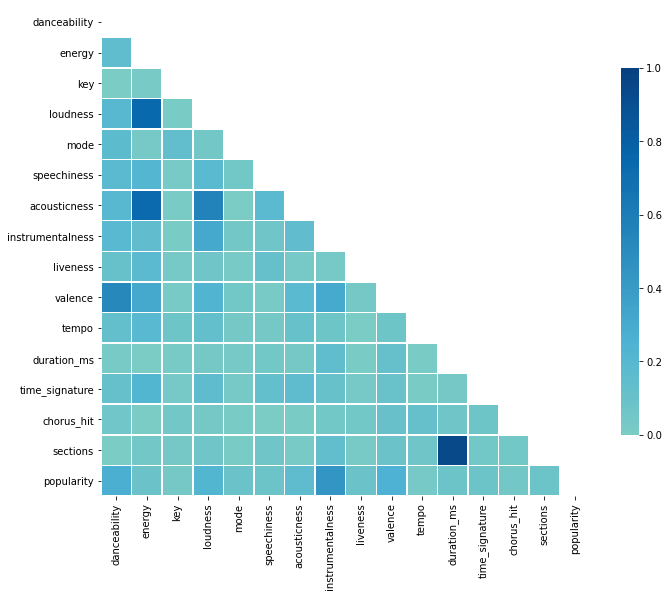

In [46]:
# Correlation matrix for sample data
corr = USABLE.corr().abs()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio 
# GnBu is your color preference 
sns.heatmap(corr, mask=mask, cmap="GnBu", vmin=0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

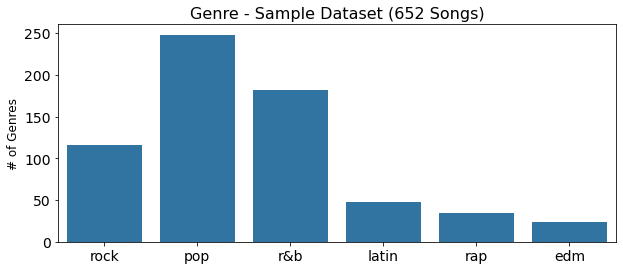

<Figure size 432x288 with 0 Axes>

In [47]:
# Genre countplot for sample data

fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='genre',data=USABLE, color='tab:blue');
ax.grid(False)

plt.xlabel(None)
plt.ylabel("# of Genres", fontsize=12)
plt.title("Genre - Sample Dataset (652 Songs)",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()

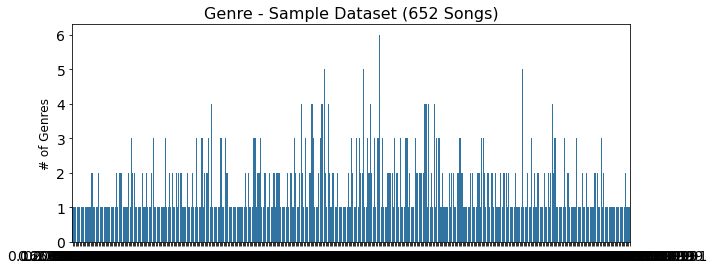

<Figure size 432x288 with 0 Axes>

In [48]:
# Danceability countplot for sample data - need to improve 

fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='danceability',data=USABLE, color='tab:blue');
ax.grid(False)

plt.xlabel(None)
plt.ylabel("# of Genres", fontsize=12)
plt.title("Genre - Sample Dataset (652 Songs)",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()

## Create y (Target: "danceability") and X

In [49]:
# Create y (Target: "danceability")
# Create X

y = USABLE['danceability']
X = USABLE.drop(columns=['danceability'])

In [50]:
# View X data

X

track              artist  \
2             Let It Happen            Vangelis   
3      Keeps Gettin' Better  Christina Aguilera   
4                    Aubrey               Bread   
5               Most Of All         B.J. Thomas   
6            High Speed GTO       White Wizzard   
..                      ...                 ...   
975                   Candy         Mandy Moore   
993  Arthur Comes to Sophie  Hildur Guðnadóttir   
995            Guantanamera          Joe Dassin   
996               Let Me In          Young Buck   
997                Superfly     Curtis Mayfield   

                                      uri  energy  key  loudness  mode  \
2    spotify:track:59HzNVTc331SYrI6vQEJJQ  0.4920    2   -13.886     0   
3    spotify:track:0j0n5CUS1g3QSwDWg8r5qq  0.6970    5    -4.733     0   
4    spotify:track:3his1UkcI0rwrniPDR9kTj  0.0902    7   -20.588     1   
5    spotify:track:4GPF6wnqZSBtEBUuSxHivV  0.3920    9    -8.960     1   
6    spotify:track:4AZRFiO74C2HwRVePGrmR2  0.9410    6    -4.264     0   
..                                    ...     ...  ...       ...   ...   
975  spotify:track:2YhE6xeWN0R9RVwEOG9lR1  0.8360    7    -4.230     1   
993  spotify:track:0dvAO2KbsqDZGv8g03JFRy  0.3300    0   -15.555     1   
995  spotify:track:2zo7m7HTcjMuioTTrIt4yF  0.4410    2    -9.909     1   
996  spotify:track:6qkZ6D3ogNyW2YDWsz7e3z  0.8900    1    -4.302     0   
997  spotify:track:4XsH9zBWPOCdXoH9ZDdS8r  0.7080    2    -9.141     1   

     speechiness  acousticness  instrumentalness  ...  duration_ms  \
2         0.0465       0.69900          0.012000  ...       260400   
3         0.0285       0.07390          0.000842  ...       181947   
4         0.0344       0.64700          0.000910  ...       219493   
5         0.0261       0.51700          0.000068  ...       174707   
6         0.0960       0.00041          0.000352  ...       237187   
..           ...           ...               ...  ...          ...   
975       0.0881       0.17800          0.000066  ...       234133   
993       0.0331       0.49100          0.812000  ...        99013   
995       0.0341       0.73100          0.000000  ...       171133   
996       0.3200       0.11700          0.000000  ...       224253   
997       0.1100       0.45700          0.000075  ...       233600   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
2                 4    69.23568         9           0     70s   rock   
3                 4    22.84639        10           1     00s    pop   
4                 4    37.19366        11           1     70s   rock   
5                 4    40.43748        11           1     70s    r&b   
6                 4    65.55364         8           0     00s   rock   
..              ...         ...       ...         ...     ...    ...   
975               4    23.94330         7           1     90s    pop   
993               1    21.84676         5           0     10s   rock   
995               4    23.10782        10           0     60s   rock   
996               4    42.08394        10           1     00s    r&b   
997               4    62.51701        11           1     70s    pop   

                                                   url  \
2    https://open.spotify.com/track/59HzNVTc331SYrI...   
3    https://open.spotify.com/track/0j0n5CUS1g3QSwD...   
4    https://open.spotify.com/track/3his1UkcI0rwrni...   
5    https://open.spotify.com/track/4GPF6wnqZSBtEBU...   
6    https://open.spotify.com/track/4AZRFiO74C2HwRV...   
..                                                 ...   
975  https://open.spotify.com/track/2YhE6xeWN0R9RVw...   
993  https://open.spotify.com/track/0dvAO2KbsqDZGv8...   
995  https://open.spotify.com/track/2zo7m7HTcjMuioT...   
996  https://open.spotify.com/track/6qkZ6D3ogNyW2YD...   
997  https://open.spotify.com/track/4XsH9zBWPOCdXoH...   

                                           checklist  \
2                       Vangelis - Let It Happen.mp3   
3    

In [51]:
# Gutcheck - song matches 

USABLE[USABLE.track.str.contains('Wherever You Will Go')]

track       artist                                   uri  \
517  Wherever You Will Go  The Calling  spotify:track:5QpaGzWp0hwB5faV8dkbAz   

     danceability  energy  key  loudness  mode  speechiness  acousticness  \
517         0.558   0.719    2    -5.113     1       0.0267        0.0367   

     ...  duration_ms  time_signature  chorus_hit  sections  popularity  \
517  ...       208600               4    42.26572         7           1   

     decade  genre                                                url  \
517     00s    pop  https://open.spotify.com/track/5QpaGzWp0hwB5fa...   

                                  checklist  \
517  The Calling - Wherever You Will Go.mp3   

                                    songpng  
517  The Calling - Wherever You Will Go.png  

[1 rows x 24 columns]

In [52]:
# View y data

y

2      0.349
3      0.645
4      0.326
5      0.501
6      0.252
       ...  
975    0.813
993    0.198
995    0.716
996    0.685
997    0.784
Name: danceability, Length: 653, dtype: float64

## Train Test Split 

In [53]:
# Create Train and Test data subsets using train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=100)

In [54]:
# Check shape of each data set 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((489, 23), (164, 23), (489,), (164,))

In [55]:
# Check the shape of the data is the same

X_train.shape[0]+X_test.shape[0]==USABLE.shape[0]

True

In [56]:
# View X_train

X_train

track                  artist  \
684                      Más Allá            Javier Solís   
619       Footprints - Remastered           Wayne Shorter   
904                  Rock Of Ages             Jack Jezzro   
855       Do You Believe In Magic           Shaun Cassidy   
318               People Like You            Eddie Fisher   
..                            ...                     ...   
854                     Dangerous                 Roxette   
72          Barefoot In Baltimore  Strawberry Alarm Clock   
517          Wherever You Will Go             The Calling   
109  Milagre Brasileiro - Ao Vivo                    MPB4   
771        Say You Really Want Me               Kim Wilde   

                                      uri  energy  key  loudness  mode  \
684  spotify:track:2eZT2Jw3gjv8ZqBUu9oCTE   0.325    0   -11.149     1   
619  spotify:track:2JITVZu8o6ls9k8SoMRy7w   0.454    7   -11.190     0   
904  spotify:track:2U9L4wYRxRgYy42uhvOloy   0.280    7   -14.582     1   
855  spotify:track:5LJ93CrqstdBdVmC0xhZbu   0.726    0   -10.154     1   
318  spotify:track:6cahHUfSQDIB8i0Yx3srwx   0.339    0    -8.351     1   
..                                    ...     ...  ...       ...   ...   
854  spotify:track:756YOXmKh2iUnx33nAdfPf   0.898    4    -4.893     1   
72   spotify:track:7gxeDaqGLT33dkWSTAEOue   0.566    7   -11.186     1   
517  spotify:track:5QpaGzWp0hwB5faV8dkbAz   0.719    2    -5.113     1   
109  spotify:track:7gluxKYkMdLREvbCrXdGQh   0.675    2    -8.183     1   
771  spotify:track:1lemomv6vJ9UcHxMRDlNMJ   0.642   10   -13.852     0   

     speechiness  acousticness  instrumentalness  ...  duration_ms  \
684       0.0307        0.8350          0.000032  ...       171067   
619       0.0280        0.7680          0.116000  ...       449773   
904       0.0303        0.7520          0.931000  ...       163467   
855       0.0336        0.0249          0.000000  ...       138760   
318       0.0375        0.9240          0.000000  ...       132773   
..           ...           ...               ...  ...          ...   
854       0.0336        0.0485          0.000008  ...       228867   
72        0.0353        0.4570          0.000003  ...       142293   
517       0.0267        0.0367          0.000000  ...       208600   
109       0.0614        0.9920          0.154000  ...       100133   
771       0.0416        0.1400          0.010800  ...       225534   

     time_signature  chorus_hit  sections  popularity  decade  genre  \
684               4    29.16395        10           0     60s    pop   
619               3    21.71069        23           0     00s    r&b   
904               4    43.80643         9           0     90s   rock   
855               4    21.66663         9           1     70s    pop   
318               4    30.38370         8           1     60s    pop   
..              ...         ...       ...         ...     ...    ...   
854               4    27.70789        11           1     90s    rap   
72                4    17.45443         9           1     60s    pop   
517               4    42.26572         7           1     00s    pop   
109               4    35.84205         4           0     70s    pop   
771               4    24.29936        10           1     80s    pop   

                                                   url  \
684  https://open.spotify.com/track/2eZT2Jw3gjv8ZqB...   
619  https://open.spotify.com/track/2JITVZu8o6ls9k8...   
904  https://open.spotify.com/track/2U9L4wYRxRgYy42...   
855  https://open.spotify.com/track/5LJ93CrqstdBdVm...   
318  https://open.spotify.com/track/6cahHUfSQDIB8i0...   
..                                                 ...   
854  https://open.spotify.com/track/756YOXmKh2iUnx3...   
72   https://open.spotify.com/track/7gxeDaqGLT33dkW...   
517  https://open.spotify.com/track/5QpaGzWp0hwB5fa...   
109  https://open.spotify.com/track/7gluxKYkMdLREvb...   
771  https://open.spotify.com/track/1lemomv6vJ9UcHx...   

   

In [57]:
# View y_train

y_train

684    0.399
619    0.530
904    0.275
855    0.499
318    0.490
       ...  
854    0.712
72     0.682
517    0.558
109    0.368
771    0.699
Name: danceability, Length: 489, dtype: float64

## Create Images for Songs to be Modeled

In [58]:
# Check directory of songs 

os.listdir('Song_Data')

['Kansas - Power.mp3',
 'Commodores - Wonderland.mp3',
 'Glen Campbell - Try A Little Kindness.mp3',
 'The Supremes - Where Did Our Love Go.mp3',
 'Adam Wade - Take Good Care Of Her.mp3',
 'Frédéric Chopin, Arthur Rubinstein - Nocturnes, Op. 15 -  No. 2 in F-Sharp Major.mp3',
 'The Damned - Liar.mp3',
 'Johnny Sea - Day for Decision.mp3',
 'Vladimir Cosma, Michel Roques, Guy Pedersen - Je suis timide... Mais je me soigne - Final.mp3',
 'Donna Summer - Dim All The Lights.mp3',
 'Ton Steine Scherben - Land in Sicht.mp3',
 'Eddie Money - Take Me Home Tonight.mp3',
 'Michael Harrison - In Flight.mp3',
 "Sunn 0))) - Between Sleipnir's Breaths.mp3",
 'Lenny Kravitz - Again.mp3',
 'kalapana - Alisa Lovely - Remastered.mp3',
 'Santana, Michelle Branch - The Game of Love (feat. Michelle Branch) - Main  Radio Mix.mp3',
 "Percy Sledge - I'll Be Your Everything.mp3",
 'Fela Kuti - Lady.mp3',
 'Huey Lewis & The News - The Heart Of Rock And Roll.mp3',
 "Étienne Daho - Pari à l'hôtel - 2006 Remaster.

In [59]:
# Check number of songs in directory 

len(os.listdir('Song_Data'))

953

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


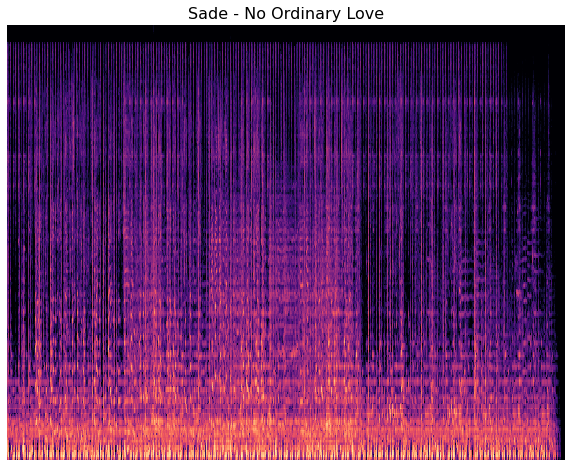

In [60]:
# TRY TO GET IMAGE FOR ONE SONG (I.E. TEST WITHOUT FOR LOOP)
# EXAMPLE: Sade - No Ordinary Love 

SONG_DATA = os.listdir('Song_Data') 

# Instantiate constants (taken from source:)
SAMPLE_RATE = 48000
HOP_LENGTH = 256
N_FFT = 2048
N_MELS = 256
REF = np.max

fpath = 'Song_Data/Sade - No Ordinary Love.mp3'
    
# Load song into memory
signal, sr = librosa.load(fpath, sr=SAMPLE_RATE)
    
# Create "mel-spectrogram"
mel_signal = librosa.feature.melspectrogram(
    y=signal, # Created above
    sr=SAMPLE_RATE, # Stuff we decided at the top:
    hop_length=HOP_LENGTH, 
    n_fft=N_FFT, 
    n_mels=N_MELS)

power_to_db = librosa.power_to_db(mel_signal, ref=REF)

# Create figure
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# Hide axes and image frame
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

# Display spectrogram for song 
librosa.display.specshow(power_to_db, sr=SAMPLE_RATE, cmap='magma', hop_length=HOP_LENGTH)
    
plt.title("Sade - No Ordinary Love",fontsize=16)
plt.show()

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


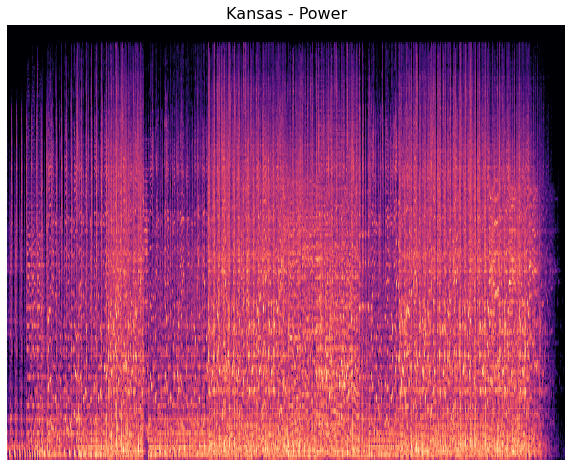

In [61]:
# Check another song 
# EXAMPLE: Kansas - Power 

SONG_DATA = os.listdir('Song_Data')

# Instantiate constants (taken from source:)
SAMPLE_RATE = 48000
HOP_LENGTH = 256
N_FFT = 2048
N_MELS = 256
REF = np.max

fpath = 'Song_Data/Kansas - Power.mp3'
    
# Load song into memory
signal, sr = librosa.load(fpath, sr=SAMPLE_RATE)
    
# Create "mel-spectrogram"
mel_signal = librosa.feature.melspectrogram(
    y=signal, # Created above
    sr=SAMPLE_RATE, # Stuff we decided at the top:
    hop_length=HOP_LENGTH, 
    n_fft=N_FFT, 
    n_mels=N_MELS)

power_to_db = librosa.power_to_db(mel_signal, ref=REF)

# Create figure
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

# Hide axes and image frame
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

# Display spectrogram for song 
librosa.display.specshow(power_to_db, sr=SAMPLE_RATE, cmap='magma', hop_length=HOP_LENGTH)

plt.title("Kansas - Power",fontsize=16)
plt.show()

## CREATE AND SAVE SPECTROGRAMS FOR TRAIN AND TEST SONGS!! 

### Code to Create Spectrograms & Put in Train and Test Image Folders - only needs to be run once in initial build 
Code for reference 

In [62]:
# SONG_DATA = X['checklist'].values 

# # Instantiate constants (taken from source:)
# SAMPLE_RATE = 48000
# HOP_LENGTH = 256
# N_FFT = 2048
# N_MELS = 256
# REF = np.max


# # Iterate through .mp3 files
# for mp3 in SONG_DATA:
#     #
#     if not mp3.endswith('.mp3'):
#         continue
    
#     # Create path to mp3.
#     fpath = os.path.join(path, mp3)
#     #fpath = 'Song_Data'
    
#     # Load song into memory
#     signal, sr = librosa.load(fpath, sr=SAMPLE_RATE)
    
#     # Create "mel-spectrogram"
#     mel_signal = librosa.feature.melspectrogram(
#         y=signal, # Created above
#         sr=SAMPLE_RATE, # Stuff we decided at the top:
#         hop_length=HOP_LENGTH, 
#         n_fft=N_FFT, 
#         n_mels=N_MELS
#     )
#     power_to_db = librosa.power_to_db(mel_signal, ref=REF) # Part of the spectrogram.
    
#     # Creating figure
#     fig = plt.figure(figsize=(10,8))
#     ax = fig.add_subplot(111)
#         # Hiding axes and image frame
#     ax.axes.get_xaxis().set_visible(False)
#     ax.axes.get_yaxis().set_visible(False)
#     ax.set_frame_on(False)

#         # Displaying our spectrograms
#     librosa.display.specshow(power_to_db, sr=SAMPLE_RATE, cmap='magma', hop_length=HOP_LENGTH)

#       # SAVE THE IMAGES IN RESPECTIVE FOLDERS
#     if mp3 in X_train['checklist'].values:
#         folder = 'Train'
#     else:
#         # Save in Images/Test/...
#         folder = 'Test'
        
#     plt.savefig(
#         fname=f'Images/{folder}/{mp3.split(".mp3")[0]}.png', 
#         dpi=400, 
#         bbox_inches='tight',
#         pad_inches=0
#     )
    
#     # Cleanup
#     plt.close()    
#     fig.clf()
#     plt.close(fig)
#     plt.close('all')
#     print(mp3)

### Resulting Train and Test Image Folders 

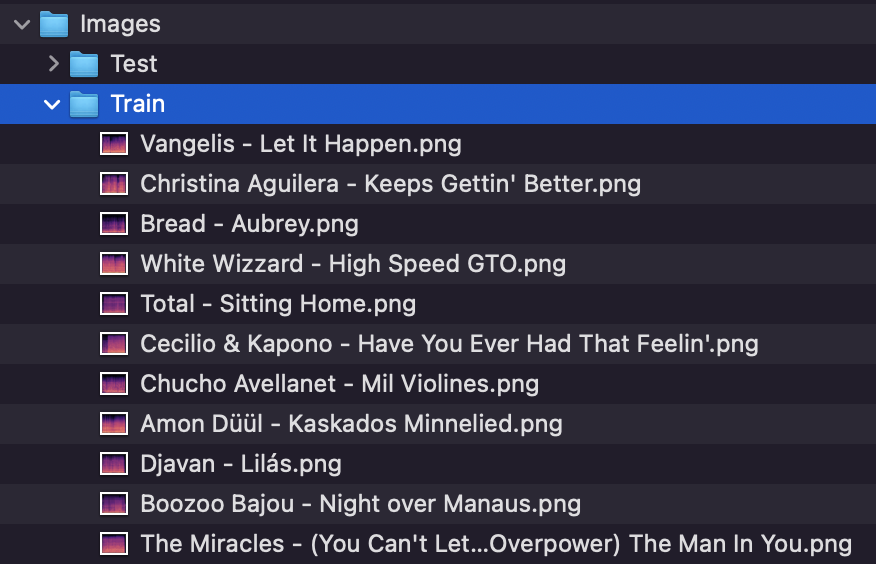

## Create Train and Test Datasets for Model 

In [63]:
# Create Train dataset 
# Concatenate X_train, y_train 

Train = pd.concat([X_train, y_train], axis=1)
Train

track                  artist  \
684                      Más Allá            Javier Solís   
619       Footprints - Remastered           Wayne Shorter   
904                  Rock Of Ages             Jack Jezzro   
855       Do You Believe In Magic           Shaun Cassidy   
318               People Like You            Eddie Fisher   
..                            ...                     ...   
854                     Dangerous                 Roxette   
72          Barefoot In Baltimore  Strawberry Alarm Clock   
517          Wherever You Will Go             The Calling   
109  Milagre Brasileiro - Ao Vivo                    MPB4   
771        Say You Really Want Me               Kim Wilde   

                                      uri  energy  key  loudness  mode  \
684  spotify:track:2eZT2Jw3gjv8ZqBUu9oCTE   0.325    0   -11.149     1   
619  spotify:track:2JITVZu8o6ls9k8SoMRy7w   0.454    7   -11.190     0   
904  spotify:track:2U9L4wYRxRgYy42uhvOloy   0.280    7   -14.582     1   
855  spotify:track:5LJ93CrqstdBdVmC0xhZbu   0.726    0   -10.154     1   
318  spotify:track:6cahHUfSQDIB8i0Yx3srwx   0.339    0    -8.351     1   
..                                    ...     ...  ...       ...   ...   
854  spotify:track:756YOXmKh2iUnx33nAdfPf   0.898    4    -4.893     1   
72   spotify:track:7gxeDaqGLT33dkWSTAEOue   0.566    7   -11.186     1   
517  spotify:track:5QpaGzWp0hwB5faV8dkbAz   0.719    2    -5.113     1   
109  spotify:track:7gluxKYkMdLREvbCrXdGQh   0.675    2    -8.183     1   
771  spotify:track:1lemomv6vJ9UcHxMRDlNMJ   0.642   10   -13.852     0   

     speechiness  acousticness  instrumentalness  ...  time_signature  \
684       0.0307        0.8350          0.000032  ...               4   
619       0.0280        0.7680          0.116000  ...               3   
904       0.0303        0.7520          0.931000  ...               4   
855       0.0336        0.0249          0.000000  ...               4   
318       0.0375        0.9240          0.000000  ...               4   
..           ...           ...               ...  ...             ...   
854       0.0336        0.0485          0.000008  ...               4   
72        0.0353        0.4570          0.000003  ...               4   
517       0.0267        0.0367          0.000000  ...               4   
109       0.0614        0.9920          0.154000  ...               4   
771       0.0416        0.1400          0.010800  ...               4   

     chorus_hit  sections  popularity  decade  genre  \
684    29.16395        10           0     60s    pop   
619    21.71069        23           0     00s    r&b   
904    43.80643         9           0     90s   rock   
855    21.66663         9           1     70s    pop   
318    30.38370         8           1     60s    pop   
..          ...       ...         ...     ...    ...   
854    27.70789        11           1     90s    rap   
72     17.45443         9           1     60s    pop   
517    42.26572         7           1     00s    pop   
109    35.84205         4           0     70s    pop   
771    24.29936        10           1     80s    pop   

                                                   url  \
684  https://open.spotify.com/track/2eZT2Jw3gjv8ZqB...   
619  https://open.spotify.com/track/2JITVZu8o6ls9k8...   
904  https://open.spotify.com/track/2U9L4wYRxRgYy42...   
855  https://open.spotify.com/track/5LJ93CrqstdBdVm...   
318  https://open.spotify.com/track/6cahHUfSQDIB8i0...   
..                                                 ...   
854  https://open.spotify.com/track/756YOXmKh2iUnx3...   
72   https://open.spotify.com/track/7gxeDaqGLT33dkW...   
517  https://open.spotify.com/track/5QpaGzWp0hwB5fa...   
109  https://open.spotify.com/track/7gluxKYkMdLREvb...   
771  https://open.spotify.com/track/1lemomv6vJ9UcHx...   

                                             checklist  \
684                        Javier Solís - Más Allá.mp3   
619        Wayne Shorter - Footprints - Rem

In [64]:
# Create Test dataset 
# Concatenate X_test, y_test

Test = pd.concat([X_test, y_test], axis=1)
Test.shape

(164, 24)

In [65]:
# Create Train subset with 'songpng' and 'danceability'

traindf = Train[['songpng','danceability']]
traindf

songpng  danceability
684                        Javier Solís - Más Allá.png         0.399
619        Wayne Shorter - Footprints - Remastered.png         0.530
904                     Jack Jezzro - Rock Of Ages.png         0.275
855        Shaun Cassidy - Do You Believe In Magic.png         0.499
318                 Eddie Fisher - People Like You.png         0.490
..                                                 ...           ...
854                            Roxette - Dangerous.png         0.712
72   Strawberry Alarm Clock - Barefoot In Baltimore...         0.682
517             The Calling - Wherever You Will Go.png         0.558
109            MPB4 - Milagre Brasileiro - Ao Vivo.png         0.368
771             Kim Wilde - Say You Really Want Me.png         0.699

[489 rows x 2 columns]

In [66]:
# Create Test subset with 'songpng' and 'danceability'

testdf = Test[['songpng','danceability']]
testdf

songpng  danceability
836  Sonny Boy Nelson - Blues Jumped a Rabbit.png         0.656
462     Lionel Richie - Love Will Conquer All.png         0.790
169                  Sleeping At Last - Eight.png         0.341
578                  Atlantic Starr - Circles.png         0.779
67                             Kansas - Power.png         0.477
..                                            ...           ...
181                        The Kooks - Ooh La.png         0.544
584     Ravi Shankar - Raga Bhimpalasi - Live.png         0.360
411               Pavilhão 9 - Calibre Rhossi.png         0.704
491     Britney Spears - (You Drive Me) Crazy.png         0.748
550      New Grass Revival - Souvenir Bottles.png         0.569

[164 rows x 2 columns]

## Keras flow_from_dataframe (ImageDataGenerator)

In [67]:
# Create train_datagen
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

# Create test_datagen
test_datagen = ImageDataGenerator(rescale=1./255)

# Set target_size (proportional to actual image size)
target_size = (380,245)

# Create train_generator
train_generator=train_datagen.flow_from_dataframe(
        dataframe=traindf,
        directory="Images/Train/",
        x_col="songpng",
        y_col="danceability",
        batch_size=38,
        seed=11,
        shuffle=True,
        class_mode='other',
        target_size=target_size)

# Create test_generator
test_generator=test_datagen.flow_from_dataframe(
        dataframe=testdf,
        directory="Images/Test/",
        x_col="songpng",
        y_col="danceability",
        batch_size=38,
        seed=11,
        shuffle=False,
        class_mode='other',
        target_size=target_size)

# Create validation_generator
validation_generator = train_datagen.flow_from_dataframe(
        dataframe=traindf,
        directory="Images/Train/",
        x_col="songpng",
        y_col="danceability",
        batch_size=38,
        seed=11,
        shuffle=True,
        class_mode='other',
        target_size=target_size,
        subset='validation')

Found 489 validated image filenames.
Found 163 validated image filenames.
Found 97 validated image filenames.


/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/keras_preprocessing/image/dataframe_iterator.py:283: UserWarning: Found 1 invalid image filename(s) in x_col="songpng". These filename(s) will be ignored.
  warnings.warn(


# BUILD MODELS

## Model 1: Layers 
* Input layer 
* Output layer 

In [68]:
# Start model construction 

model = Sequential()
model 

In [69]:
# Add input and output layers 

model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [70]:
# Compile model with optimizer and loss function being 'mean_squared_error'

model.compile(loss='mean_squared_error', optimizer='adam')

In [71]:
# Fit 

history = model.fit(
    train_generator, 
    validation_data=validation_generator, 
    batch_size = 38, epochs = 20, 
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True, verbose=1)]
)

Epoch 1/20
13/13 [==============================] - 60s 5s/step - loss: 8479.8770 - val_loss: 0.3208
Epoch 2/20
13/13 [==============================] - 56s 4s/step - loss: 0.3208 - val_loss: 0.3221
Epoch 3/20
13/13 [==============================] - 56s 4s/step - loss: 0.3568 - val_loss: 0.3225
Epoch 4/20
13/13 [==============================] - 56s 4s/step - loss: 0.3217 - val_loss: 0.3224
Epoch 5/20
13/13 [==============================] - 57s 4s/step - loss: 0.3216 - val_loss: 0.3223
Epoch 6/20
13/13 [==============================] - 56s 4s/step - loss: 0.3215 - val_loss: 0.3221
Epoch 7/20
13/13 [==============================] - 56s 4s/step - loss: 0.3212 - val_loss: 0.3219
Epoch 8/20
13/13 [==============================] - 55s 4s/step - loss: 0.3210 - val_loss: 0.3217
Epoch 9/20
13/13 [==============================] - 56s 4s/step - loss: 0.3208 - val_loss: 0.3214
Epoch 10/20
13/13 [==============================] - 55s 4s/step - loss: 0.3205 - val_loss: 0.3211
Epoch 11/20
13/1

In [72]:
# Show model summary 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 32)    896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 32)    0         
_________________________________________________________________
flatten (Flatten)            (None, None)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                23417888  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 23,418,817
Trainable params: 23,418,817
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Function to plot model performance 

def plot_history(history, style=['ggplot', 'seaborn-talk']):
    """
    Plot history from History object (or history dict) 
    once Tensorflow model is trained.
    
    Parameters:
    -----------
    history:
        History object returned from a model.fit()
    style: string or list of strings (default: ['ggplot', 'seaborn-talk'])
        Style from matplotlib.
    """
    
    # We can pass in a model history object or a dictionary.
    if not isinstance(history, dict): # We prefer this type of check over `if type() == ...`
        history = history.history

    metrics_lst = [m for m in history.keys() if not m.startswith('val')]
    N = len(metrics_lst)
    with plt.style.context(style):
        fig, ax_lst = plt.subplots(nrows=N, figsize=(8, 4*(N)))
        ax_lst = [ax_lst] if N == 1 else ax_lst.flatten() # Flatten ax_lst.
        for metric, ax in zip(metrics_lst, ax_lst):
            val_m = f'val_{metric}'
            ax.plot(history[metric], label=metric)
            ax.plot(history[val_m], label=val_m)
            ax.set(title=metric.title(), xlabel='Epoch', ylabel=metric.title())
            ax.legend()
        fig.tight_layout()
        plt.show()

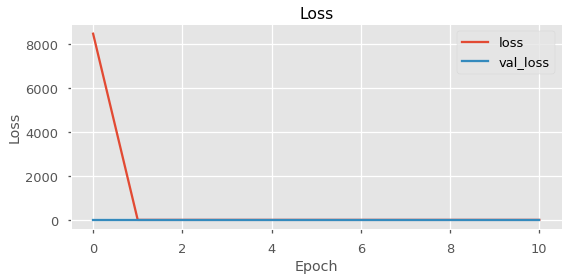

In [74]:
# Plot model perfromance 

plot_history(history)

In [75]:
history.history

{'loss': [8479.876953125,
  0.32078316807746887,
  0.356821745634079,
  0.32170435786247253,
  0.32161688804626465,
  0.32145243883132935,
  0.32124951481819153,
  0.321025550365448,
  0.32078132033348083,
  0.3205227553844452,
  0.320250540971756],
 'val_loss': [0.3207779824733734,
  0.32213592529296875,
  0.32246091961860657,
  0.3224393129348755,
  0.32229742407798767,
  0.32210609316825867,
  0.3218884766101837,
  0.32165205478668213,
  0.3214004635810852,
  0.3211328685283661,
  0.3208498954772949]}

In [76]:
# Predict

test_generator.reset()
predictions = model.predict(test_generator)
predictions

array([[-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0.00391621],
       [-0

In [77]:
predicted_class_indices=np.argmax(predictions,axis=1)

#### Result: Model 1 performed well with loss: 0.0181 - val_loss: 0.0176 being the best 

## Model 2: Stochastic Batching 

In [78]:
# Model 2: Stochastic Batching 

model = Sequential()
model 

In [79]:
# Same input and output layers as first model 

model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [80]:
# Compile model 

model.compile(loss='mean_squared_error', optimizer='adam')

In [81]:
# Fit
# Stochastic Batching - set batch_size = 1

history = model.fit(
    train_generator, 
    validation_data=validation_generator, 
    batch_size = 1, epochs = 20, 
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True, verbose=1)]
)

Epoch 1/20
13/13 [==============================] - 60s 5s/step - loss: 2406.0525 - val_loss: 0.3179
Epoch 2/20
13/13 [==============================] - 55s 4s/step - loss: 0.3173 - val_loss: 0.3180
Epoch 3/20
13/13 [==============================] - 56s 4s/step - loss: 0.3173 - val_loss: 0.3179
Epoch 4/20
13/13 [==============================] - 56s 4s/step - loss: 0.3170 - val_loss: 0.3176
Epoch 5/20
13/13 [==============================] - 55s 4s/step - loss: 0.3167 - val_loss: 0.3173
Epoch 6/20
13/13 [==============================] - 56s 4s/step - loss: 0.3164 - val_loss: 0.3169
Epoch 7/20
13/13 [==============================] - 56s 4s/step - loss: 0.3160 - val_loss: 0.3165
Epoch 8/20
13/13 [==============================] - 57s 4s/step - loss: 0.3156 - val_loss: 0.3161
Epoch 9/20
13/13 [==============================] - 57s 4s/step - loss: 0.3151 - val_loss: 0.3156
Epoch 10/20
13/13 [==============================] - 57s 4s/step - loss: 8.9025 - val_loss: 0.3140
Epoch 11/20
13/1

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, None, None, 32)    896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
flatten_1 (Flatten)          (None, None)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                23417888  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 23,418,817
Trainable params: 23,418,817
Non-trainable params: 0
_________________________________________________________________


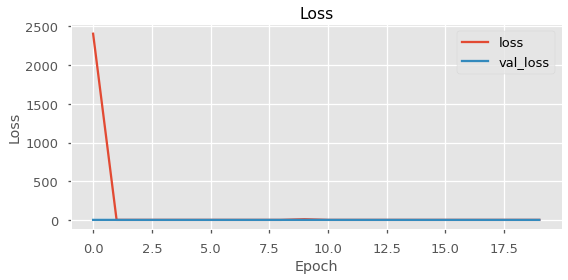

In [83]:
# Plot model performance 

plot_history(history)

#### Result: Model 2 performed well, but not as well as Model 1 - loss: 0.3129 - val_loss: 0.3134

## Model 3: Add Layers to Model 1 

In [84]:
# Model 3: Add layers to Model 1 

model = Sequential()
model

In [85]:
# Add layers 

model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [86]:
# Compile model 

model.compile(loss='mean_squared_error', optimizer='adam')

In [87]:
# Fit 

history = model.fit(
    train_generator, 
    validation_data=validation_generator, 
    batch_size = 38, epochs = 20, 
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True, verbose=1)]
)

Epoch 1/20
13/13 [==============================] - 64s 5s/step - loss: 165.8644 - val_loss: 1.9738
Epoch 2/20
13/13 [==============================] - 60s 5s/step - loss: 5.0880 - val_loss: 1.6918
Epoch 3/20
13/13 [==============================] - 60s 5s/step - loss: 0.7915 - val_loss: 0.2961
Epoch 4/20
13/13 [==============================] - 60s 5s/step - loss: 0.1792 - val_loss: 0.0650
Epoch 5/20
13/13 [==============================] - 62s 5s/step - loss: 0.0594 - val_loss: 0.0489
Epoch 6/20
13/13 [==============================] - 58s 4s/step - loss: 0.0364 - val_loss: 0.0223
Epoch 7/20
13/13 [==============================] - 59s 5s/step - loss: 0.0271 - val_loss: 0.0225
Epoch 8/20
13/13 [==============================] - 59s 5s/step - loss: 0.0263 - val_loss: 0.0208
Epoch 9/20
13/13 [==============================] - 61s 5s/step - loss: 0.0256 - val_loss: 0.0224
Epoch 10/20
13/13 [==============================] - 61s 5s/step - loss: 0.0263 - val_loss: 0.0281
Epoch 11/20
13/13

In [88]:
# Show model summary 

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, None, None, 32)    896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, None, None, 64)    0         
_________________________________________________________________
flatten_2 (Flatten)          (None, None)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                11237408  
_________________________________________________________________
dense_5 (Dense)              (None, 16)               

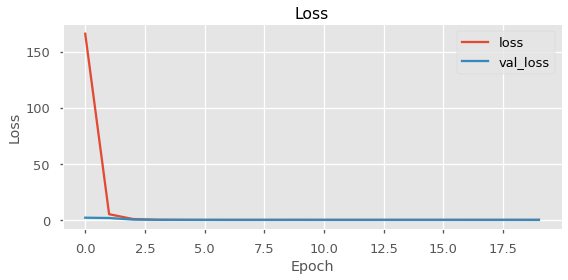

In [89]:
# Plot model performance 

plot_history(history)

In [90]:
predictions = model.predict(test_generator)
predictions

array([[0.780471  ],
       [0.83574075],
       [0.81482047],
       [0.81251115],
       [0.72267026],
       [0.5251443 ],
       [0.7009837 ],
       [0.48794907],
       [0.6424481 ],
       [0.55758065],
       [0.58746594],
       [0.61451787],
       [0.65550107],
       [0.6539199 ],
       [0.79521054],
       [0.6602294 ],
       [0.761563  ],
       [0.6221854 ],
       [0.80395   ],
       [0.62244004],
       [0.69405574],
       [0.58017415],
       [0.7155883 ],
       [0.70632714],
       [0.42758626],
       [0.7023608 ],
       [0.69284886],
       [0.81344   ],
       [0.6660697 ],
       [0.54509133],
       [0.62314004],
       [0.46179456],
       [0.74131984],
       [0.7047555 ],
       [0.7825548 ],
       [0.545778  ],
       [0.83171815],
       [0.61733407],
       [0.6838452 ],
       [0.5728256 ],
       [0.6398446 ],
       [0.78651494],
       [0.7269427 ],
       [0.7537667 ],
       [0.38122147],
       [0.73651   ],
       [0.6125733 ],
       [0.674

#### Result: Model 3 performed better than Model 2, but not as well as Model 1 - loss: 0.0287 - val_loss: 0.0259

# Evaluation and Conclusions

* All three Sequential Models performed well, and we feel most confident with Model 3
* With Model 3's RMSE (root mean squared error) = loss: 0.0214 - val_loss: 0.0183, our model shows it will be a strong predictor of "danceability" of songs 
* We will use the same approach in our Future Work with other metrics in the dataset 

# FUTURE WORK 

* Run models for all remaining metrics for Disco Duo 
* Remaining metrics: 
1. Energy 
2. Speechiness 
3. Acousticness 
4. Instrumentalness
5. Liveness
6. Valence
* Build platform to connect users listening to the same song and apply Disco Duo

## Appendix

## Appendix - Part I
AudioSegment from pydub

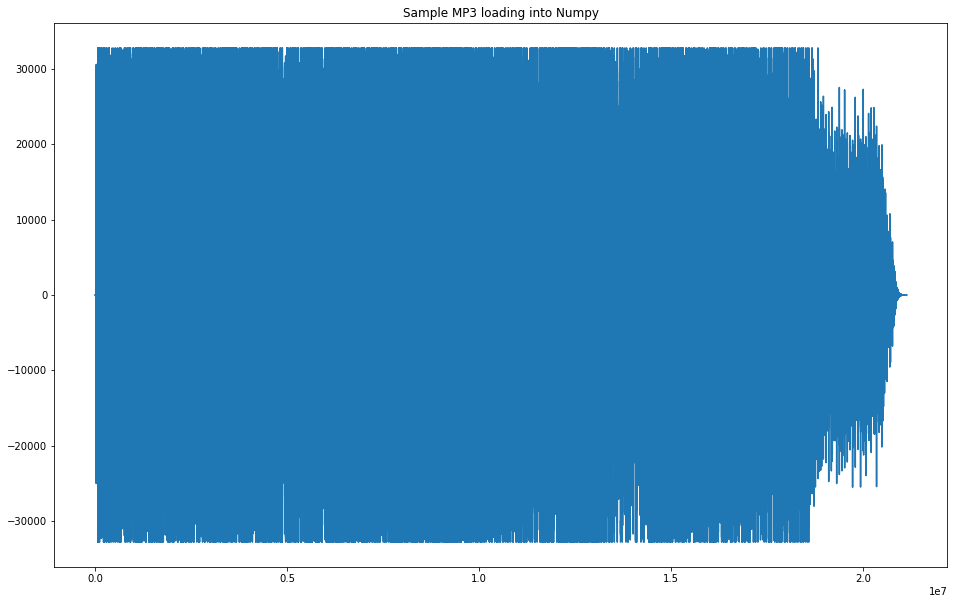

In [91]:
import pydub 
import numpy as np

def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")
    
audio_file = 'Song_Data/Sade - No Ordinary Love.mp3'
sr, x = read(audio_file)

import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.plot(x, color='tab:blue')
plt.title("Sample MP3 loading into Numpy")
plt.show()

In [92]:
sade_song = AudioSegment.from_mp3("Song_Data/Sade - No Ordinary Love.mp3")

sade_song[:100_000]

In [93]:
kansas_song = AudioSegment.from_mp3("Song_Data/Kansas - Power.mp3")

kansas_song[:100_000]

In [94]:
kiiara_song = AudioSegment.from_mp3("Song_Data/Kiiara - Gold.mp3")

kiiara_song[:100_000]

In [95]:
type(sade_song)

pydub.audio_segment.AudioSegment

In [96]:
np.array(sade_song.get_array_of_samples()).reshape((-1,2))

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

In [97]:
sr, x = read('Song_Data/Sade - No Ordinary Love.mp3')
x.shape

(21142400, 2)

In [98]:
x

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

## Appendix - Part II
Reference code 

In [99]:
# LIBROSA

# 1. Get the file path to an included audio example
# filename = librosa.example('nutcracker')
audio_file = 'Song_Data/Sade - No Ordinary Love.mp3'

# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
# signal, sr = librosa.load(filename)

signal, sr = librosa.load(audio_file)

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [100]:
#audio_file = 'Song_Data/Sade - No Ordinary Love.mp3'
#sr, x = read(audio_file)

In [101]:
#signal, sr = librosa.load(fpath, sr=SAMPLE_RATE)

In [102]:
# # Defining our target folder and constant variables

# # Please define a filepath you want to save the virufy mel-spectrogram images to
# # in the variable 'melspectro_base'
# melspectro_base = ensure_filepath('/viru_melspectro_images/')


# SAMPLE_RATE = 48000
# HOP_LENGTH = 256
# N_FFT = 2048
# N_MELS = 256
# REF = np.max

# mel_signal = librosa.feature.melspectrogram(y=signal, sr=SAMPLE_RATE, 
#                                                 hop_length=HOP_LENGTH, 
#                                                 n_fft=N_FFT, n_mels=N_MELS)
# power_to_db = librosa.power_to_db(mel_signal, ref=REF)
#     # Creating figure
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111)
#     # Hiding axes and image frame
# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
# ax.set_frame_on(False)

#     # Displaying our spectrograms
# librosa.display.specshow(power_to_db, sr=SAMPLE_RATE, cmap='magma', hop_length=HOP_LENGTH)
    
#     # Saving each spectrogram into its respective folder
#     # subfile[:-4] is a string of the subfile without the ending extension '.mp3'
#     # We add the '.png' extension to the end of our new spectrogram images instead
# plt.savefig(fname=new_folder + subfile[:-4] + '.png', dpi=400, 
#                 bbox_inches='tight',pad_inches=0)
    
#     # We then manually close pyplot, clear the figure, close the fig variable, 
#     # and then close the figure window
# plt.close()    
# fig.clf()
# plt.close(fig)
# plt.close('all')

In [103]:
# history = model.fit(
#     train_generator, 
#     validation_data=validation_generator, 
#     batch_size = 38, epochs = 100, 
#     callbacks=[EarlyStopping(patience=10, restore_best_weights=True, verbose=1)]
# )

In [104]:
# model.fit(train_generator, batch_size = 38, epochs = 10, validation_split=0.2)

In [105]:
# x - full batch 
# stochastic 
# add regularizers 
# add dropouts 
# reduce dropouts if necessary 

# gitignore for songs 